# Improving Employee Retention by Predicting Employee Attrition Using Machine Learning

# Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Employee Attrition Dataset.csv', sep=";")
df.head()

Username  EnterpriseID StatusPernikahan JenisKelamin  \
0  spiritedPorpoise3        111065    Belum_menikah         Pria   
1    jealousGelding2        106080    Belum_menikah         Pria   
2      pluckyMuesli3        106452          Menikah         Pria   
3   stressedTruffle1        106325    Belum_menikah         Pria   
4        shyTermite7        111171    Belum_menikah       Wanita   

  StatusKepegawaian                      Pekerjaan           JenjangKarir  \
0         Outsource   Software Engineer (Back End)  Freshgraduate_program   
1          FullTime                   Data Analyst  Freshgraduate_program   
2          FullTime  Software Engineer (Front End)  Freshgraduate_program   
3         Outsource  Software Engineer (Front End)  Freshgraduate_program   
4          FullTime                Product Manager  Freshgraduate_program   

  PerformancePegawai     AsalDaerah     HiringPlatform  ...         NomorHP  \
0       Sangat_bagus  Jakarta Timur  Employee_Referral  ...  +6282232522xxx   
1      Sangat_kurang  Jakarta Utara            Website  ...  +6281270745xxx   
2              Bagus  Jakarta Timur             Indeed  ...  +6281346215xxx   
3              Bagus  Jakarta Pusat           LinkedIn  ...  +6283233846xxx   
4              Bagus  Jakarta Timur           LinkedIn  ...  +6287883263xxx   

                             Email  TingkatPendidikan  PernahBekerja  \
0   spiritedPorpoise3135@yahoo.com           Magister              1   
1     jealousGelding2239@yahoo.com            Sarjana              1   
2      pluckyMuesli3961@icloud.com           Magister              1   
3  stressedTruffle1406@hotmail.com            Sarjana              1   
4         shyTermite7149@gmail.com            Sarjana              1   

   IkutProgramLOP   AlasanResign TanggalLahir TanggalHiring  \
0             1.0  masih_bekerja   1972-07-01    2011-01-10   
1             1.0  toxic_culture   1984-04-26    2014-01-06   
2             1.0      jam_kerja   1974-01-07    2011-01-10   
3             0.0  masih_bekerja   1979-11-24     2014-2-17   
4             0.0    ganti_karir   1974-11-07    2013-11-11   

  TanggalPenilaianKaryawan  TanggalResign  
0                2016-2-15              -  
1                2020-1-17      2018-6-16  
2               2016-01-10      2014-9-24  
3               2020-02-04              -  
4                2020-1-22     2018-09-06  

[5 rows x 25 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

# Data Preprocessing

## Check duplicate value

In [4]:
df.duplicated(subset=['EnterpriseID']).sum()

0

In [5]:
df.duplicated(subset=['Username']).sum()

2

In [6]:
df[df.duplicated(subset=['Username'], keep=False)]

Username  EnterpriseID StatusPernikahan JenisKelamin  \
80   brainyMagpie7        106620    Belum_menikah         Pria   
120  brainyMagpie7        101264         Bercerai         Pria   
158     boredEggs0        100326         Bercerai       Wanita   
204     boredEggs0        106285          Lainnya       Wanita   

    StatusKepegawaian                      Pekerjaan           JenjangKarir  \
80           FullTime   Software Engineer (Back End)           Senior_level   
120          FullTime       Product Design (UI & UX)  Freshgraduate_program   
158          FullTime                Product Manager  Freshgraduate_program   
204          FullTime  Software Engineer (Front End)  Freshgraduate_program   

    PerformancePegawai     AsalDaerah      HiringPlatform  ...  \
80               Biasa  Jakarta Pusat              Indeed  ...   
120             Kurang  Jakarta Barat              Indeed  ...   
158              Bagus  Jakarta Timur  Diversity_Job_Fair  ...   
204              Bagus  Jakarta Timur  Diversity_Job_Fair  ...   

            NomorHP                        Email  TingkatPendidikan  \
80   +6281267984xxx   brainyMagpie7048@gmail.com             Doktor   
120  +6285946196xxx  brainyMagpie7608@proton.com           Magister   
158  +6283854646xxx    boredEggs0834@outlook.com            Sarjana   
204  +6285733263xxx    boredEggs0225@outlook.com            Sarjana   

     PernahBekerja  IkutProgramLOP       AlasanResign TanggalLahir  \
80               1             NaN  internal_conflict   1986-09-01   
120              1             NaN      masih_bekerja   1970-04-25   
158              1             NaN        ganti_karir   1974-01-12   
204              1             NaN          jam_kerja   1967-06-03   

    TanggalHiring TanggalPenilaianKaryawan  TanggalResign  
80      2014-9-29                2020-1-18     2019-06-06  
120    2017-02-10                2020-2-25              -  
158    2011-01-10                2017-1-30      2016-3-31  
204    2013-04-01                2020-2-13      2014-8-19  

[4 rows x 25 columns]

## Handle missing value

In [7]:
df.isnull().sum().sort_values(ascending=False)/len(df)

IkutProgramLOP                        0.898955
AlasanResign                          0.229965
JumlahKetidakhadiran                  0.020906
SkorKepuasanPegawai                   0.017422
JumlahKeikutsertaanProjek             0.010453
JumlahKeterlambatanSebulanTerakhir    0.003484
TanggalPenilaianKaryawan              0.000000
TanggalHiring                         0.000000
TanggalLahir                          0.000000
PernahBekerja                         0.000000
TingkatPendidikan                     0.000000
Email                                 0.000000
NomorHP                               0.000000
Username                              0.000000
EnterpriseID                          0.000000
SkorSurveyEngagement                  0.000000
HiringPlatform                        0.000000
AsalDaerah                            0.000000
PerformancePegawai                    0.000000
JenjangKarir                          0.000000
Pekerjaan                             0.000000
StatusKepegaw

In [8]:
df_missing_values = df[df['AlasanResign'].isnull()]

pd.set_option('display.max_rows', None)

#print(df_missing_values)
df_missing_values

pd.reset_option('display.max_rows')

In [9]:
# based on output above, it can be seen that missing value in AlasanResign because the employee has not resigned so it is filled with "masih_bekerja"
df['AlasanResign'] = df['AlasanResign'].fillna('masih_bekerja')

df['JumlahKetidakhadiran'] = df['JumlahKetidakhadiran'].fillna(0)
df['JumlahKeikutsertaanProjek'] = df['JumlahKeikutsertaanProjek'].fillna(0)
df['JumlahKeterlambatanSebulanTerakhir'] = df['JumlahKeterlambatanSebulanTerakhir'].fillna(0)

df = df.dropna(subset=['SkorKepuasanPegawai'])

## Check value in categorical column

In [10]:
print(df['Username'].nunique())
print(df['EnterpriseID'].nunique())

280
282


In [11]:
cat = ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian','Pekerjaan','JenjangKarir','PerformancePegawai','AsalDaerah','HiringPlatform',
       'TingkatPendidikan','PernahBekerja','AlasanResign']
for col in cat:
    print(f'value counts of column {col}')
    print(df[col].value_counts())
    print('---'*10, '\n')

value counts of column StatusPernikahan
Belum_menikah    130
Menikah           56
Lainnya           48
Bercerai          45
-                  3
Name: StatusPernikahan, dtype: int64
------------------------------ 

value counts of column JenisKelamin
Wanita    165
Pria      117
Name: JenisKelamin, dtype: int64
------------------------------ 

value counts of column StatusKepegawaian
FullTime      213
Outsource      65
Internship      4
Name: StatusKepegawaian, dtype: int64
------------------------------ 

value counts of column Pekerjaan
Software Engineer (Back End)      108
Software Engineer (Front End)      72
Product Design (UI & UX)           23
Software Engineer (Android)        22
Data Analyst                       16
Product Manager                    16
Data Engineer                      10
Scrum Master                        3
Software Engineer (iOS)             3
DevOps Engineer                     3
Digital Product Manager             2
Machine Learning Engineer           2


In [12]:
df['StatusPernikahan'] = df['StatusPernikahan'].replace('-', 'Lainnya')
df['AlasanResign'] = df['AlasanResign'].replace('Product Design (UI & UX)', 'masih_bekerja')
df['PernahBekerja'] = df['PernahBekerja'].replace(1, 'yes')
df['TanggalResign'] = df['TanggalResign'].replace('-', np.nan)

## Feature Transformation

In [13]:
df['TanggalLahir'] = pd.to_datetime(df['TanggalLahir'])
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])
df['TanggalPenilaianKaryawan'] = pd.to_datetime(df['TanggalPenilaianKaryawan'])
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'])

## Drop unused columns

In [14]:
df_prep = df.drop(columns=['PernahBekerja','IkutProgramLOP'], axis=1)
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 286
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            282 non-null    object        
 1   EnterpriseID                        282 non-null    int64         
 2   StatusPernikahan                    282 non-null    object        
 3   JenisKelamin                        282 non-null    object        
 4   StatusKepegawaian                   282 non-null    object        
 5   Pekerjaan                           282 non-null    object        
 6   JenjangKarir                        282 non-null    object        
 7   PerformancePegawai                  282 non-null    object        
 8   AsalDaerah                          282 non-null    object        
 9   HiringPlatform                      282 non-null    object        
 10  SkorSurveyEngagement      

## Feature extraction

In [15]:
print("The most recent date of TanggalPenilaianKaryawan:",max(df_prep['TanggalPenilaianKaryawan']))
print("The most recent date of TanggalResign:", df_prep['TanggalResign'].dropna().max())

The most recent date of TanggalPenilaianKaryawan: 2020-02-27 00:00:00
The most recent date of TanggalResign: 2020-09-27 00:00:00


In [16]:
df_prep['Umur'] = (pd.to_datetime("2020-09-27") - df_prep['TanggalLahir']) // np.timedelta64(1,'Y')
df_prep['MasaKerja'] = (pd.to_datetime("2020-09-27") - df_prep['TanggalHiring']) // np.timedelta64(1,'M')
df_prep['IsResign'] = df_prep['TanggalResign'].notnull().astype(int)

In [17]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 286
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            282 non-null    object        
 1   EnterpriseID                        282 non-null    int64         
 2   StatusPernikahan                    282 non-null    object        
 3   JenisKelamin                        282 non-null    object        
 4   StatusKepegawaian                   282 non-null    object        
 5   Pekerjaan                           282 non-null    object        
 6   JenjangKarir                        282 non-null    object        
 7   PerformancePegawai                  282 non-null    object        
 8   AsalDaerah                          282 non-null    object        
 9   HiringPlatform                      282 non-null    object        
 10  SkorSurveyEngagement      

## Check outlier

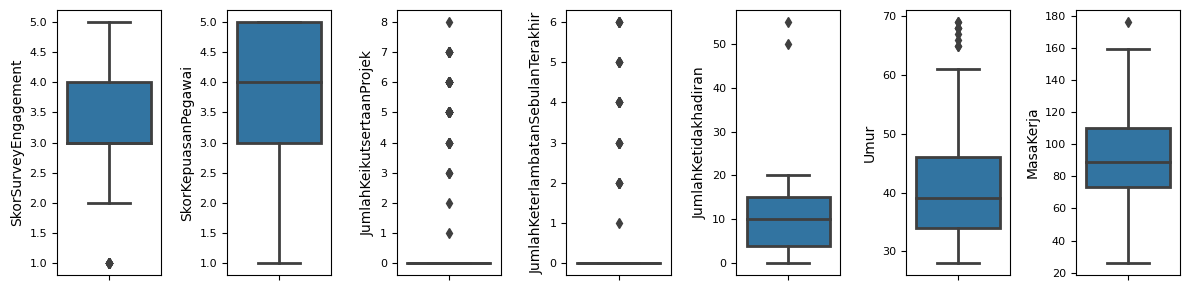

In [18]:
num = ['SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 
       'JumlahKeterlambatanSebulanTerakhir','JumlahKetidakhadiran',
      'Umur','MasaKerja']

from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 3
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8

for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df_prep[num[i]], orient='v')
    plt.tight_layout()

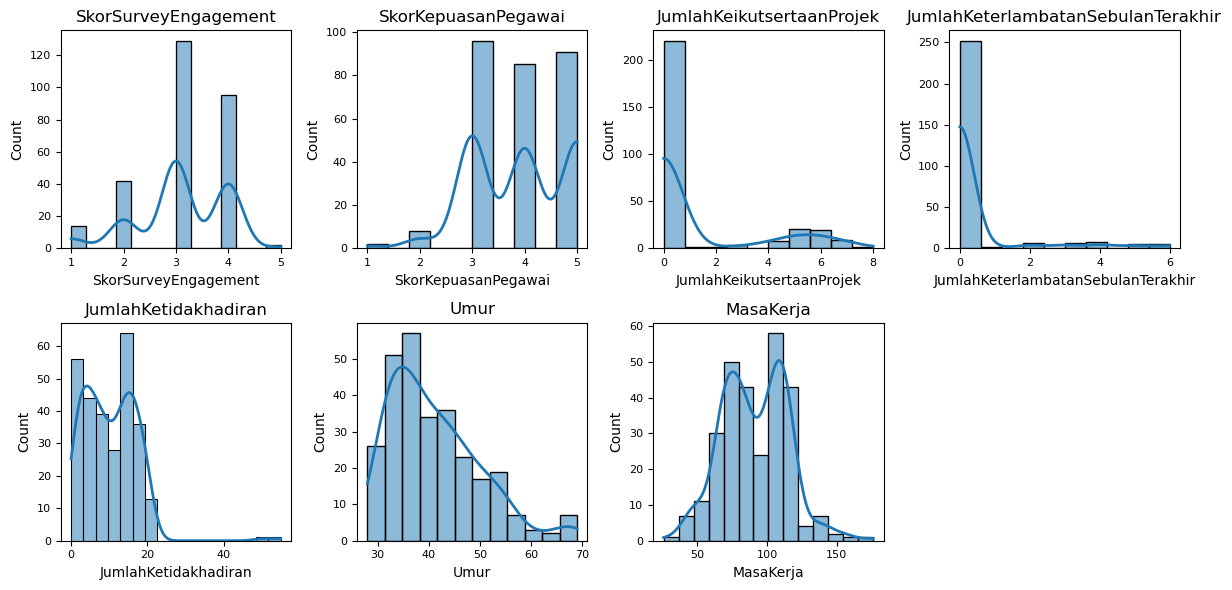

In [19]:
rcParams['figure.figsize'] = (12, 8)
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8

num = ['SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 
       'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran',
       'Umur', 'MasaKerja']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    if i < len(num):
        sns.histplot(df_prep[num[i]], kde=True, ax=ax)
        ax.set_title(num[i])
    else:
        ax.axis('off')  # Menonaktifkan sumbu kosong jika terdapat lebih banyak sumbu daripada fitur

plt.tight_layout()
plt.show()

# EDA

## Annual Report on Employee Number Changes

In [20]:
df_prep['TahunHiring'] = df_prep['TanggalHiring'].dt.year
df_prep['TahunResign'] = df_prep['TanggalResign'].dt.year

df_prep['TahunHiring'] = df_prep['TahunHiring'].astype('Int64')
df_prep['TahunResign'] = df_prep['TahunResign'].astype('Int64')

In [21]:
hired_count = df_prep.groupby('TahunHiring').size().reset_index(name='JumlahMasuk')
resigned_count = df_prep[df_prep['TahunResign'].notna()].groupby('TahunResign').size().reset_index(name='JumlahKeluar')

emp_change = hired_count.merge(resigned_count, left_on='TahunHiring', right_on='TahunResign', how='outer')
#emp_change.replace('<NA>', np.nan, inplace=True)

In [22]:
# Replace <NA> with NaN first, for consistency with pandas functions.
emp_change.replace('<NA>', np.nan, inplace=True)

# Fill NaN values
emp_change['TahunHiring'].fillna(emp_change['TahunResign'], inplace=True)
emp_change['TahunResign'].fillna(emp_change['TahunHiring'], inplace=True)
emp_change['JumlahMasuk'].fillna(0, inplace=True)
emp_change['JumlahKeluar'].fillna(0, inplace=True)

In [23]:
# Inisiasi kolom tambahan
emp_change['Bertahan'] = 0
emp_change['Perubahan'] = 0

total_previous_year = 0

for index, row in emp_change.iterrows():
    total_this_year = total_previous_year + row['JumlahMasuk'] - row['JumlahKeluar']
    emp_change.at[index, 'Bertahan'] = total_this_year
    emp_change.at[index, 'Perubahan'] = total_this_year - total_previous_year
    total_previous_year = total_this_year

emp_change

TahunHiring  JumlahMasuk  TahunResign  JumlahKeluar  Bertahan  Perubahan
0          2006          1.0         2006           0.0         1          1
1          2007          2.0         2007           0.0         3          2
2          2008          2.0         2008           0.0         5          2
3          2009          7.0         2009           0.0        12          7
4          2010          8.0         2010           0.0        20          8
5          2011         76.0         2011           0.0        96         76
6          2012         38.0         2012           0.0       134         38
7          2013         43.0         2013           5.0       172         38
8          2014         56.0         2014          12.0       216         44
9          2015         30.0         2015           8.0       238         22
10         2016         13.0         2016           8.0       243          5
11         2017          5.0         2017          19.0       229        -14
12         2018          1.0         2018          25.0       205        -24
13         2019          0.0         2019           5.0       200         -5
14         2020          0.0         2020           6.0       194         -6

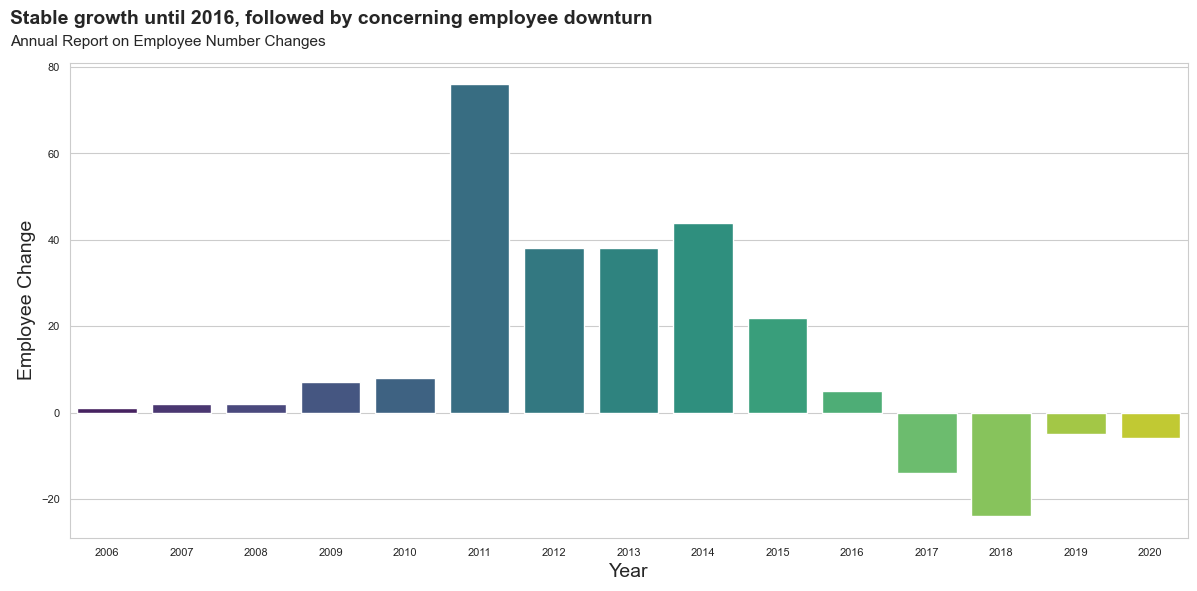

In [24]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=emp_change['TahunHiring'], y=emp_change['Perubahan'], palette="viridis")

plt.text(x=-1.3, y=90, s="Stable growth until 2016, followed by concerning employee downturn", fontsize=14, fontweight='bold') 
plt.text(x=-1.3, y=85, s="Annual Report on Employee Number Changes", fontsize=11)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Employee Change', fontsize=14)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Masa Pertumbuhan Awal (2006-2010):
Dari tahun 2006 hingga 2010, terlihat bahwa perusahaan mengalami pertumbuhan stabil dalam perekrutan karyawan, dengan penambahan 1-8 karyawan setiap tahun. Ini menunjukkan fase pertumbuhan awal perusahaan.

Lonjakan Perekrutan (2011-2014):
Tahun 2011 menunjukkan lonjakan besar dalam perekrutan dengan 76 karyawan baru. Ini bisa menunjukkan ekspansi besar atau proyek besar yang diambil perusahaan. Lonjakan ini berlanjut dengan perekrutan 38-56 karyawan baru di tahun-tahun berikutnya hingga 2014.
Meskipun ada beberapa karyawan yang keluar di tahun 2013 dan 2014, perusahaan tetap mengalami pertumbuhan bersih dalam jumlah karyawan di periode ini.

Perlambatan Perekrutan (2015-2016):
Di tahun 2015 dan 2016, pertumbuhan karyawan melambat, dengan penambahan hanya 30 dan 13 karyawan baru. Ini mungkin menunjukkan fase konsolidasi di mana perusahaan mungkin fokus pada pelatihan, pengembangan internal, atau integrasi karyawan baru yang telah direkrut sebelumnya.

Kerugian Karyawan dan Masalah Potensial (2017-2020):
Mulai 2017, perusahaan mengalami penurunan net dalam jumlah karyawan setiap tahun, dengan kehilangan 14 hingga 24 karyawan per tahun di 2017 dan 2018, dan kerugian yang lebih rendah di 2019 dan 2020.
Penurunan drastis ini, terutama di tahun 2017 dan 2018, bisa menjadi tanda bahwa ada masalah di perusahaan, mungkin berkaitan dengan budaya kerja, manajemen, atau kondisi pasar yang tidak menguntungkan.
Tidak adanya perekrutan baru di tahun 2019 dan 2020 juga menunjukkan bahwa perusahaan mungkin tidak dalam posisi untuk tumbuh atau ada kemungkinan mereka memilih untuk tidak merekrut untuk menghemat biaya.

Kesimpulan:
Pada awal tahun 2006 hingga sekitar 2016, perusahaan tampaknya dalam kondisi sehat dengan pertumbuhan karyawan yang stabil dan pertumbuhan net positif, kondisi setelah itu menunjukkan beberapa tanda-tanda mengkhawatirkan. Penurunan net dalam jumlah karyawan dan kurangnya perekrutan baru mungkin menunjukkan bahwa perusahaan sedang menghadapi beberapa tantangan internal atau eksternal yang signifikan. Diperlukan analisis lebih lanjut untuk menentukan penyebab pasti dari tren ini dan mengambil langkah-langkah korektif yang sesuai.

## Resign Reason Analysis for Employee Attrition Management Strategy

In [25]:
df_resigned = df_prep[df_prep['TanggalResign'].notnull()]
df_resigned_per_job = df_resigned.groupby('Pekerjaan').size().reset_index(name='TotalResigned')

df_not_resigned = df_prep[df_prep['TanggalResign'].isnull()]
df_not_resigned_per_job = df_not_resigned.groupby('Pekerjaan').size().reset_index(name='TotalNotResigned')

In [26]:
emp_change_by_job = df_resigned_per_job.merge(df_not_resigned_per_job, left_on='Pekerjaan', right_on='Pekerjaan', how='outer')
emp_change_by_job['TotalResigned'].fillna(0, inplace=True)

In [27]:
emp_change_by_job['TotalEmp'] = emp_change_by_job['TotalResigned'] + emp_change_by_job['TotalNotResigned']

emp_change_by_job['emp_not_resigned_pct'] = (emp_change_by_job['TotalNotResigned'] / emp_change_by_job['TotalEmp']) * 100
emp_change_by_job

Pekerjaan  TotalResigned  TotalNotResigned  TotalEmp  \
0                     Data Analyst            8.0                 8      16.0   
1                    Data Engineer            3.0                 7      10.0   
2         Product Design (UI & UX)            9.0                14      23.0   
3                  Product Manager            5.0                11      16.0   
4      Software Engineer (Android)            7.0                15      22.0   
5     Software Engineer (Back End)           28.0                80     108.0   
6    Software Engineer (Front End)           28.0                44      72.0   
7                  DevOps Engineer            0.0                 3       3.0   
8          Digital Product Manager            0.0                 2       2.0   
9        Machine Learning Engineer            0.0                 2       2.0   
10  Product Design (UX Researcher)            0.0                 1       1.0   
11                    Scrum Master            0.0                 3       3.0   
12              Software Architect            0.0                 1       1.0   
13         Software Engineer (iOS)            0.0                 3       3.0   

    emp_not_resigned_pct  
0              50.000000  
1              70.000000  
2              60.869565  
3              68.750000  
4              68.181818  
5              74.074074  
6              61.111111  
7             100.000000  
8             100.000000  
9             100.000000  
10            100.000000  
11            100.000000  
12            100.000000  
13            100.000000

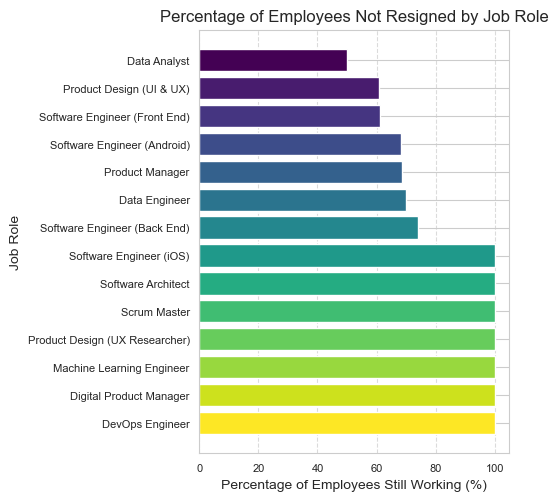

In [39]:
emp_change_by_job_sorted = emp_change_by_job.sort_values(by='emp_not_resigned_pct', ascending=False)

jobs_sorted = emp_change_by_job_sorted['Pekerjaan']
percentages_sorted = emp_change_by_job_sorted['emp_not_resigned_pct']

colors = plt.cm.viridis_r(np.linspace(0, 1, len(jobs_sorted)))

plt.figure(figsize=(4,5.5))
plt.barh(jobs_sorted, percentages_sorted, color=colors)
plt.xlabel('Percentage of Employees Still Working (%)')
plt.ylabel('Job Role')
plt.title('Percentage of Employees Not Resigned by Job Role')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

1. **Pekerjaan dengan Retensi Tertinggi**: Sejumlah posisi pekerjaan, seperti 'DevOps Engineer', 'Digital Product Manager', 'Machine Learning Engineer', 'Product Design (UX Researcher)', 'Scrum Master', 'Software Architect', dan 'Software Engineer (iOS)', menunjukkan retensi yang sempurna, dengan 100% karyawan yang belum resign. Hal ini bisa berarti beberapa hal:
   - Posisi tersebut mungkin baru saja dibuka sehingga belum ada karyawan yang resign.
   - Pekerjaan ini mungkin menawarkan kondisi kerja yang sangat baik sehingga karyawan merasa puas.
   - Jumlah sampel yang kecil (misalnya hanya 1 atau 2 karyawan) mungkin menyebabkan interpretasi yang salah mengenai retensi yang sempurna.

2. **Pekerjaan dengan Jumlah Karyawan Terbesar**: 'Software Engineer (Back End)' memiliki total karyawan terbesar (108 karyawan) dan juga memiliki persentase retensi yang cukup tinggi (sekitar 74.07%).

3. **Pekerjaan dengan Retensi Terendah**: 'Data Analyst' memiliki tingkat retensi terendah di sekitar 50%. Dengan kata lain, dari semua Data Analyst yang dipekerjakan, setengahnya sudah resign.

4. **Pekerjaan dengan Retensi Sedang**: Pekerjaan seperti 'Data Engineer', 'Product Design (UI & UX)', 'Product Manager', dan 'Software Engineer (Android)' memiliki retensi di kisaran 60%-70%. Meskipun ini lebih baik dari 'Data Analyst', masih ada ruang untuk meningkatkan retensi di bidang-bidang ini.

In [29]:
filtered_df = df_prep[(df_prep['Pekerjaan'] == 'Data Analyst') & (df['AlasanResign'] != "masih_bekerja")]

aggregated_df = filtered_df.groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign']).size().reset_index(name='TotalEmployeeResign')
aggregated_df

JenjangKarir PerformancePegawai       AlasanResign  \
0  Freshgraduate_program              Bagus      toxic_culture   
1  Freshgraduate_program              Biasa  internal_conflict   
2  Freshgraduate_program              Biasa      toxic_culture   
3  Freshgraduate_program       Sangat_bagus  internal_conflict   
4  Freshgraduate_program       Sangat_bagus      toxic_culture   
5  Freshgraduate_program      Sangat_kurang      toxic_culture   

   TotalEmployeeResign  
0                    1  
1                    1  
2                    1  
3                    1  
4                    3  
5                    1

In [30]:
fig = px.sunburst(aggregated_df, path=['JenjangKarir','AlasanResign', 'PerformancePegawai'], values='TotalEmployeeResign')

fig.update_layout(
    title={
        'text': "Unmasking the Silent Exit: The Underlying Culture Crisis among Fresh Graduate Data Analysts",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    titlefont=dict(size=14, family='Arial, bold'),
    annotations=[
        dict(
            text="Resign Reason Analysis for Employee Attrition in Data Analyst Department",
            x=0.5,
            y=1.08,
            xref="paper",
            yref="paper",
            showarrow=False,
            font=dict(size=11)
        )
    ],
    margin=dict(t=100, b=0, l=0, r=0),
    width=600,
    height=400
)

fig.show()

1. **Toxic Culture Sebagai Alasan Utama**: "Toxic culture" adalah alasan paling sering disebutkan untuk mengapa karyawan resign. Ini adalah indikasi kuat bahwa budaya kerja di divisi ini mungkin tidak mendukung atau mungkin merugikan kesejahteraan karyawan.

2. **Prestasi dan Alasan Resign**: Meskipun ada beberapa karyawan dengan performa "Bagus" dan "Sangat bagus" yang mengundurkan diri karena "toxic culture", ada juga karyawan dengan performa "Biasa" dan "Sangat kurang" yang mengundurkan diri dengan alasan yang sama. Hal ini menunjukkan bahwa budaya kerja yang toxic mempengaruhi karyawan di semua tingkatan prestasi.

3. **Fresh Graduates Lebih Terpengaruh**: Semua karyawan yang mengundurkan diri dan termasuk dalam analisis ini berasal dari program "Freshgraduate". Ini dapat menunjukkan bahwa karyawan yang lebih muda atau yang baru masuk ke dunia kerja mungkin lebih rentan terhadap efek dari budaya kerja yang toxic, atau mungkin mereka kurang toleran terhadap budaya seperti itu dibandingkan dengan karyawan yang lebih berpengalaman.

**Rekomendasi**:

1. **Kaji Ulang Budaya Kerja**: Manajemen harus segera melakukan kajian mendalam tentang apa yang menyebabkan budaya kerja dianggap "toxic". Menggunakan survei karyawan, wawancara, dan diskusi kelompok fokus dapat membantu mengidentifikasi masalah utama.

2. **Program Orientasi dan Pembinaan**: Fresh graduates mungkin memerlukan bimbingan dan dukungan tambahan saat pertama kali memasuki dunia kerja. Sebuah program orientasi atau mentoring yang efektif bisa membantu mereka beradaptasi dengan lingkungan kerja.

3. **Tingkatkan Komunikasi**: Terkadang, persepsi tentang "toxic culture" dapat muncul dari kesalahpahaman atau kurangnya komunikasi. Memastikan bahwa semua karyawan merasa didengar dan bahwa mereka memahami tujuan dan nilai-nilai perusahaan dapat membantu mengatasi beberapa masalah ini.

4. **Review Proses HR**: Pastikan bahwa departemen HR memiliki proses yang tepat untuk menangani keluhan karyawan dan karyawan merasa nyaman untuk mendekati HR mengenai masalah atau keprihatinan mereka.

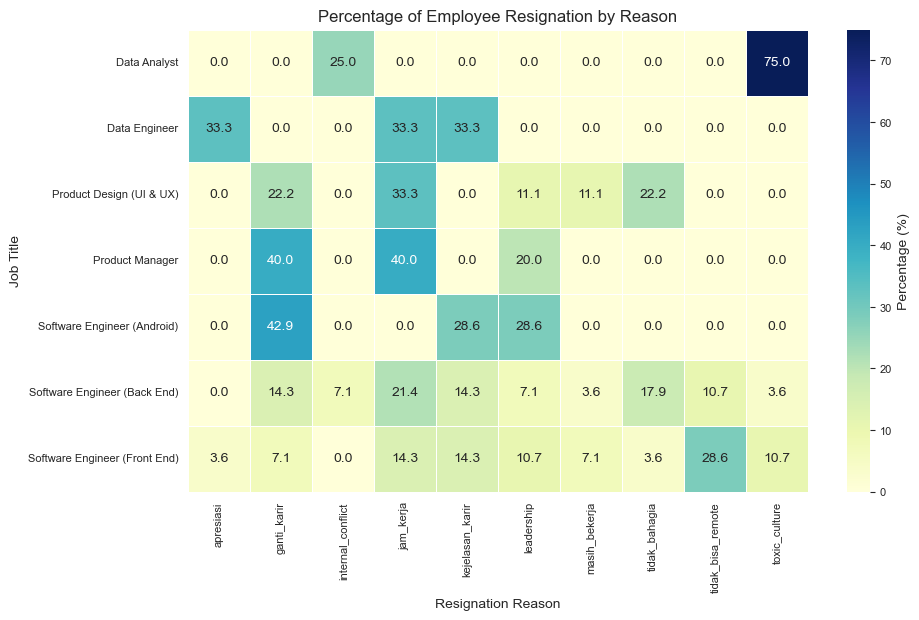

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

resign_reason_df = df_prep[df_prep['IsResign'] == 1]
resign_reason_df = resign_reason_df.groupby(['Pekerjaan', 'AlasanResign']).size().reset_index(name='TotalEmployeeResign')

pivot_df = resign_reason_df.pivot_table(index='Pekerjaan', columns='AlasanResign', values='TotalEmployeeResign', fill_value=0)

pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df_percentage, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=.5, cbar_kws={'label': 'Percentage (%)'})
plt.title("Percentage of Employee Resignation by Reason")
plt.ylabel("Job Title")
plt.xlabel("Resignation Reason")
plt.show()

## Descriptive statistics

In [40]:
df_prep.describe()

EnterpriseID  SkorSurveyEngagement  SkorKepuasanPegawai  \
count     282.000000            282.000000           282.000000   
mean   105888.872340              3.102837             3.904255   
std      4039.954828              0.839458             0.913355   
min    100282.000000              1.000000             1.000000   
25%    101266.500000              3.000000             3.000000   
50%    106051.500000              3.000000             4.000000   
75%    110503.750000              4.000000             5.000000   
max    111703.000000              5.000000             5.000000   

       JumlahKeikutsertaanProjek  JumlahKeterlambatanSebulanTerakhir  \
count                 282.000000                          282.000000   
mean                    1.166667                            0.404255   
std                     2.283444                            1.265354   
min                     0.000000                            0.000000   
25%                     0.000000                            0.000000   
50%                     0.000000                            0.000000   
75%                     0.000000                            0.000000   
max                     8.000000                            6.000000   

       JumlahKetidakhadiran        Umur   MasaKerja    IsResign  TahunHiring  \
count            282.000000  282.000000  282.000000  282.000000        282.0   
mean              10.216312   41.131206   91.209220    0.312057  2012.677305   
std                7.039241    8.870388   23.407625    0.464157     1.947381   
min                0.000000   28.000000   26.000000    0.000000       2006.0   
25%                4.000000   34.000000   73.250000    0.000000       2011.0   
50%               10.000000   39.000000   89.000000    0.000000       2013.0   
75%               15.000000   46.000000  110.000000    1.000000       2014.0   
max               55.000000   69.000000  176.000000    1.000000       2018.0   

       TahunResign  
count         88.0  
mean   2016.693182  
std       1.914001  
min         2013.0  
25%         2015.0  
50%         2017.0  
75%         2018.0  
max         2020.0

In [41]:
df_prep.describe(include='object')

Username StatusPernikahan JenisKelamin StatusKepegawaian  \
count          282              282          282               282   
unique         280                4            2                 3   
top     boredEggs0    Belum_menikah       Wanita          FullTime   
freq             2              130          165               213   

                           Pekerjaan           JenjangKarir  \
count                            282                    282   
unique                            14                      3   
top     Software Engineer (Back End)  Freshgraduate_program   
freq                             108                    166   

       PerformancePegawai     AsalDaerah HiringPlatform         NomorHP  \
count                 282            282            282             282   
unique                  5              5              9             282   
top                 Biasa  Jakarta Pusat         Indeed  +6282232522xxx   
freq                   82             70             84               1   

                                 Email TingkatPendidikan   AlasanResign  
count                              282               282            282  
unique                             282                 3             10  
top     spiritedPorpoise3135@yahoo.com           Sarjana  masih_bekerja  
freq                                 1               173            198

## Bivariate Analysis

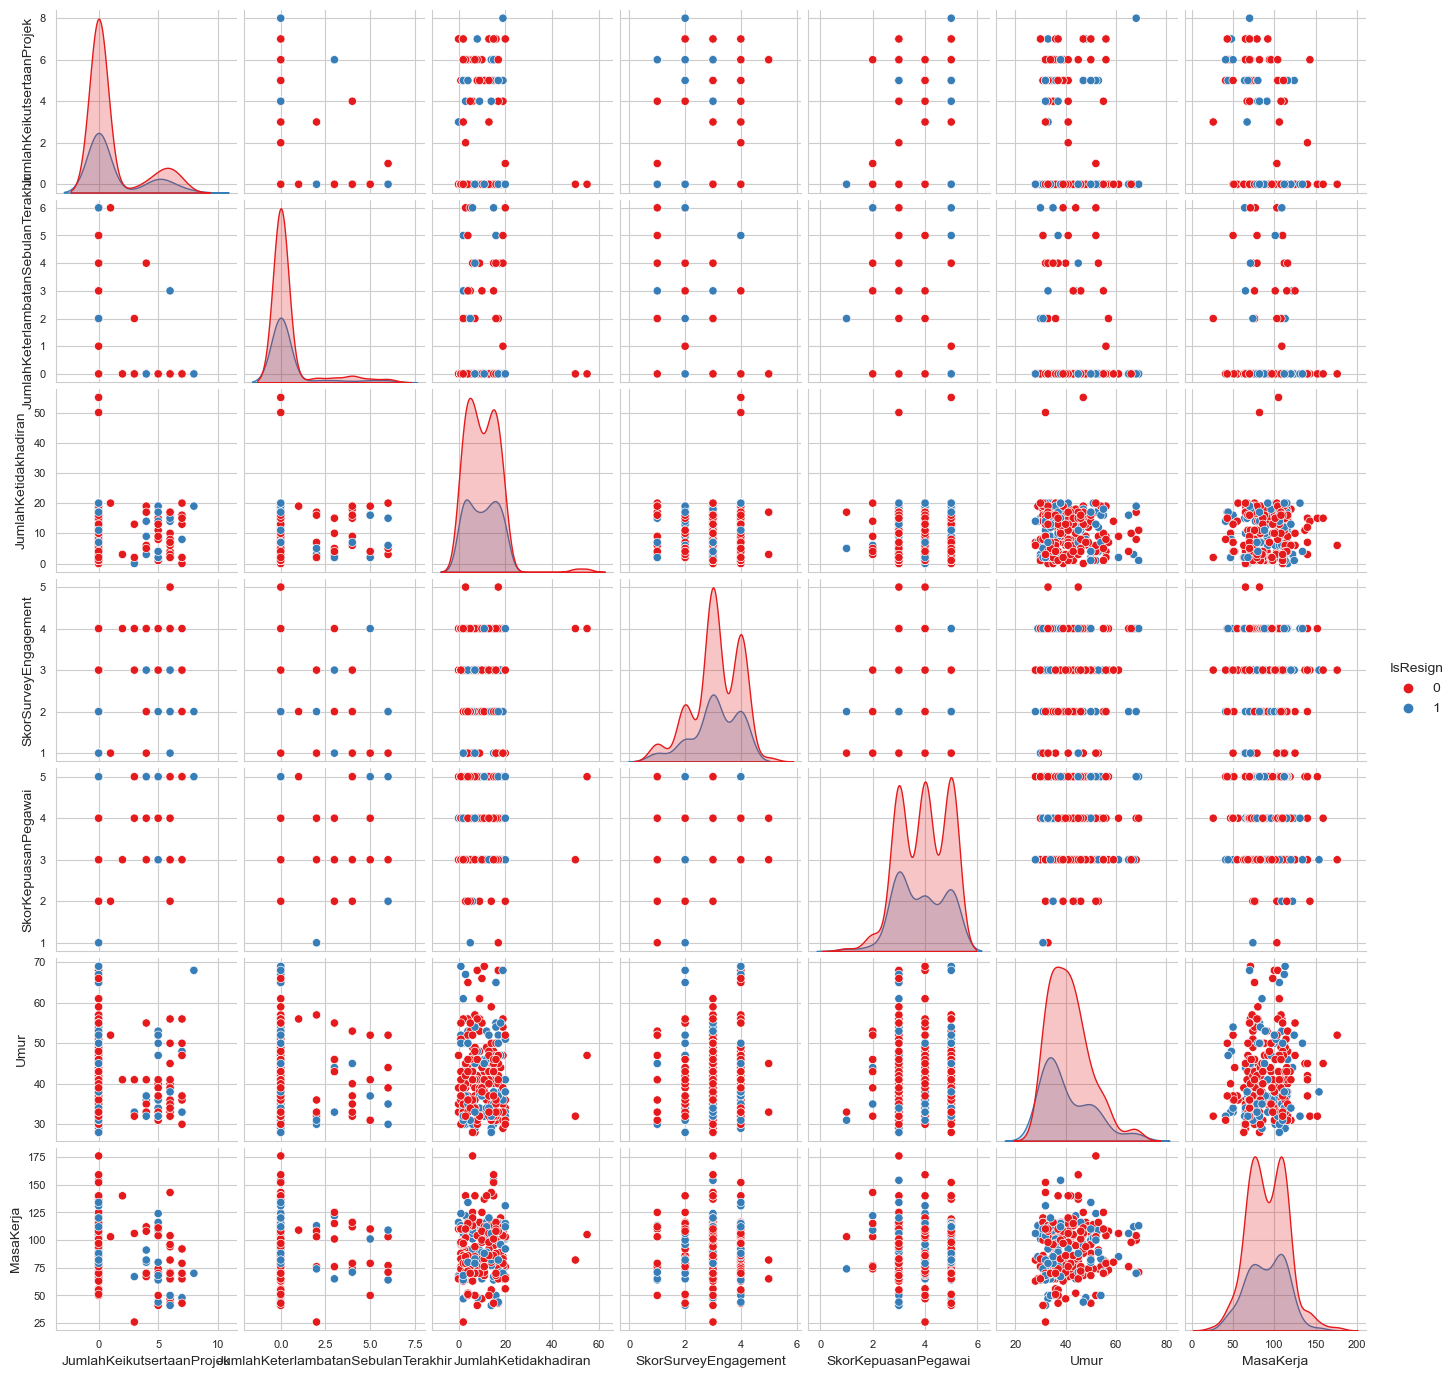

In [42]:
num = ['JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'SkorSurveyEngagement', 'SkorKepuasanPegawai', 
      'Umur', 'MasaKerja']
sns.pairplot(df_prep[num+['IsResign']], hue='IsResign', diag_kind = 'kde', palette="Set1", height=2)
plt.show()

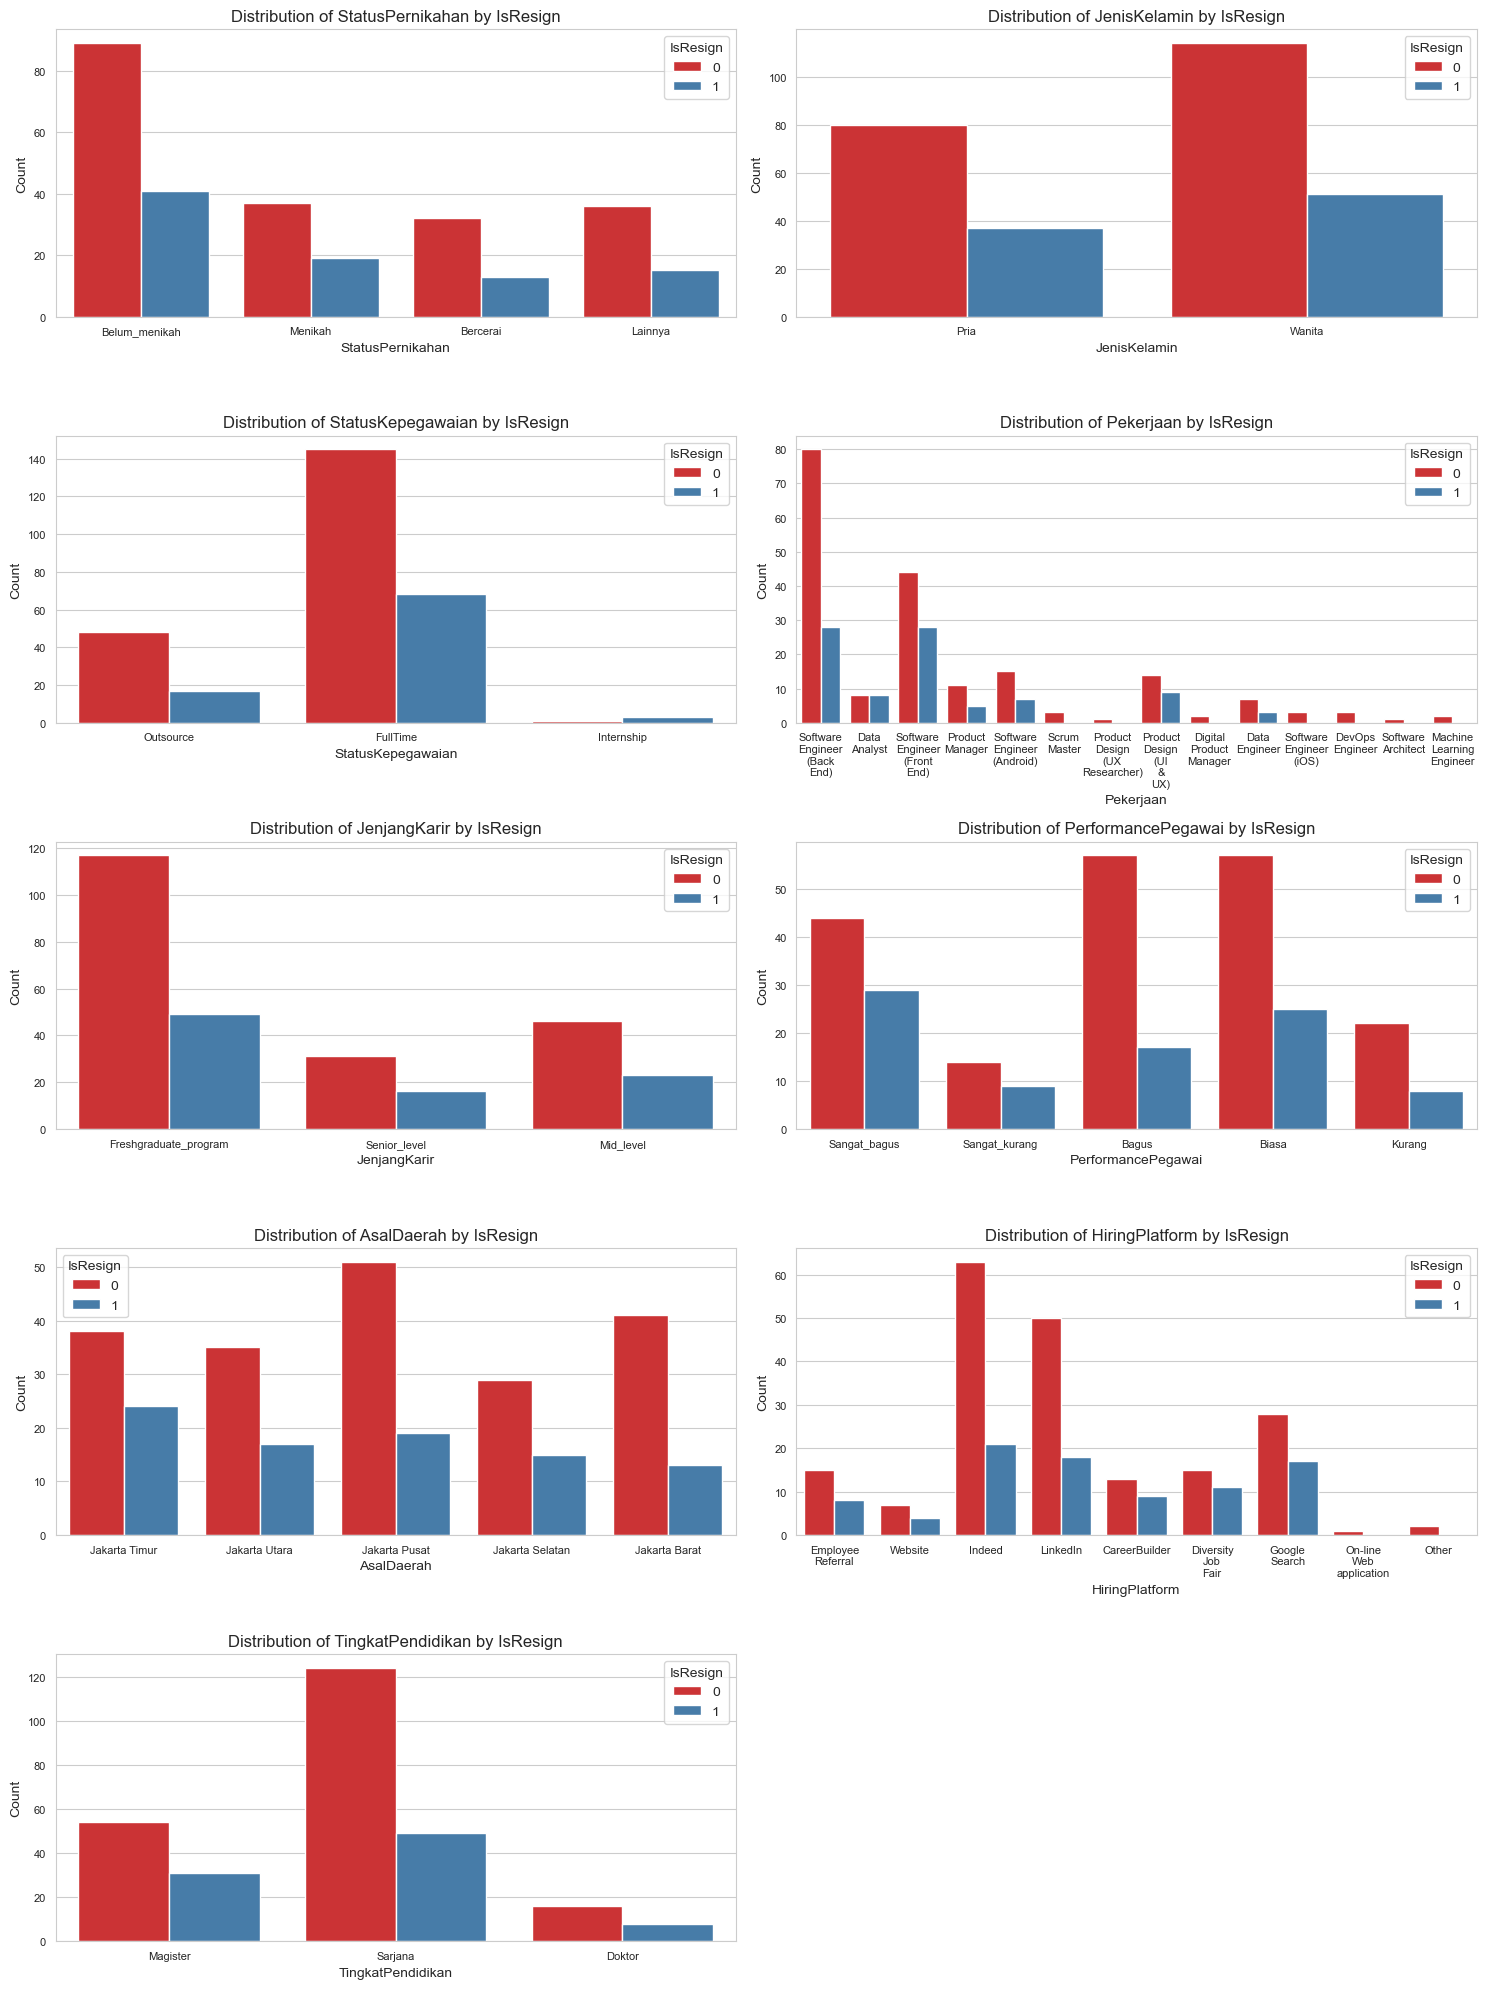

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

Cat = ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 
       'PerformancePegawai', 'AsalDaerah', 'HiringPlatform', 'TingkatPendidikan']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

axes = axes.ravel()

for i, col in enumerate(Cat):
    sns.countplot(data=df_prep, x=col, hue='IsResign', ax=axes[i], palette="Set1")
    axes[i].set_title(f"Distribution of {col} by IsResign")
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel(col)
    axes[i].legend(title='IsResign')
    
    if col == 'Pekerjaan':
        labels = axes[i].get_xticklabels()
        new_labels = [label.get_text().replace(" ", "\n") for label in labels]
        axes[i].set_xticklabels(new_labels)
        
    if col == 'HiringPlatform':
        labels = axes[i].get_xticklabels()
        new_labels = [label.get_text().replace("_", "\n") for label in labels]
        axes[i].set_xticklabels(new_labels)

for j in range(i+1, 10):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [229]:
import pandas as pd
from scipy.stats import chi2_contingency

Cat = ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'AsalDaerah','HiringPlatform', 'TingkatPendidikan']

results = []

for col in Cat:
    contingency = pd.crosstab(df_prep[col], df_prep['IsResign'])
    chi2, p, _, _ = chi2_contingency(contingency)
    results.append({'Variable': col, 'Chi2 Statistic': chi2, 'p-value': p})

results_df = pd.DataFrame(results)
results_df

Variable  Chi2 Statistic   p-value
0    StatusPernikahan        0.389073  0.942490
1        JenisKelamin        0.000000  1.000000
2   StatusKepegawaian        4.397675  0.110932
3           Pekerjaan       13.502437  0.409793
4        JenjangKarir        0.541919  0.762647
5  PerformancePegawai        5.785353  0.215762
6          AsalDaerah        3.667974  0.452801
7      HiringPlatform        7.214333  0.513694
8   TingkatPendidikan        1.817466  0.403034

In [230]:
import pandas as pd
from scipy.stats import pointbiserialr

num = ['JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'SkorSurveyEngagement', 'SkorKepuasanPegawai', 
      'Umur', 'MasaKerja']

results = []

for col in num:
    corr, p_value = pointbiserialr(df_prep[col], df_prep['IsResign'])
    results.append({'Variable': col, 'Correlation': corr, 'p-value': p_value})

results_df = pd.DataFrame(results)
results_df

Variable  Correlation   p-value
0           JumlahKeikutsertaanProjek     0.048127  0.420784
1  JumlahKeterlambatanSebulanTerakhir     0.002578  0.965617
2                JumlahKetidakhadiran    -0.008752  0.883666
3                SkorSurveyEngagement    -0.018720  0.754284
4                 SkorKepuasanPegawai    -0.055189  0.355818
5                                Umur    -0.050604  0.397244
6                           MasaKerja    -0.020770  0.728383

In [49]:
df_prep = df_prep.replace({'HiringPlatform' : {'On-line_Web_application' : 'Website and Online App', 'Website' : 'Website and Online App', 
                                               'Indeed' : 'General Job Search', 'CareerBuilder' : 'General Job Search', 
                                               'LinkedIn':'General Job Search', 'Google_Search':'General Job Search'}})
print(df_prep['HiringPlatform'].value_counts())
df_prep = df_prep.replace({'Pekerjaan' : {'Software Engineer (Back End)' : 'Software Engineer', 'Software Engineer (Front End)' : 'Software Engineer', 
                                          'Software Engineer (iOS)' : 'Software Engineer', 'Software Engineer (Android)':'Software Engineer',
                                          'Product Design (UI & UX)':'Product Roles','Product Manager':'Product Roles','Digital Product Manager':'Product Roles',
                                          'Data Analyst':'Data Roles', 'Data Engineer':'Data Roles', 'Machine Learning Engineer':'Data Roles',
                                          'Scrum Master':'Other','DevOps Engineer':'Other','Software Architect':'Software Engineer','Product Design (UX Researcher)':'Product Roles'
                                        }})
print(df_prep['Pekerjaan'].value_counts())

General Job Search        219
Diversity_Job_Fair         26
Employee_Referral          23
Website and Online App     12
Other                       2
Name: HiringPlatform, dtype: int64
Software Engineer    206
Product Roles         42
Data Roles            28
Other                  6
Name: Pekerjaan, dtype: int64


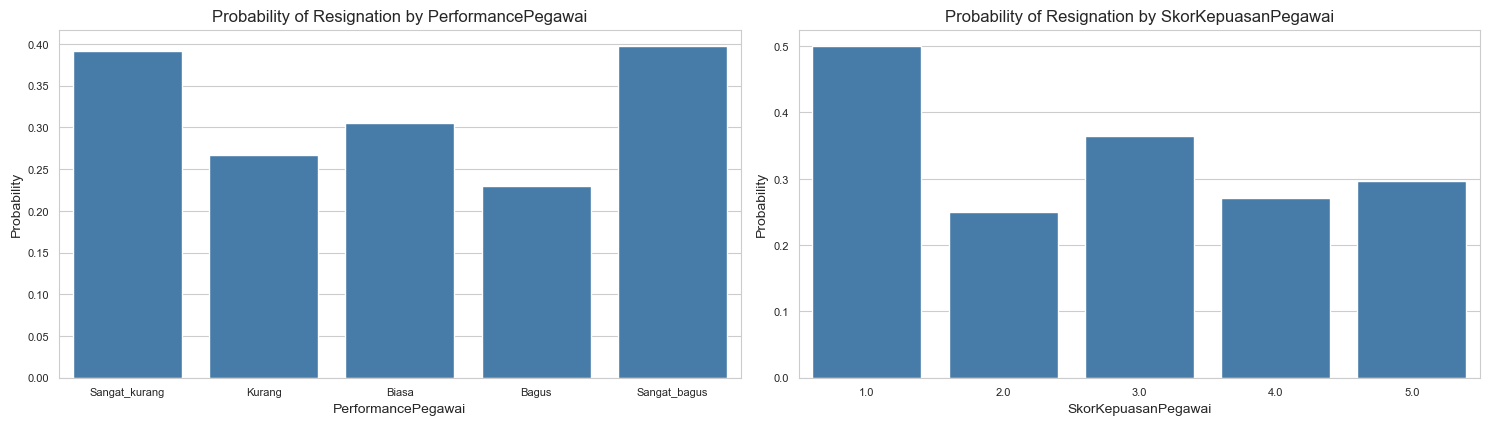

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

Cat = ['PerformancePegawai', 'SkorKepuasanPegawai']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

axes = axes.ravel()

performance_order = ['Sangat_kurang', 'Kurang', 'Biasa', 'Bagus', 'Sangat_bagus']

for i, col in enumerate(Cat):
    prob_resign = df_prep.groupby(col)['IsResign'].mean().reset_index()

    order = performance_order if col == 'PerformancePegawai' else None
    
    sns.barplot(data=prob_resign, x=col, y='IsResign', ax=axes[i], color="#377eb8", order=order)
    axes[i].set_title(f"Probability of Resignation by {col}")
    axes[i].set_ylabel("Probability")
    axes[i].set_xlabel(col)

for j in range(i+1, 10):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

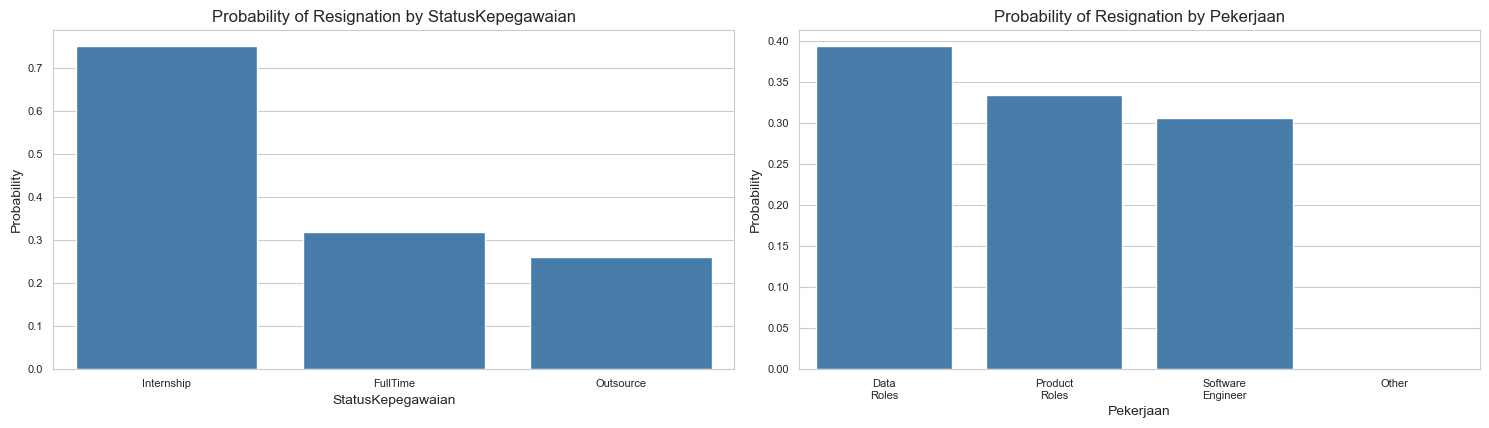

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

Cat = ['StatusKepegawaian', 'Pekerjaan']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

axes = axes.ravel()

for i, col in enumerate(Cat):
    prob_resign = df_prep.groupby(col)['IsResign'].mean().reset_index()
    
    prob_resign = prob_resign.sort_values(by='IsResign', ascending=False)
    
    sns.barplot(data=prob_resign, x=col, y='IsResign', ax=axes[i], color="#377eb8")
    axes[i].set_title(f"Probability of Resignation by {col}")
    axes[i].set_ylabel("Probability")
    axes[i].set_xlabel(col)
    
    if col == 'Pekerjaan':
        labels = axes[i].get_xticklabels()
        new_labels = [label.get_text().replace(" ", "\n") for label in labels]
        axes[i].set_xticklabels(new_labels)

for j in range(i+1, 10):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

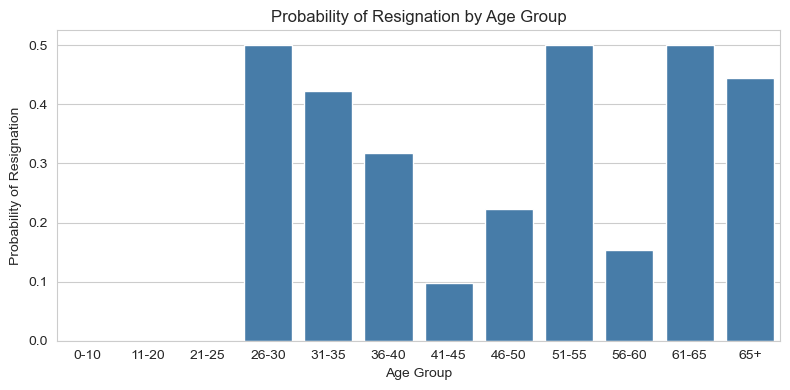

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bins = [0, 10, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 100]
labels = ['0-10','11-20', '21-25','26-30','31-35','36-40', '41-45','46-50', '51-55','56-60','61-65','65+']
df_prep['AgeGroup'] = pd.cut(df_prep['Umur'], bins=bins, labels=labels, right=False)

prob_resign_by_agegroup = df_prep.groupby('AgeGroup')['IsResign'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='AgeGroup', y='IsResign', data=prob_resign_by_agegroup, color='#377eb8')
plt.xlabel('Age Group')
plt.ylabel('Probability of Resignation')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Probability of Resignation by Age Group')
plt.tight_layout()
plt.show()

In [232]:
import pandas as pd
from scipy.stats import chi2_contingency

Cat = ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'AsalDaerah','HiringPlatform', 'TingkatPendidikan']

results = []

for col in Cat:
    contingency = pd.crosstab(df_prep[col], df_prep['IsResign'])
    chi2, p, _, _ = chi2_contingency(contingency)
    results.append({'Variable': col, 'Chi2 Statistic': chi2, 'p-value': p})

results_df = pd.DataFrame(results)
results_df

Variable  Chi2 Statistic   p-value
0    StatusPernikahan        0.389073  0.942490
1        JenisKelamin        0.000000  1.000000
2   StatusKepegawaian        4.397675  0.110932
3           Pekerjaan        3.699005  0.295854
4        JenjangKarir        0.541919  0.762647
5  PerformancePegawai        5.785353  0.215762
6          AsalDaerah        3.667974  0.452801
7      HiringPlatform        2.799703  0.591884
8   TingkatPendidikan        1.817466  0.403034

# Build an Automated Resignation Behavior Prediction using Machine Learning

In [233]:
df_new = df_prep.copy()
df_new = df_prep[['StatusKepegawaian', 'PerformancePegawai', 'Pekerjaan','SkorKepuasanPegawai','Umur','IsResign']].copy()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 286
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   StatusKepegawaian    282 non-null    object 
 1   PerformancePegawai   282 non-null    object 
 2   Pekerjaan            282 non-null    object 
 3   SkorKepuasanPegawai  282 non-null    float64
 4   Umur                 282 non-null    int64  
 5   IsResign             282 non-null    int32  
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 14.3+ KB


In [234]:
cat = ['StatusKepegawaian', 'PerformancePegawai', 'Pekerjaan','SkorKepuasanPegawai','IsResign']
for col in cat:
    print(f'value counts of column {col}')
    print(df_new[col].value_counts())
    print('---'*14, '\n')

value counts of column StatusKepegawaian
FullTime      213
Outsource      65
Internship      4
Name: StatusKepegawaian, dtype: int64
------------------------------------------ 

value counts of column PerformancePegawai
Biasa            82
Bagus            74
Sangat_bagus     73
Kurang           30
Sangat_kurang    23
Name: PerformancePegawai, dtype: int64
------------------------------------------ 

value counts of column Pekerjaan
Software Engineer    206
Product Roles         42
Data Roles            28
Other                  6
Name: Pekerjaan, dtype: int64
------------------------------------------ 

value counts of column SkorKepuasanPegawai
3.0    96
5.0    91
4.0    85
2.0     8
1.0     2
Name: SkorKepuasanPegawai, dtype: int64
------------------------------------------ 

value counts of column IsResign
0    194
1     88
Name: IsResign, dtype: int64
------------------------------------------ 



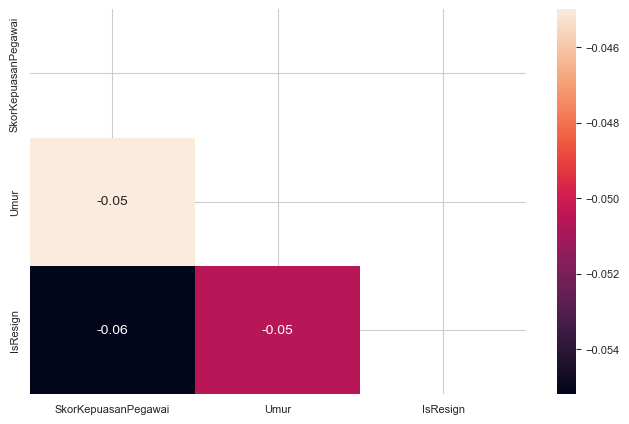

In [235]:
corr = df_new.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(8, 5))
sns.heatmap(df_new.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

## Split data

In [236]:
X = df_new.drop(columns=['IsResign',], axis=1)
y = df_new[['IsResign']]

X.sample(5)

StatusKepegawaian PerformancePegawai          Pekerjaan  \
104         Outsource       Sangat_bagus  Software Engineer   
222          FullTime              Biasa  Software Engineer   
256          FullTime       Sangat_bagus  Software Engineer   
236          FullTime             Kurang         Data Roles   
40          Outsource      Sangat_kurang      Product Roles   

     SkorKepuasanPegawai  Umur  
104                  3.0    29  
222                  3.0    59  
256                  5.0    68  
236                  4.0    32  
40                   4.0    41

In [237]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [238]:
print(X_train.shape)
print(y_train.shape)
print('')
print(X_test.shape)
print(y_test.shape)

(197, 5)
(197, 1)

(85, 5)
(85, 1)


In [239]:
print(y_train.value_counts())
print('')
print(y_test.value_counts())

IsResign
0           136
1            61
dtype: int64

IsResign
0           58
1           27
dtype: int64


## Handle outlier

In [240]:
def calculate_iqr_stat(data, cols_list):
    iqr_stat = {}
    for cols in cols_list:
        q1 = data[cols].quantile(q=0.25)
        q3 = data[cols].quantile(q=0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        iqr_stat[cols] = (lower_bound, upper_bound)
    return iqr_stat

def replace_outliers_using_train_stat(data, iqr_stat):
    for cols, bounds in iqr_stat.items():
        data.loc[data[cols] < bounds[0], cols] = bounds[0]
        data.loc[data[cols] > bounds[1], cols] = bounds[1]
    return data

In [241]:
# Menghitung batas atas dan batas bawah dari X_train
iqr_stat_train = calculate_iqr_stat(X_train,['Umur'])

# Mengoreksi outlier pada X_train dan X_test dengan batas dari X_train
X_train_filtered = replace_outliers_using_train_stat(X_train, iqr_stat_train)
X_test_filtered = replace_outliers_using_train_stat(X_test, iqr_stat_train)

In [242]:
print(X_train_filtered.shape)
print(y_train.shape)
print('')
print(X_test_filtered.shape)
print(y_test.shape)

(197, 5)
(197, 1)

(85, 5)
(85, 1)


## Feature encoding

In [243]:
X_train_filtered = pd.get_dummies(X_train, columns=['StatusKepegawaian','Pekerjaan'], drop_first=True)
X_test_filtered = pd.get_dummies(X_test, columns=['StatusKepegawaian','Pekerjaan'], drop_first=True)

X_train_filtered['PerformancePegawai'] = X_train['PerformancePegawai'].astype('category').cat.codes
X_test_filtered['PerformancePegawai'] = X_test['PerformancePegawai'].astype('category').cat.codes

In [244]:
X_train_filtered.head()

PerformancePegawai  SkorKepuasanPegawai  Umur  \
66                    1                  3.0  57.0   
142                   4                  4.0  42.0   
272                   1                  4.0  41.0   
174                   1                  4.0  47.0   
99                    4                  3.0  40.0   

     StatusKepegawaian_Internship  StatusKepegawaian_Outsource  \
66                              0                            0   
142                             0                            1   
272                             0                            0   
174                             0                            0   
99                              0                            0   

     Pekerjaan_Other  Pekerjaan_Product Roles  Pekerjaan_Software Engineer  
66                 0                        0                            0  
142                0                        0                            1  
272                0                        0                            1  
174                0                        0                            1  
99                 0                        0                            1

In [245]:
X_test_filtered.head()

PerformancePegawai  SkorKepuasanPegawai  Umur  \
23                    0                  3.0  29.0   
1                     4                  4.0  36.0   
270                   1                  3.0  66.0   
53                    1                  4.0  33.0   
34                    1                  3.0  32.0   

     StatusKepegawaian_Internship  StatusKepegawaian_Outsource  \
23                              0                            1   
1                               0                            0   
270                             0                            0   
53                              0                            0   
34                              0                            1   

     Pekerjaan_Other  Pekerjaan_Product Roles  Pekerjaan_Software Engineer  
23                 0                        0                            1  
1                  0                        0                            0  
270                0                        0                            1  
53                 0                        1                            0  
34                 0                        0                            1

## Feature scaling

In [246]:
print(X_train_filtered.columns)
print('')
print(X_test_filtered.columns)

Index(['PerformancePegawai', 'SkorKepuasanPegawai', 'Umur',
       'StatusKepegawaian_Internship', 'StatusKepegawaian_Outsource',
       'Pekerjaan_Other', 'Pekerjaan_Product Roles',
       'Pekerjaan_Software Engineer'],
      dtype='object')

Index(['PerformancePegawai', 'SkorKepuasanPegawai', 'Umur',
       'StatusKepegawaian_Internship', 'StatusKepegawaian_Outsource',
       'Pekerjaan_Other', 'Pekerjaan_Product Roles',
       'Pekerjaan_Software Engineer'],
      dtype='object')


In [247]:
# Transformasi akar kuadrat pada kolom 'Umur'
X_train_filtered['Umur'] = X_train_filtered['Umur'].apply(lambda x: x**0.5)
X_test_filtered['Umur'] = X_test_filtered['Umur'].apply(lambda x: x**0.5)

In [248]:
X_train_prep = X_train_filtered.copy()
X_test_prep = X_test_filtered.copy()

In [249]:
print(X_train_prep.shape)
print(y_train.shape)
print('')
print(X_test_prep.shape)
print(y_test.shape)

(197, 8)
(197, 1)

(85, 8)
(85, 1)


In [250]:
X_train_prep.head()

PerformancePegawai  SkorKepuasanPegawai      Umur  \
66                    1                  3.0  7.549834   
142                   4                  4.0  6.480741   
272                   1                  4.0  6.403124   
174                   1                  4.0  6.855655   
99                    4                  3.0  6.324555   

     StatusKepegawaian_Internship  StatusKepegawaian_Outsource  \
66                              0                            0   
142                             0                            1   
272                             0                            0   
174                             0                            0   
99                              0                            0   

     Pekerjaan_Other  Pekerjaan_Product Roles  Pekerjaan_Software Engineer  
66                 0                        0                            0  
142                0                        0                            1  
272                0                        0                            1  
174                0                        0                            1  
99                 0                        0                            1

In [251]:
X_test_prep.head()

PerformancePegawai  SkorKepuasanPegawai      Umur  \
23                    0                  3.0  5.385165   
1                     4                  4.0  6.000000   
270                   1                  3.0  8.124038   
53                    1                  4.0  5.744563   
34                    1                  3.0  5.656854   

     StatusKepegawaian_Internship  StatusKepegawaian_Outsource  \
23                              0                            1   
1                               0                            0   
270                             0                            0   
53                              0                            0   
34                              0                            1   

     Pekerjaan_Other  Pekerjaan_Product Roles  Pekerjaan_Software Engineer  
23                 0                        0                            1  
1                  0                        0                            0  
270                0                        0                            1  
53                 0                        1                            0  
34                 0                        0                            1

## Modeling

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [59]:
def eval_classification(model, model_name, X_train, X_test):
    y_pred_proba_train = model.predict_proba(X_train)
    y_predict_prob_class_1_train = y_pred_proba_train[:,1]
    y_pred_train = [1 if prob > 0.5 else 0 for prob in y_predict_prob_class_1_train]

    y_pred_proba_test = model.predict_proba(X_test)
    y_predict_prob_class_1_test = y_pred_proba_test[:,1]
    y_pred_test = [1 if prob > 0.5 else 0 for prob in y_predict_prob_class_1_test]

    score_f1 = cross_validate(model, X_train, y_train, cv=5, scoring='f1', return_train_score=True)
    score_rocauc = cross_validate(model, X_train, y_train, cv=5, scoring='roc_auc', return_train_score=True)
    
    # Initialization
    results = {'Evaluation Metrics': [], 'Train': [], 'Test': []}

    # Train
    train_scores = [
        round(accuracy_score(y_train, y_pred_train),4),
        round(precision_score(y_train, y_pred_train),4),
        round(recall_score(y_train, y_pred_train),4),
        round(f1_score(y_train, y_pred_train),4),
        round(score_f1['train_score'].mean(),4),
        round(roc_auc_score(y_train, y_pred_proba_train[:, 1]),4),
        round(score_rocauc['train_score'].mean(),4)
    ]

    # Test    
    test_scores = [
        round(accuracy_score(y_test, y_pred_test), 4),
        round(precision_score(y_test, y_pred_test), 4),
        round(recall_score(y_test, y_pred_test), 4),
        round(f1_score(y_test, y_pred_test), 4),
        round(score_f1['test_score'].mean(), 4),
        round(roc_auc_score(y_test, y_pred_proba_test[:, 1]), 4),
        round(score_rocauc['test_score'].mean(), 4)
    ]

    # Metrics
    metrics = [
        'Accuracy', 
        'Precision', 
        'Recall', 
        'F1 Score',
        'F1 Score (crossval)', 
        'ROC AUC',
        'ROC AUC (crossval)'
    ]

    # Update results dictionary
    results['Evaluation Metrics'].extend(metrics)
    results['Train'].extend(train_scores)
    results['Test'].extend(test_scores)

    # Convert to DataFrame
    df_results = pd.DataFrame(results)
    # print('Model Evaluation in Training - Testing using '+model_name+':\n')
    return df_results

# Create a function to save metrics for different classifiers
def save_evaluation_metrics(models):
    all_results = []
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        df_result = eval_classification(model, model_name, X_train, X_test)
        df_result['Classifier'] = model_name
        all_results.append(df_result)

    # Concatenate all results into a single DataFrame
    final_df = pd.concat(all_results, axis=0).reset_index(drop=True)
    return final_df

In [254]:
# Define classifiers
X_train = X_train_prep
X_test = X_test_prep

#X_train = np.ascontiguousarray(X_train)
#X_test = np.ascontiguousarray(X_test)
#y_train = y_train.iloc[:, 0]
#y_test = y_test.iloc[:, 0]

models = {
    'Random Forest': RandomForestClassifier(random_state=42).fit(X_train, y_train),
    'Decision Tree': DecisionTreeClassifier(random_state=42).fit(X_train, y_train),
    'Gradient Boosting' : GradientBoostingClassifier().fit(X_train, y_train),
    'Naive Bayes' : GaussianNB().fit(X_train, y_train),
    'Neural Network': MLPClassifier(random_state=42, max_iter=len(X_train)).fit(X_train, y_train),
    'AdaBoost' : AdaBoostClassifier(random_state=42).fit(X_train, y_train),
    'XGBoost' : XGBClassifier(random_state=42).fit(X_train, y_train),
    'LGBM' : LGBMClassifier(random_state=42, verbose=-1).fit(X_train, y_train),
    'Logistic Regression': LogisticRegression().fit(X_train, y_train),
    'KNN': KNeighborsClassifier().fit(X_train,y_train),
    #'SVM' : SVC(kernel='rbf', probability=True, random_state=42).fit(X_train, y_train)
}

In [61]:
# Evaluate all classifiers and save the results
final_results =  save_evaluation_metrics(models)
pivoted_df = final_results.pivot(index='Classifier', columns='Evaluation Metrics', values=['Train', 'Test'])

pivoted_df.columns = [col[1].lower() + '_' + col[0].lower() for col in pivoted_df.columns.values]
pivoted_df.reset_index(inplace=True)

column_order = [
    'Classifier',
    'accuracy_train', 
    'accuracy_test', 
    'precision_train', 
    'precision_test',
    'recall_train',
    'recall_test',
    'f1 score_train', 
    'f1 score_test', 
    'roc auc_train',
    'roc auc_test',
    'f1 score (crossval)_train', 
    'f1 score (crossval)_test',
    'roc auc (crossval)_train', 
    'roc auc (crossval)_test'
]

pivoted_df = pivoted_df[column_order]
pivoted_df

Classifier  accuracy_train  accuracy_test  precision_train  \
0             AdaBoost          0.7665         0.6706           0.7586   
1        Decision Tree          0.9340         0.6235           0.9800   
2    Gradient Boosting          0.8579         0.7059           0.9459   
3                  KNN          0.7563         0.6471           0.6667   
4                 LGBM          0.8071         0.6941           0.7949   
5  Logistic Regression          0.6904         0.6824           0.5000   
6          Naive Bayes          0.7157         0.6706           0.6471   
7       Neural Network          0.7310         0.6706           0.7222   
8        Random Forest          0.9340         0.6588           0.9000   
9              XGBoost          0.9239         0.6706           0.9423   

   precision_test  recall_train  recall_test  f1 score_train  f1 score_test  \
0          0.4667        0.3607       0.2593          0.4889         0.3333   
1          0.3333        0.8033       0.1852          0.8829         0.2381   
2          0.6000        0.5738       0.2222          0.7143         0.3243   
3          0.3846        0.4262       0.1852          0.5200         0.2500   
4          0.5556        0.5082       0.1852          0.6200         0.2778   
5          0.5000        0.0492       0.0370          0.0896         0.0690   
6          0.4286        0.1803       0.1111          0.2821         0.1765   
7          0.4286        0.2131       0.1111          0.3291         0.1765   
8          0.4375        0.8852       0.2593          0.8926         0.3256   
9          0.4706        0.8033       0.2963          0.8673         0.3636   

   roc auc_train  roc auc_test  f1 score (crossval)_train  \
0         0.7768        0.6746                     0.4868   
1         0.9897        0.5128                     0.9014   
2         0.9373        0.6523                     0.7778   
3         0.8142        0.5326                     0.5346   
4         0.8868        0.6351                     0.6055   
5         0.6578        0.5393                     0.1369   
6         0.6721        0.5345                     0.3624   
7         0.7122        0.5565                     0.3389   
8         0.9880        0.5702                     0.9074   
9         0.9857        0.6172                     0.8864   

   f1 score (crossval)_test  roc auc (crossval)_train  roc auc (crossval)_test  
0                    0.3311                    0.8035                   0.5836  
1                    0.4177                    0.9925                   0.6002  
2                    0.4267                    0.9643                   0.6102  
3                    0.3845                    0.7987                   0.6091  
4                    0.4262                    0.8786                   0.6369  
5                    0.0879                    0.6588                   0.5888  
6                    0.2555                    0.6734                   0.5983  
7                    0.1621                    0.7296                   0.6071  
8                    0.2825                    0.9918                   0.5972  
9                    0.3789                    0.9879                   0.6134

In [62]:
# Save to Excel
# pivoted_df.to_excel("pivoted_data.xlsx", index=False)

Ketika ingin memprediksi apakah seorang pegawai akan resign atau tidak, keputusan mengenai metrik evaluasi dan tindakan yang harus diambil tergantung pada konteks dan konsekuensi dari kesalahan prediksi. Mari kita pertimbangkan dampak dari masing-masing:

1. **False Positive (Type I Error)**: Jika model memprediksi bahwa seorang pegawai akan resign, tetapi sebenarnya mereka tidak, maka sumber daya tambahan mungkin dikeluarkan untuk mencoba mempertahankan pegawai tersebut (mis. promosi, pelatihan, atau bonus). Meskipun ini dapat meningkatkan kepuasan pegawai, juga bisa mengakibatkan biaya tambahan yang tidak perlu.

2. **False Negative (Type II Error)**: Jika model memprediksi bahwa seorang pegawai tidak akan resign, tetapi sebenarnya mereka melakukannya, perusahaan mungkin kehilangan pegawai berharga tanpa persiapan yang memadai, mengakibatkan biaya perekrutan dan pelatihan yang meningkat serta potensi gangguan dalam operasi.

Bergantung pada tujuan bisnis:

- Jika ingin **menghindari kehilangan pegawai berharga**, berarti ingin **mengurangi false negatives**. Dalam hal ini, sensitivitas (atau **recall**) menjadi metrik penting, karena ingin mengidentifikasi sebanyak mungkin pegawai yang sebenarnya akan resign.

- Jika ingin **menghindari biaya tambahan yang tidak perlu**, berarti ingin **mengurangi false positives**. Dalam hal ini, **presisi** menjadi metrik penting, karena ingin sebanyak mungkin dari prediksi "akan resign" benar-benar akurat.

1. **Recall (Sensitivitas)**: Merupakan proporsi pegawai yang benar-benar resign yang berhasil diprediksi oleh model. Dalam konteks ini, recall tinggi penting agar perusahaan dapat mempersiapkan diri terhadap potensi risiko pegawai yang akan resign.
2. **Precision**: Merupakan proporsi pegawai yang diprediksi akan resign oleh model yang benar-benar resign. Precision yang tinggi mengurangi "false alarm".
3. **F1-Score**: Merupakan harmonic mean dari precision dan recall. F1-score tinggi menunjukkan balance yang baik antara precision dan recall.
4. **ROC AUC**: Luas area di bawah kurva ROC. Nilai yang lebih tinggi menunjukkan model yang lebih baik.

- A balanced model in terms of precision and recall on the test set, Gradient Boosting seems decent
- F1 Score: This is the harmonic mean of precision and recall. On the test set, Gradient Boosting, XGBoost, and AdaBoost have the highest F1 scores with 0.3243, 0.3636, and 0.3333 respectively. However, when considering cross-validation, Gradient Boosting is the top performer
- Gradient Boosting has a high ROC AUC on both training and test sets.
- When considering F1 and ROC AUC scores from cross-validation, Gradient Boosting and XGBoost perform well

**Best Method : Gradient boosting**

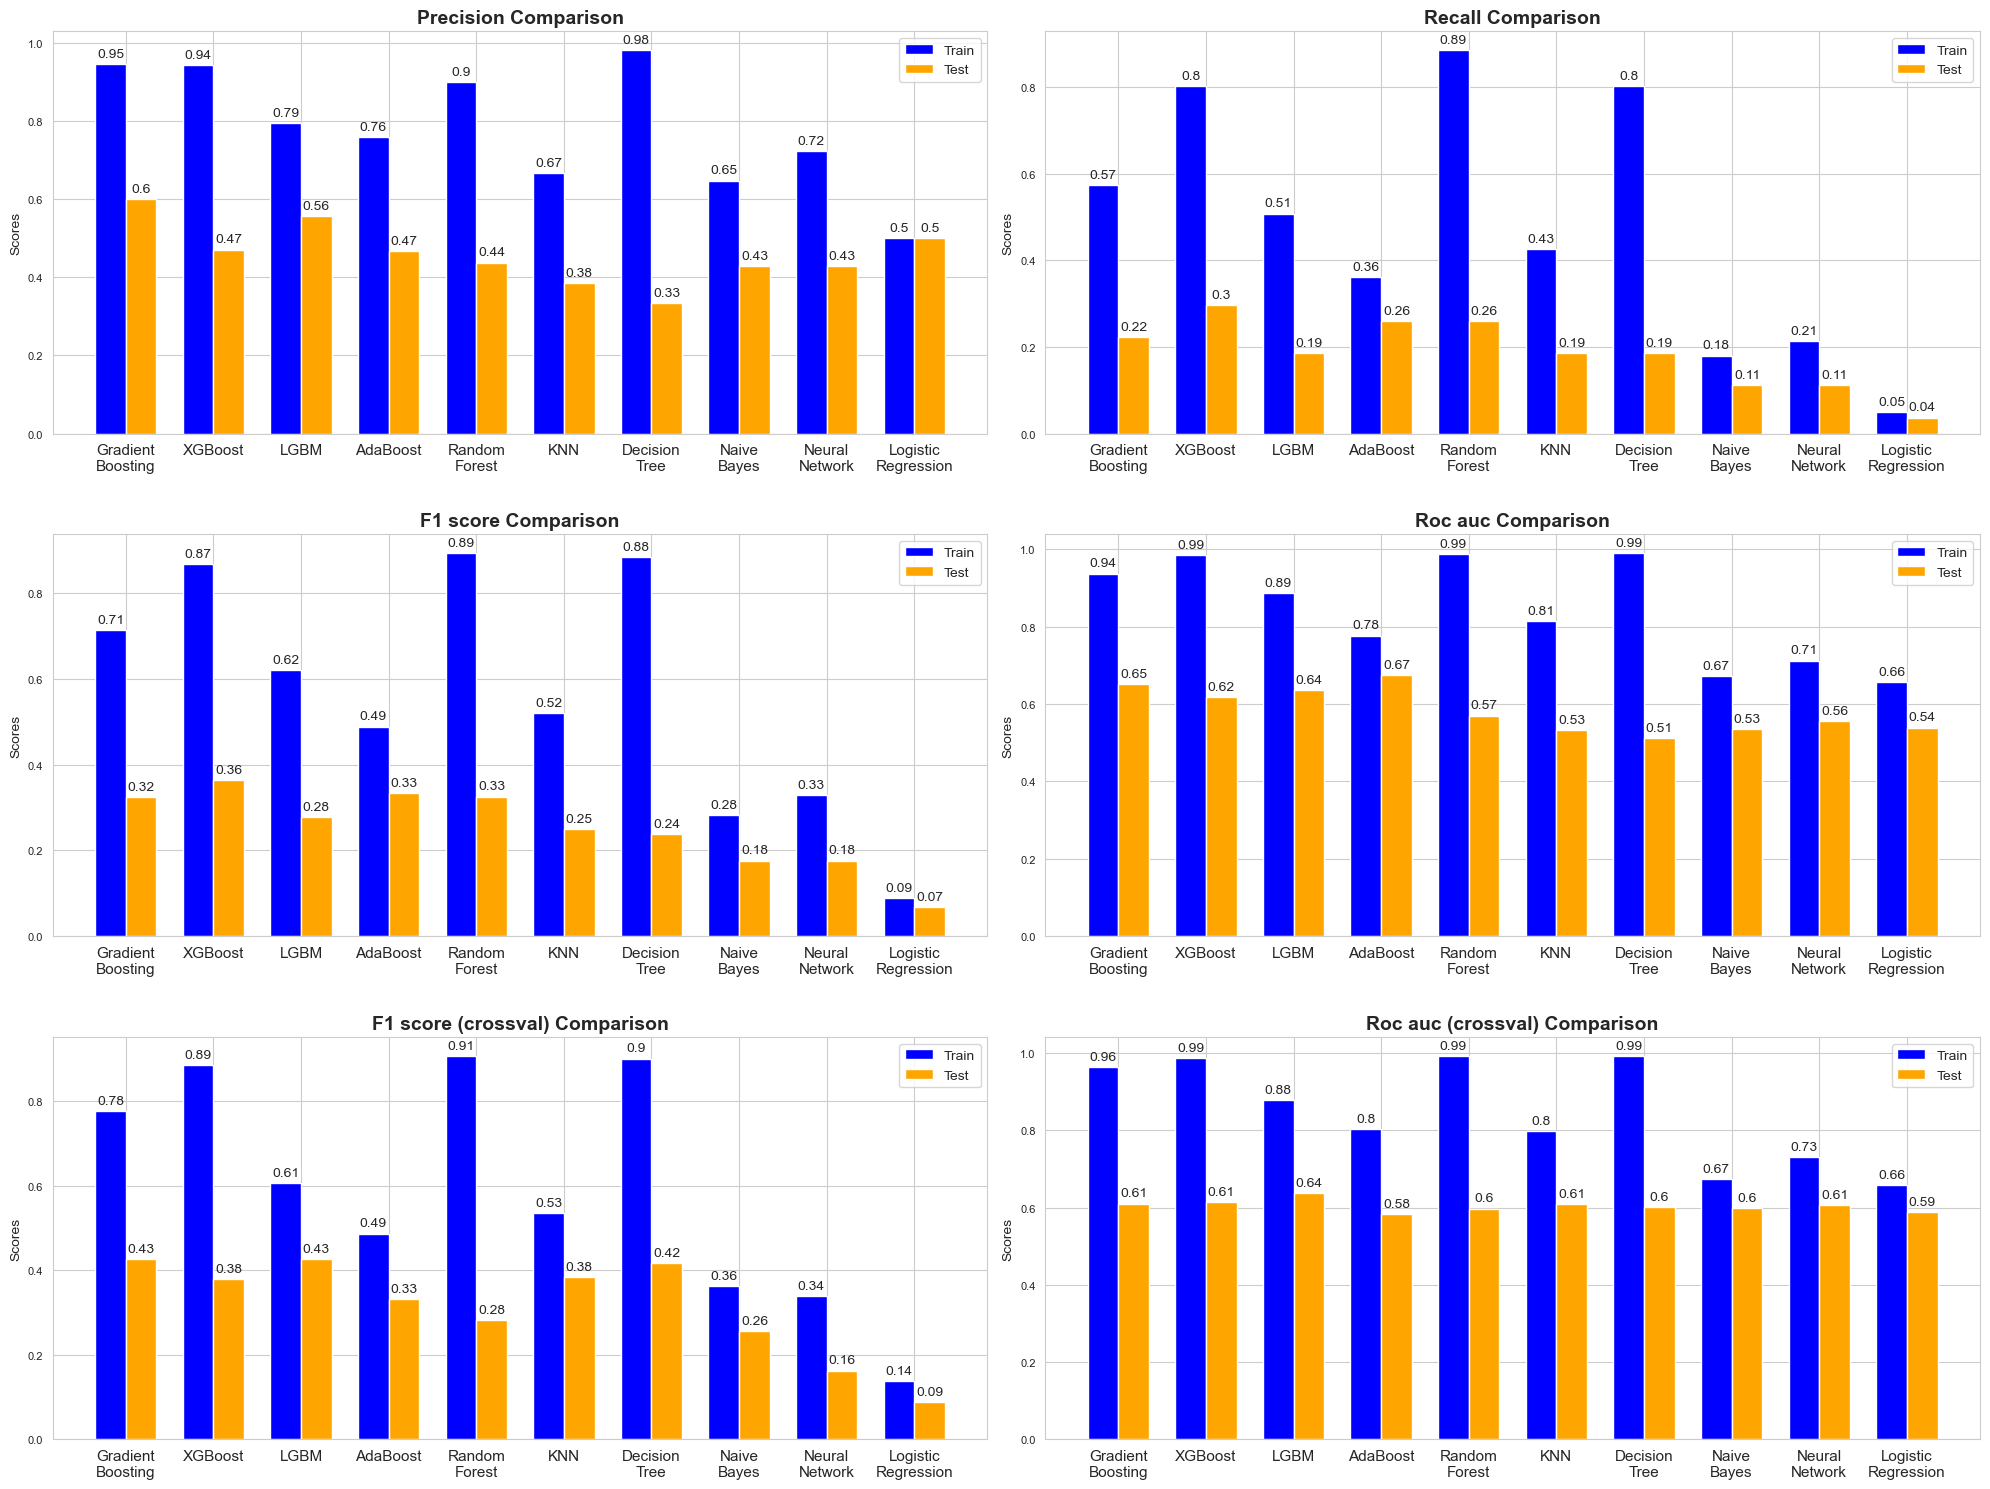

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_result = pivoted_df

# Calculate average testing performance for sorting
df_result['avg_test'] = df_result[['precision_test', 'recall_test', 'f1 score_test', 'roc auc_test', 
                                  'f1 score (crossval)_test', 'roc auc (crossval)_test']].mean(axis=1)
df_result = df_result.sort_values('avg_test', ascending=False)

labels = df_result['Classifier']
x = np.arange(len(labels))
width = 0.35  # Width of bars

fig, axs = plt.subplots(3, 2, figsize=(20, 15))

# Updated metrics for visualization
metrics = [
    'precision',
    'recall',
    'f1 score',
    'roc auc',
    'f1 score (crossval)',
    'roc auc (crossval)'
]

# Adjust labels to be two rows if they contain a space
labels = [label.replace(' ', '\n') if ' ' in label else label for label in labels]

for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    
    train_metric = metric + '_train'
    test_metric = metric + '_test'
    
    rects_train = ax.bar(x - width/2, df_result[train_metric], width, label=f'Train', color='blue')
    rects_test = ax.bar(x + width/2, df_result[test_metric], width, label=f'Test', color='orange')
    
    # Annotate bars
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height, 2)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10)
    
    autolabel(rects_train)
    autolabel(rects_test)
    
    ax.set_xlabel('')
    ax.set_ylabel('Scores')
    ax.set_title(f'{metric.capitalize()} Comparison', weight='bold', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=0, fontsize=11)  # Set rotation to 0
    ax.legend()

plt.tight_layout()
plt.subplots_adjust(hspace=0.25)
plt.show()

In [64]:
#X_train = X_train_encode
#X_test = X_test_encode
from sklearn.model_selection import StratifiedKFold, cross_validate

def eval_classification(model, model_name, X_train, X_test):
    y_pred_proba_train = model.predict_proba(X_train)
    y_predict_prob_class_1_train = y_pred_proba_train[:,1]
    y_pred_train = [1 if prob > 0.5 else 0 for prob in y_predict_prob_class_1_train]

    y_pred_proba_test = model.predict_proba(X_test)
    y_predict_prob_class_1_test = y_pred_proba_test[:,1]
    y_pred_test = [1 if prob > 0.5 else 0 for prob in y_predict_prob_class_1_test]

    stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    score_f1 = cross_validate(model, X_train, y_train, cv=stratified_kfold, scoring='f1', return_train_score=True)
    score_rocauc = cross_validate(model, X_train, y_train, cv=stratified_kfold, scoring='roc_auc', return_train_score=True)

    #score_f1 = cross_validate(model, X_train, y_train, cv=5, scoring='f1', return_train_score=True)
    #score_rocauc = cross_validate(model, X_train, y_train, cv=5, scoring='roc_auc', return_train_score=True)
    
    # Initialization
    results = {'Evaluation Metrics': [], 'Train': [], 'Test': []}

    # Train
    train_scores = [
        round(accuracy_score(y_train, y_pred_train),4),
        round(precision_score(y_train, y_pred_train),4),
        round(recall_score(y_train, y_pred_train),4),
        round(f1_score(y_train, y_pred_train),4),
        round(score_f1['train_score'].mean(),4),
        round(roc_auc_score(y_train, y_pred_proba_train[:, 1]),4),
        round(score_rocauc['train_score'].mean(),4)
    ]

    # Test    
    test_scores = [
        round(accuracy_score(y_test, y_pred_test), 4),
        round(precision_score(y_test, y_pred_test), 4),
        round(recall_score(y_test, y_pred_test), 4),
        round(f1_score(y_test, y_pred_test), 4),
        round(score_f1['test_score'].mean(), 4),
        round(roc_auc_score(y_test, y_pred_proba_test[:, 1]), 4),
        round(score_rocauc['test_score'].mean(), 4)
    ]

    # Metrics
    metrics = [
        'Accuracy', 
        'Precision', 
        'Recall', 
        'F1 Score',
        'F1 Score (crossval)', 
        'ROC AUC',
        'ROC AUC (crossval)'
    ]

    # Update results dictionary
    results['Evaluation Metrics'].extend(metrics)
    results['Train'].extend(train_scores)
    results['Test'].extend(test_scores)

    # Convert to DataFrame
    df_results = pd.DataFrame(results)
    # print('Model Evaluation in Training - Testing using '+model_name+':\n')
    return df_results

## Tuning Parameter

### Logistic regression

In [65]:
lr_tune = LogisticRegression()
lr_tune.fit(X_train, y_train)
lr1 = eval_classification(lr_tune, "Logistic Regression", X_train, X_test)
lr1

Evaluation Metrics   Train    Test
0             Accuracy  0.6904  0.6824
1            Precision  0.5000  0.5000
2               Recall  0.0492  0.0370
3             F1 Score  0.0896  0.0690
4  F1 Score (crossval)  0.2030  0.1541
5              ROC AUC  0.6578  0.5393
6   ROC AUC (crossval)  0.6744  0.5561

In [66]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define StratifiedKFold cross-validator
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=110)

# Hyperparameters
param_grid = {
    'C': [0.00001, 0.0001, 0.001, 0.01, 0.05, 0.06, 0.07, 0.1, 0.5, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced', None],
    'solver': ['saga', 'lbfgs', 'newton-cg','liblinear']
}

# GridSearchCV
lr = LogisticRegression(max_iter=5000)  # 'saga' is required for 'l1'
gs_lr = GridSearchCV(lr, param_grid, scoring='f1', cv=stratified_kfold)
gs_lr.fit(X_train, y_train)
best_lr = gs_lr.best_estimator_
print(best_lr)

# Evaluation
lr2 = eval_classification(best_lr, "Logistic Regression", X_train, X_test)
lr2

LogisticRegression(C=0.01, class_weight='balanced', max_iter=5000,
                   solver='liblinear')


Evaluation Metrics   Train    Test
0             Accuracy  0.5939  0.5647
1            Precision  0.3855  0.3438
2               Recall  0.5246  0.4074
3             F1 Score  0.4444  0.3729
4  F1 Score (crossval)  0.4494  0.4462
5              ROC AUC  0.6139  0.5463
6   ROC AUC (crossval)  0.6205  0.5965

### Naive bayes

In [67]:
nb_tune = GaussianNB()
nb_tune.fit(X_train, y_train)
nb1 = eval_classification(nb_tune, "Naive Bayes", X_train, X_test)
nb1

Evaluation Metrics   Train    Test
0             Accuracy  0.7157  0.6706
1            Precision  0.6471  0.4286
2               Recall  0.1803  0.1111
3             F1 Score  0.2821  0.1765
4  F1 Score (crossval)  0.3562  0.1818
5              ROC AUC  0.6721  0.5345
6   ROC AUC (crossval)  0.6729  0.5279

In [68]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipeline = Pipeline([
    ('classifier', GaussianNB())
])

param_grid = {
    'classifier__var_smoothing': np.logspace(-10, -3, num=500)  # More fine-tuning
}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  

scoring = {
    'F1_Score': 'f1',
    'Precision': 'precision',
    'Recall': 'recall'
}

grid_search = GridSearchCV(pipeline, param_grid, scoring=scoring, refit='F1_Score', cv=stratified_kfold, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

best_nb_model = grid_search.best_estimator_

nb2 = eval_classification(best_nb_model, "Naive Bayes", X_train, X_test)
nb2

Best parameters: {'classifier__var_smoothing': 0.0003673924781802074}


Evaluation Metrics   Train    Test
0             Accuracy  0.7157  0.6706
1            Precision  0.6471  0.4286
2               Recall  0.1803  0.1111
3             F1 Score  0.2821  0.1765
4  F1 Score (crossval)  0.3614  0.1680
5              ROC AUC  0.6720  0.5345
6   ROC AUC (crossval)  0.6731  0.5279

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

pipeline = Pipeline([
    ('classifier', GaussianNB())
])

param_dist = {
    'classifier__var_smoothing': uniform(1e-10, 1e-3)  # Using a uniform distribution for var_smoothing
}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'F1_Score': 'f1',
    'Precision': 'precision',
    'Recall': 'recall'
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, scoring=scoring, refit='F1_Score', cv=stratified_kfold, n_iter=50, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)

best_nb_model = random_search.best_estimator_

nb3 = eval_classification(best_nb_model, "Naive Bayes", X_train, X_test)
nb3

Best parameters: {'classifier__var_smoothing': 0.00037454021884736246}


Evaluation Metrics   Train    Test
0             Accuracy  0.7157  0.6706
1            Precision  0.6471  0.4286
2               Recall  0.1803  0.1111
3             F1 Score  0.2821  0.1765
4  F1 Score (crossval)  0.3614  0.1680
5              ROC AUC  0.6720  0.5345
6   ROC AUC (crossval)  0.6731  0.5279

### Gradient boosting

In [70]:
gb_tune = GradientBoostingClassifier()
gb_tune.fit(X_train, y_train)
gb1 = eval_classification(gb_tune, "Gradient Boosting", X_train, X_test)
gb1

Evaluation Metrics   Train    Test
0             Accuracy  0.8579  0.7059
1            Precision  0.9459  0.6000
2               Recall  0.5738  0.2222
3             F1 Score  0.7143  0.3243
4  F1 Score (crossval)  0.8071  0.3369
5              ROC AUC  0.9373  0.6523
6   ROC AUC (crossval)  0.9730  0.5781

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

gb_tune = GradientBoostingClassifier()

grid_search = GridSearchCV(gb_tune, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_gb = grid_search.best_estimator_
print(best_gb)

gb2 = eval_classification(best_gb, "Gradient Boosting", X_train, X_test)
gb2

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
GradientBoostingClassifier(learning_rate=0.05, max_depth=5, min_samples_split=6,
                           n_estimators=200)


Evaluation Metrics   Train    Test
0             Accuracy  0.9289  0.7059
1            Precision  0.9273  0.5625
2               Recall  0.8361  0.3333
3             F1 Score  0.8793  0.4186
4  F1 Score (crossval)  0.9189  0.3599
5              ROC AUC  0.9880  0.6082
6   ROC AUC (crossval)  0.9941  0.5857

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform, randint

param_dist = {
    'n_estimators': randint(50, 250),
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': randint(3, 8),
    'min_samples_split': randint(2, 7),
    'min_samples_leaf': randint(1, 5),
    'subsample': uniform(0.7, 0.3)  # will give values between 0.7 and 1.0
}

gb_tune = GradientBoostingClassifier()

random_search = RandomizedSearchCV(
    gb_tune,
    param_distributions=param_dist,
    n_iter=100,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)

best_gb = random_search.best_estimator_
print(best_gb)

gb3 = eval_classification(best_gb, "Gradient Boosting", X_train, X_test)
gb3

Fitting 5 folds for each of 100 candidates, totalling 500 fits
GradientBoostingClassifier(learning_rate=0.09641675650719031, max_depth=6,
                           min_samples_split=4, n_estimators=53,
                           subsample=0.7072947899294361)


Evaluation Metrics   Train    Test
0             Accuracy  0.9239  0.6588
1            Precision  0.9259  0.4167
2               Recall  0.8197  0.1852
3             F1 Score  0.8696  0.2564
4  F1 Score (crossval)  0.9215  0.3044
5              ROC AUC  0.9866  0.6248
6   ROC AUC (crossval)  0.9938  0.5971

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipeline = Pipeline([
    ('gb', GradientBoostingClassifier(random_state=42))
])

param_grid = {
    'gb__n_estimators': [50, 100, 150],
    'gb__learning_rate': [0.01, 0.05, 0.1],
    'gb__max_depth': [2, 3, 4],
    'gb__subsample': [0.7, 0.8, 0.9],
    'gb__subsample': [0.7, 0.8, 0.9],
    'gb__max_features': ['sqrt', 'log2', None]
}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(pipeline, param_grid, scoring='f1', cv=stratified_kfold, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

best_gb_model = grid_search.best_estimator_
print(best_gb)

gb4 = eval_classification(best_gb_model, "Gradient Boosting", X_train, X_test)
gb4

Best parameters: {'gb__learning_rate': 0.1, 'gb__max_depth': 2, 'gb__max_features': None, 'gb__n_estimators': 50, 'gb__subsample': 0.9}
GradientBoostingClassifier(learning_rate=0.09641675650719031, max_depth=6,
                           min_samples_split=4, n_estimators=53,
                           subsample=0.7072947899294361)


Evaluation Metrics   Train    Test
0             Accuracy  0.7817  0.6941
1            Precision  0.8214  0.5556
2               Recall  0.3770  0.1852
3             F1 Score  0.5169  0.2778
4  F1 Score (crossval)  0.6118  0.3533
5              ROC AUC  0.8168  0.6434
6   ROC AUC (crossval)  0.8682  0.6007

In [74]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,100,200,250,500],
    "max_depth":[7,8],
    "learning_rate":[100,150,200,250,300],
    "subsample": [0.7,0.75, 0.8, 0.85, 0.9]
}

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbc,parameters,cv=5, scoring='f1')
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [100, 150, 200, 250, 300],
                         'max_depth': [7, 8],
                         'n_estimators': [5, 50, 100, 200, 250, 500],
                         'subsample': [0.7, 0.75, 0.8, 0.85, 0.9]},
             scoring='f1')

In [75]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
        
display(cv)

Best parameters are: {'learning_rate': 150, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.9}


0.458 + or -0.092 for the {'learning_rate': 100, 'max_depth': 7, 'n_estimators': 5, 'subsample': 0.7}
0.393 + or -0.133 for the {'learning_rate': 100, 'max_depth': 7, 'n_estimators': 5, 'subsample': 0.75}
0.323 + or -0.07 for the {'learning_rate': 100, 'max_depth': 7, 'n_estimators': 5, 'subsample': 0.8}
0.366 + or -0.115 for the {'learning_rate': 100, 'max_depth': 7, 'n_estimators': 5, 'subsample': 0.85}
0.372 + or -0.15 for the {'learning_rate': 100, 'max_depth': 7, 'n_estimators': 5, 'subsample': 0.9}
0.382 + or -0.095 for the {'learning_rate': 100, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.7}
0.388 + or -0.059 for the {'learning_rate': 100, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.75}
0.368 + or -0.104 for the {'learning_rate': 100, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.8}
0.396 + or -0.068 for the {'learning_rate': 100, 'max_depth': 7, 'n_estimators':

In [76]:
gb_tune = GradientBoostingClassifier(learning_rate=100, max_depth=7, n_estimators=500, random_state=42)
gb_tune.fit(X_train, y_train)
gb5 = eval_classification(gb_tune, "Gradient Boosting", X_train, X_test)
gb5

Evaluation Metrics   Train    Test
0             Accuracy  0.8426  0.6471
1            Precision  0.7206  0.4211
2               Recall  0.8033  0.2963
3             F1 Score  0.7597  0.3478
4  F1 Score (crossval)  0.7575  0.4046
5              ROC AUC  0.7624  0.6181
6   ROC AUC (crossval)  0.7737  0.5802

In [77]:
gb_tune = GradientBoostingClassifier(learning_rate=200, max_depth=7, n_estimators=250, random_state=1234)
gb_tune.fit(X_train, y_train)
gb6 = eval_classification(gb_tune, "Gradient Boosting", X_train, X_test)
gb6

Evaluation Metrics   Train    Test
0             Accuracy  0.8579  0.6941
1            Precision  0.7538  0.5263
2               Recall  0.8033  0.3704
3             F1 Score  0.7778  0.4348
4  F1 Score (crossval)  0.7930  0.3597
5              ROC AUC  0.7907  0.7107
6   ROC AUC (crossval)  0.8575  0.5321

In [78]:
gb_tune = GradientBoostingClassifier(learning_rate=200, max_depth=7, n_estimators=250, random_state=0)
gb_tune.fit(X_train, y_train)
gb7 = eval_classification(gb_tune, "Gradient Boosting", X_train, X_test)
gb7

Evaluation Metrics   Train    Test
0             Accuracy  0.8426  0.6706
1            Precision  0.7027  0.4783
2               Recall  0.8525  0.4074
3             F1 Score  0.7704  0.4400
4  F1 Score (crossval)  0.7992  0.3820
5              ROC AUC  0.8057  0.6478
6   ROC AUC (crossval)  0.8524  0.5329

In [79]:
gb_tune = GradientBoostingClassifier(learning_rate=200, max_depth=8, n_estimators=250, subsample=0.9, random_state=1234)
gb_tune.fit(X_train, y_train)
gb8 = eval_classification(gb_tune, "Gradient Boosting", X_train, X_test)
gb8

Evaluation Metrics   Train    Test
0             Accuracy  0.8274  0.6824
1            Precision  0.7368  0.5000
2               Recall  0.6885  0.4074
3             F1 Score  0.7119  0.4490
4  F1 Score (crossval)  0.7893  0.3776
5              ROC AUC  0.7310  0.6373
6   ROC AUC (crossval)  0.8305  0.5499

In [80]:
gb_tune = GradientBoostingClassifier(learning_rate=200, max_depth=8, n_estimators=250, subsample=0.9, random_state=0)
gb_tune.fit(X_train, y_train)
gb9 = eval_classification(gb_tune, "Gradient Boosting", X_train, X_test)
gb9

Evaluation Metrics   Train    Test
0             Accuracy  0.8173  0.6471
1            Precision  0.6623  0.4444
2               Recall  0.8361  0.4444
3             F1 Score  0.7391  0.4444
4  F1 Score (crossval)  0.7622  0.4880
5              ROC AUC  0.8023  0.5632
6   ROC AUC (crossval)  0.8606  0.6421

In [81]:
gb_tune = GradientBoostingClassifier(learning_rate=300, max_depth=8, n_estimators=250, subsample=0.9, random_state=1234)
gb_tune.fit(X_train, y_train)
gb10 = eval_classification(gb_tune, "Gradient Boosting", X_train, X_test)
gb10

Evaluation Metrics   Train    Test
0             Accuracy  0.8274  0.6706
1            Precision  0.7547  0.4783
2               Recall  0.6557  0.4074
3             F1 Score  0.7018  0.4400
4  F1 Score (crossval)  0.8181  0.3916
5              ROC AUC  0.7346  0.6306
6   ROC AUC (crossval)  0.8980  0.5549

In [82]:
gb_tune = GradientBoostingClassifier(learning_rate=150, max_depth=7, n_estimators=250, subsample=0.9, random_state=0)
gb_tune.fit(X_train, y_train)
gb11 = eval_classification(gb_tune, "Gradient Boosting", X_train, X_test)
gb11

Evaluation Metrics   Train    Test
0             Accuracy  0.6345  0.5059
1            Precision  0.4466  0.3333
2               Recall  0.7541  0.5556
3             F1 Score  0.5610  0.4167
4  F1 Score (crossval)  0.6226  0.3917
5              ROC AUC  0.6272  0.5166
6   ROC AUC (crossval)  0.6891  0.5105

In [83]:
gb_tune = GradientBoostingClassifier(learning_rate=100, max_depth=7, n_estimators=100, subsample=0.9, random_state=0)
gb_tune.fit(X_train, y_train)
gb12 = eval_classification(gb_tune, "Gradient Boosting", X_train, X_test)
gb12

Evaluation Metrics   Train    Test
0             Accuracy  0.7360  0.4941
1            Precision  0.5421  0.3182
2               Recall  0.9508  0.5185
3             F1 Score  0.6905  0.3944
4  F1 Score (crossval)  0.5637  0.2795
5              ROC AUC  0.7282  0.4856
6   ROC AUC (crossval)  0.6255  0.5329

In [84]:
gb_tune = GradientBoostingClassifier(learning_rate=100, max_depth=7, n_estimators=100, subsample=0.9, random_state=1234)
gb_tune.fit(X_train, y_train)
gb13 = eval_classification(gb_tune, "Gradient Boosting", X_train, X_test)
gb13

Evaluation Metrics   Train    Test
0             Accuracy  0.6954  0.6471
1            Precision  0.5079  0.4400
2               Recall  0.5246  0.4074
3             F1 Score  0.5161  0.4231
4  F1 Score (crossval)  0.5970  0.3090
5              ROC AUC  0.6584  0.5709
6   ROC AUC (crossval)  0.6315  0.5294

In [85]:
gb_tune = GradientBoostingClassifier(learning_rate=100, max_depth=7, n_estimators=100, subsample=0.9, random_state=42)
gb_tune.fit(X_train, y_train)
gb14 = eval_classification(gb_tune, "Gradient Boosting", X_train, X_test)
gb14

Evaluation Metrics   Train    Test
0             Accuracy  0.6294  0.6235
1            Precision  0.4211  0.4194
2               Recall  0.5246  0.4815
3             F1 Score  0.4672  0.4483
4  F1 Score (crossval)  0.5940  0.3871
5              ROC AUC  0.5797  0.5600
6   ROC AUC (crossval)  0.6131  0.4966

In [86]:
gb_tune = GradientBoostingClassifier(learning_rate=300, max_depth=7, n_estimators=50, subsample=0.9, random_state=1234)
gb_tune.fit(X_train, y_train)
gb15 = eval_classification(gb_tune, "Gradient Boosting", X_train, X_test)
gb15

Evaluation Metrics   Train    Test
0             Accuracy  0.7665  0.6706
1            Precision  0.6415  0.4667
2               Recall  0.5574  0.2593
3             F1 Score  0.5965  0.3333
4  F1 Score (crossval)  0.7758  0.3515
5              ROC AUC  0.6991  0.5546
6   ROC AUC (crossval)  0.8741  0.5227

### AdaBoost

In [87]:
ab_tune = AdaBoostClassifier(random_state=42)
ab_tune.fit(X_train, y_train)
ab1= eval_classification(ab_tune, "AdaBoost", X_train, X_test)
ab1

Evaluation Metrics   Train    Test
0             Accuracy  0.7665  0.6706
1            Precision  0.7586  0.4667
2               Recall  0.3607  0.2593
3             F1 Score  0.4889  0.3333
4  F1 Score (crossval)  0.5200  0.2368
5              ROC AUC  0.7768  0.6746
6   ROC AUC (crossval)  0.8284  0.5323

In [88]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()

parameters = {
    "n_estimators": [5, 50, 100, 200, 250, 300, 400, 500],
    "learning_rate": [0.01, 0.1, 1, 10, 100],
}

cv = GridSearchCV(abc, parameters, cv=5, scoring='f1')
cv.fit(X_train, y_train)

def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean, std, params in zip(mean_score, std_score, params):
        print(f'{round(mean, 3)} + or -{round(std, 3)} for the {params}')

display(cv)

Best parameters are: {'learning_rate': 100, 'n_estimators': 5}


0.0 + or -0.0 for the {'learning_rate': 0.01, 'n_estimators': 5}
0.05 + or -0.1 for the {'learning_rate': 0.01, 'n_estimators': 50}
0.05 + or -0.1 for the {'learning_rate': 0.01, 'n_estimators': 100}
0.079 + or -0.102 for the {'learning_rate': 0.01, 'n_estimators': 200}
0.079 + or -0.102 for the {'learning_rate': 0.01, 'n_estimators': 250}
0.097 + or -0.119 for the {'learning_rate': 0.01, 'n_estimators': 300}
0.197 + or -0.145 for the {'learning_rate': 0.01, 'n_estimators': 400}
0.197 + or -0.145 for the {'learning_rate': 0.01, 'n_estimators': 500}
0.05 + or -0.1 for the {'learning_rate': 0.1, 'n_estimators': 5}
0.197 + or -0.145 for the {'learning_rate': 0.1, 'n_estimators': 50}
0.246 + or -0.143 for the {'learning_rate': 0.1, 'n_estimators': 100}
0.292 + or -0.119 for the {'learning_rate': 0.1, 'n_estimators': 200}
0.292 + or -0.119 for the {'learning_rate': 0.1, 'n_estimators': 250}
0.307 + or -0.112 for the {'learning

In [89]:
ab_tune = AdaBoostClassifier(random_state=1234, learning_rate=100, n_estimators=5)
ab_tune.fit(X_train, y_train)
ab2 = eval_classification(ab_tune, "AdaBoost", X_train, X_test)
ab2

Evaluation Metrics   Train    Test
0             Accuracy  0.3553  0.3882
1            Precision  0.2537  0.2881
2               Recall  0.5574  0.6296
3             F1 Score  0.3487  0.3953
4  F1 Score (crossval)  0.3420  0.4397
5              ROC AUC  0.4110  0.4527
6   ROC AUC (crossval)  0.3899  0.4981

In [90]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import uniform, randint

param_dist = {
    'base_estimator__max_depth': randint(1, 4),   # Depth for the base estimator
    'n_estimators': randint(30, 100),
    'learning_rate': uniform(0.5, 1.5)   # Adjusting learning rate range
}

base_tree = DecisionTreeClassifier()

ab_tune = AdaBoostClassifier(base_estimator=base_tree, random_state=42)

random_search = RandomizedSearchCV(
    ab_tune,
    param_distributions=param_dist,
    n_iter=100,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)

best_ab = random_search.best_estimator_
print(best_ab)

ab3 = eval_classification(best_ab, "AdaBoost", X_train, X_test)
ab3

Fitting 5 folds for each of 100 candidates, totalling 500 fits
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.5210581773321503, n_estimators=82,
                   random_state=42)


Evaluation Metrics   Train    Test
0             Accuracy  0.9340  0.6706
1            Precision  0.9138  0.4706
2               Recall  0.8689  0.2963
3             F1 Score  0.8908  0.3636
4  F1 Score (crossval)  0.9214  0.2667
5              ROC AUC  0.9897  0.5993
6   ROC AUC (crossval)  0.9943  0.5569

In [91]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import uniform, randint

param_dist = {
    'base_estimator__max_depth': randint(1, 4),
    'base_estimator__min_samples_split': randint(2, 10),
    'base_estimator__min_samples_leaf': randint(1, 5),
    'base_estimator__max_features': ['sqrt', 'log2', None],
    'n_estimators': randint(30, 150),
    'learning_rate': uniform(0.01, 2)   # Extending the learning rate range
}

base_tree = DecisionTreeClassifier()

ab_tune = AdaBoostClassifier(base_estimator=base_tree, random_state=1234)

random_search = RandomizedSearchCV(
    ab_tune,
    param_distributions=param_dist,
    n_iter=100,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)

best_ab = random_search.best_estimator_
print(best_ab)

ab4 = eval_classification(best_ab, "AdaBoost", X_train, X_test)
ab4

Fitting 5 folds for each of 100 candidates, totalling 500 fits
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         max_features='log2',
                                                         min_samples_split=3),
                   learning_rate=1.882309548321562, n_estimators=87,
                   random_state=1234)


Evaluation Metrics   Train    Test
0             Accuracy  0.9340  0.6941
1            Precision  0.8871  0.5238
2               Recall  0.9016  0.4074
3             F1 Score  0.8943  0.4583
4  F1 Score (crossval)  0.9222  0.3065
5              ROC AUC  0.9896  0.6178
6   ROC AUC (crossval)  0.9943  0.5961

In [92]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import uniform, randint

param_dist = {
    'base_estimator__max_depth': randint(1, 4),
    'base_estimator__min_samples_split': randint(2, 10),
    'base_estimator__min_samples_leaf': randint(1, 5),
    'base_estimator__max_features': ['log2'],
    'n_estimators': randint(30, 200),
    'learning_rate': uniform(0.01, 3)   # Extending the learning rate range
}

base_tree = DecisionTreeClassifier()

ab_tune = AdaBoostClassifier(base_estimator=base_tree, random_state=1234)

random_search = RandomizedSearchCV(
    ab_tune,
    param_distributions=param_dist,
    n_iter=100,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)

best_ab = random_search.best_estimator_
print(best_ab)

ab5 = eval_classification(best_ab, "AdaBoost", X_train, X_test)
ab5

Fitting 5 folds for each of 100 candidates, totalling 500 fits
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         max_features='log2',
                                                         min_samples_leaf=4,
                                                         min_samples_split=7),
                   learning_rate=2.435192044349383, n_estimators=38,
                   random_state=1234)


Evaluation Metrics   Train    Test
0             Accuracy  0.3756  0.4235
1            Precision  0.3297  0.3553
2               Recall  0.9836  1.0000
3             F1 Score  0.4938  0.5243
4  F1 Score (crossval)  0.4840  0.4681
5              ROC AUC  0.7034  0.6702
6   ROC AUC (crossval)  0.6418  0.5455

In [93]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import uniform, randint

# Define the parameter distribution
param_dist = {
    'base_estimator__max_depth': randint(1, 4),
    'base_estimator__min_samples_split': randint(2, 10),
    'base_estimator__min_samples_leaf': randint(1, 5),
    'base_estimator__max_features': ['log2'],
    'n_estimators': randint(5, 300),
    'learning_rate': uniform(0.01, 3)  
}

base_tree = DecisionTreeClassifier()

ab_tune = AdaBoostClassifier(base_estimator=base_tree, random_state=1234)

random_search = RandomizedSearchCV(
    ab_tune,
    param_distributions=param_dist,
    n_iter=100,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)

best_ab = random_search.best_estimator_
print(best_ab)

ab6 = eval_classification(best_ab, "AdaBoost", X_train, X_test)
ab6

Fitting 5 folds for each of 100 candidates, totalling 500 fits
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         max_features='log2',
                                                         min_samples_leaf=3,
                                                         min_samples_split=3),
                   learning_rate=2.8566566117599996, n_estimators=18,
                   random_state=1234)


Evaluation Metrics   Train    Test
0             Accuracy  0.3350  0.3294
1            Precision  0.3177  0.3214
2               Recall  1.0000  1.0000
3             F1 Score  0.4822  0.4865
4  F1 Score (crossval)  0.4803  0.4766
5              ROC AUC  0.6521  0.5147
6   ROC AUC (crossval)  0.6680  0.5247

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import uniform, randint

param_dist = {
    'base_estimator__max_depth': randint(1, 4),
    'base_estimator__min_samples_split': randint(2, 10),
    'base_estimator__min_samples_leaf': randint(1, 5),
    'base_estimator__max_features': ['log2'],
    'n_estimators': randint(5, 300),
    'learning_rate': uniform(0.001, 3)   # Extending the learning rate range
}

base_tree = DecisionTreeClassifier()

ab_tune = AdaBoostClassifier(base_estimator=base_tree, random_state=1234)

random_search = RandomizedSearchCV(
    ab_tune,
    param_distributions=param_dist,
    n_iter=100,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)

best_ab = random_search.best_estimator_
print(best_ab)

ab7 = eval_classification(best_ab, "AdaBoost", X_train, X_test)
ab7

Fitting 5 folds for each of 100 candidates, totalling 500 fits
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         max_features='log2',
                                                         min_samples_split=6),
                   learning_rate=2.615381770563153, n_estimators=32,
                   random_state=1234)


Evaluation Metrics   Train    Test
0             Accuracy  0.4518  0.4118
1            Precision  0.3609  0.3380
2               Recall  1.0000  0.8889
3             F1 Score  0.5304  0.4898
4  F1 Score (crossval)  0.4790  0.3157
5              ROC AUC  0.7841  0.6156
6   ROC AUC (crossval)  0.7253  0.5193

### Random Forest

In [95]:
rf_tune = RandomForestClassifier(random_state=42)
rf_tune.fit(X_train, y_train)
rf1 = eval_classification(rf_tune, "Random Forest", X_train, X_test)
rf1

Evaluation Metrics   Train    Test
0             Accuracy  0.9340  0.6588
1            Precision  0.9000  0.4375
2               Recall  0.8852  0.2593
3             F1 Score  0.8926  0.3256
4  F1 Score (crossval)  0.9183  0.3337
5              ROC AUC  0.9880  0.5702
6   ROC AUC (crossval)  0.9940  0.5974

In [96]:
# tuning hyperparameter RF
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 20)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

best_rf = RandomForestClassifier(random_state=99)
best_rf = RandomizedSearchCV(best_rf, hyperparameters, scoring='f1', random_state=99, cv=stratified_kfold)
best_rf.fit(X_train, y_train)
print(best_rf)

rf2 = eval_classification(best_rf, "Random Forest", X_train, X_test)
rf2

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=99),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20, 22, 24, 26,
                                                      28, 30, 32, 34, 36, 38,
                                                      40, 42, 44, 46, 48, 50,
                                                      52, 54, 56, 58, 60, ...],
                                        'min_samples_leaf': [2, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20],
                                        'min_samples_split': [2, 4

Evaluation Metrics   Train    Test
0             Accuracy  0.8274  0.6941
1            Precision  0.9355  0.6000
2               Recall  0.4754  0.1111
3             F1 Score  0.6304  0.1875
4  F1 Score (crossval)  0.5838  0.2547
5              ROC AUC  0.9201  0.5967
6   ROC AUC (crossval)  0.9185  0.6095

In [97]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(50, 300),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=100,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_
print(best_rf)

rf3 = eval_classification(best_rf, "Random Forest", X_train, X_test)
rf3

Fitting 5 folds for each of 100 candidates, totalling 500 fits
RandomForestClassifier(class_weight='balanced_subsample', max_depth=4,
                       max_features=None, min_samples_leaf=12,
                       min_samples_split=7, n_estimators=179, random_state=42)


Evaluation Metrics   Train    Test
0             Accuracy  0.7310  0.6118
1            Precision  0.5556  0.3750
2               Recall  0.6557  0.3333
3             F1 Score  0.6015  0.3529
4  F1 Score (crossval)  0.5860  0.4050
5              ROC AUC  0.7880  0.6676
6   ROC AUC (crossval)  0.7658  0.5717

In [98]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(5, 300),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False],
    'class_weight': ['balanced']
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=100,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_
print(best_rf)

rf4 = eval_classification(best_rf, "Random Forest", X_train, X_test)
rf4

Fitting 5 folds for each of 100 candidates, totalling 500 fits
RandomForestClassifier(class_weight='balanced', max_depth=12, max_features=None,
                       min_samples_leaf=15, min_samples_split=10,
                       n_estimators=184, random_state=42)


Evaluation Metrics   Train    Test
0             Accuracy  0.7208  0.6471
1            Precision  0.5405  0.4444
2               Recall  0.6557  0.4444
3             F1 Score  0.5926  0.4444
4  F1 Score (crossval)  0.5757  0.4207
5              ROC AUC  0.7665  0.6600
6   ROC AUC (crossval)  0.7381  0.5735

In [99]:
param_dist_refined = {
    'n_estimators': randint(150, 220),
    'max_features': ['auto', 'sqrt', 'log2', 0.7, 0.8, 0.9, None],
    'max_depth': randint(8, 16),
    'min_samples_split': randint(8, 14),
    'min_samples_leaf': randint(12, 18),
    'bootstrap': [True, False],
    'class_weight': ['balanced']
}

random_search_refined = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist_refined,
    n_iter=100,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_refined.fit(X_train, y_train)

best_rf_refined = random_search_refined.best_estimator_
print(best_rf_refined)

rf5 = eval_classification(best_rf_refined, "Random Forest", X_train, X_test)
rf5

Fitting 5 folds for each of 100 candidates, totalling 500 fits
RandomForestClassifier(class_weight='balanced', max_depth=13, max_features=None,
                       min_samples_leaf=16, min_samples_split=9,
                       n_estimators=175, random_state=42)


Evaluation Metrics   Train    Test
0             Accuracy  0.6954  0.6471
1            Precision  0.5063  0.4483
2               Recall  0.6557  0.4815
3             F1 Score  0.5714  0.4643
4  F1 Score (crossval)  0.5660  0.4183
5              ROC AUC  0.7560  0.6574
6   ROC AUC (crossval)  0.7298  0.5833

In [100]:
param_dist_further_refined = {
    'n_estimators': randint(160, 190),
    'max_features': ['auto', 'sqrt', 'log2', 0.6, 0.7, 0.8, None],
    'max_depth': randint(11, 15),
    'min_samples_split': randint(7, 12),
    'min_samples_leaf': randint(14, 18),
    'bootstrap': [True, False],
    'class_weight': ['balanced']
}

random_search_further_refined = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist_further_refined,
    n_iter=100,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_further_refined.fit(X_train, y_train)

best_rf_further_refined = random_search_further_refined.best_estimator_
print(best_rf_further_refined)

rf6 = eval_classification(best_rf_further_refined, "Random Forest", X_train, X_test)
rf6

Fitting 5 folds for each of 100 candidates, totalling 500 fits
RandomForestClassifier(class_weight='balanced', max_depth=14, max_features=None,
                       min_samples_leaf=15, min_samples_split=7,
                       n_estimators=170, random_state=42)


Evaluation Metrics   Train    Test
0             Accuracy  0.7208  0.6353
1            Precision  0.5405  0.4286
2               Recall  0.6557  0.4444
3             F1 Score  0.5926  0.4364
4  F1 Score (crossval)  0.5690  0.4207
5              ROC AUC  0.7671  0.6561
6   ROC AUC (crossval)  0.7360  0.5764

### Decision Tree

In [101]:
dt_tune = DecisionTreeClassifier(random_state=42)
dt_tune.fit(X_train, y_train)
dt1 = eval_classification(dt_tune, "Decision Tree", X_train, X_test)
dt1

Evaluation Metrics   Train    Test
0             Accuracy  0.9340  0.6235
1            Precision  0.9800  0.3333
2               Recall  0.8033  0.1852
3             F1 Score  0.8829  0.2381
4  F1 Score (crossval)  0.9154  0.3848
5              ROC AUC  0.9897  0.5128
6   ROC AUC (crossval)  0.9943  0.5926

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipeline = Pipeline([
    ('dt', DecisionTreeClassifier(random_state=42))
])

param_grid = {
    'dt__criterion': ['gini', 'entropy'],
    'dt__max_depth': [None, 5, 10, 15, 20, 25],
    'dt__min_samples_split': [2, 5, 10, 20],
    'dt__min_samples_leaf': [1, 2, 5, 10],
    'dt__class_weight': ['balanced', None],
    'dt__max_features': ['auto', 'sqrt', 'log2', None]
}

stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(pipeline, param_grid, scoring='f1', cv=stratified_kfold, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

best_dt_model = grid_search.best_estimator_

dt2 = eval_classification(best_dt_model, "Decision Tree", X_train, X_test)
dt2

Best parameters: {'dt__class_weight': 'balanced', 'dt__criterion': 'gini', 'dt__max_depth': None, 'dt__max_features': 'sqrt', 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 5}


Evaluation Metrics   Train    Test
0             Accuracy  0.8477  0.6118
1            Precision  0.6824  0.4000
2               Recall  0.9508  0.4444
3             F1 Score  0.7945  0.4211
4  F1 Score (crossval)  0.7837  0.5146
5              ROC AUC  0.9509  0.5249
6   ROC AUC (crossval)  0.9488  0.6138

In [103]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint, uniform

param_dist = {
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': ['balanced', None]
}

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=100,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

best_dt = random_search.best_estimator_
print(best_dt)

dt3 = eval_classification(best_dt, "Decision Tree", X_train, X_test)
dt3

Fitting 5 folds for each of 100 candidates, totalling 500 fits
DecisionTreeClassifier(class_weight='balanced', max_depth=16,
                       max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=13, random_state=42)


Evaluation Metrics   Train    Test
0             Accuracy  0.6142  0.4824
1            Precision  0.4312  0.3023
2               Recall  0.7705  0.4815
3             F1 Score  0.5529  0.3714
4  F1 Score (crossval)  0.5778  0.5153
5              ROC AUC  0.7023  0.4927
6   ROC AUC (crossval)  0.7450  0.6260

In [104]:
param_dist_refined = {
    'max_depth': randint(12, 20),
    'min_samples_split': randint(10, 17),
    'min_samples_leaf': randint(3, 8),
    'max_features': ['sqrt', 0.5, 0.6, 0.7, None],
    'class_weight': ['balanced']
}

random_search_refined = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist_refined,
    n_iter=100,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_refined.fit(X_train, y_train)

best_dt_refined = random_search_refined.best_estimator_
print(best_dt_refined)

dt4 = eval_classification(best_dt_refined, "Decision Tree", X_train, X_test)
dt4

Fitting 5 folds for each of 100 candidates, totalling 500 fits
DecisionTreeClassifier(class_weight='balanced', max_depth=18, max_features=0.7,
                       min_samples_leaf=3, min_samples_split=15,
                       random_state=42)


Evaluation Metrics   Train    Test
0             Accuracy  0.7817  0.6588
1            Precision  0.6125  0.4643
2               Recall  0.8033  0.4815
3             F1 Score  0.6950  0.4727
4  F1 Score (crossval)  0.6548  0.4668
5              ROC AUC  0.8704  0.6539
6   ROC AUC (crossval)  0.8392  0.5926

In [105]:
param_dist_even_more_refined = {
    'max_depth': randint(16, 21),
    'min_samples_split': randint(13, 18),
    'min_samples_leaf': randint(2, 5),
    'max_features': [0.65, 0.7, 0.75],
    'class_weight': ['balanced']
}

random_search_even_more_refined = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist_even_more_refined,
    n_iter=100,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_even_more_refined.fit(X_train, y_train)

best_dt_even_more_refined = random_search_even_more_refined.best_estimator_
print(best_dt_even_more_refined)

dt5 = eval_classification(best_dt_even_more_refined, "Decision Tree", X_train, X_test)
dt5

Fitting 5 folds for each of 100 candidates, totalling 500 fits
DecisionTreeClassifier(class_weight='balanced', max_depth=19, max_features=0.65,
                       min_samples_leaf=3, min_samples_split=17,
                       random_state=42)


Evaluation Metrics   Train    Test
0             Accuracy  0.6802  0.6235
1            Precision  0.4907  0.4324
2               Recall  0.8689  0.5926
3             F1 Score  0.6272  0.5000
4  F1 Score (crossval)  0.6495  0.4396
5              ROC AUC  0.8130  0.6133
6   ROC AUC (crossval)  0.8325  0.5657

In [106]:
param_dist_more_refined = {
    'max_depth': randint(16, 19),
    'min_samples_split': randint(15, 20),
    'min_samples_leaf': randint(2, 5),
    'max_features': [0.60, 0.65, 0.70],
    'class_weight': ['balanced']
}

random_search_more_refined = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist_more_refined,
    n_iter=100,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_more_refined.fit(X_train, y_train)

best_dt_more_refined = random_search_more_refined.best_estimator_
print(best_dt_more_refined)

dt6 = eval_classification(best_dt_more_refined, "Decision Tree", X_train, X_test)
dt6

Fitting 5 folds for each of 100 candidates, totalling 500 fits
DecisionTreeClassifier(class_weight='balanced', max_depth=17, max_features=0.65,
                       min_samples_leaf=3, min_samples_split=18,
                       random_state=42)


Evaluation Metrics   Train    Test
0             Accuracy  0.6802  0.6235
1            Precision  0.4907  0.4324
2               Recall  0.8689  0.5926
3             F1 Score  0.6272  0.5000
4  F1 Score (crossval)  0.6438  0.4304
5              ROC AUC  0.8130  0.6133
6   ROC AUC (crossval)  0.8242  0.5604

In [107]:
param_dist_new = {
    'max_depth': randint(10, 18),  # Expanded for potentially shallower trees
    'min_samples_split': randint(10, 20),
    'min_samples_leaf': randint(2, 10),  # Expanded for more regularization
    'max_features': [0.60, 0.65, 0.70, 'auto'],
    'class_weight': ['balanced'],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

random_search_new = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist_new,
    n_iter=100,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_new.fit(X_train, y_train)

best_dt_new = random_search_new.best_estimator_
print(best_dt_new)

dt7 = eval_classification(best_dt_new, "Decision Tree", X_train, X_test)
dt7

Fitting 5 folds for each of 100 candidates, totalling 500 fits
DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_features=0.7,
                       min_samples_leaf=3, min_samples_split=17,
                       random_state=42)


Evaluation Metrics   Train    Test
0             Accuracy  0.6802  0.6235
1            Precision  0.4907  0.4324
2               Recall  0.8689  0.5926
3             F1 Score  0.6272  0.5000
4  F1 Score (crossval)  0.6495  0.4396
5              ROC AUC  0.8130  0.6133
6   ROC AUC (crossval)  0.8325  0.5657

### KNN

In [108]:
knn_tune = KNeighborsClassifier()
knn_tune.fit(X_train, y_train)
knn1 = eval_classification(knn_tune, "K-Nearest Neighbors", X_train, X_test)
knn1

Evaluation Metrics   Train    Test
0             Accuracy  0.7563  0.6471
1            Precision  0.6667  0.3846
2               Recall  0.4262  0.1852
3             F1 Score  0.5200  0.2500
4  F1 Score (crossval)  0.5116  0.4042
5              ROC AUC  0.8142  0.5326
6   ROC AUC (crossval)  0.8027  0.6095

In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15],  # Typical choices
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
    'knn__p': [1, 2]  # 1 is manhattan_distance (l1), and 2 is euclidean_distance (l2).
}

stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(pipeline, param_grid, scoring='f1', cv=stratified_kfold, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

best_knn_model = grid_search.best_estimator_
knn2 = eval_classification(best_knn_model, "K-Nearest Neighbors", X_train, X_test)
knn2

Best parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'uniform'}


Evaluation Metrics   Train    Test
0             Accuracy  0.8020  0.6000
1            Precision  0.7292  0.3158
2               Recall  0.5738  0.2222
3             F1 Score  0.6422  0.2609
4  F1 Score (crossval)  0.6309  0.4104
5              ROC AUC  0.8613  0.4652
6   ROC AUC (crossval)  0.8535  0.5975

In [110]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint

param_dist_knn = {
    'n_neighbors': randint(1, 50),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2, 3]  # Parameter for the Minkowski distance. Only used when metric='minkowski'
}

random_search_knn = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_dist_knn,
    n_iter=100,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_knn.fit(X_train, y_train)

best_knn = random_search_knn.best_estimator_
print(best_knn)

knn3 = eval_classification(best_knn, "K-Nearest Neighbors", X_train, X_test)
knn3

Fitting 5 folds for each of 100 candidates, totalling 500 fits
KNeighborsClassifier(n_neighbors=3, p=1)


Evaluation Metrics   Train    Test
0             Accuracy  0.8020  0.6000
1            Precision  0.7200  0.2941
2               Recall  0.5902  0.1852
3             F1 Score  0.6486  0.2273
4  F1 Score (crossval)  0.6100  0.4113
5              ROC AUC  0.8717  0.5102
6   ROC AUC (crossval)  0.8487  0.5974

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_dist_knn_broader = {
    'n_neighbors': randint(5, 50),  # Broader range
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

random_search_knn_broader = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_dist_knn_broader,
    n_iter=100,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_knn_broader.fit(X_train_scaled, y_train)

best_knn_broader = random_search_knn_broader.best_estimator_
print(best_knn_broader)

knn4 = eval_classification(best_knn_broader, "K-Nearest Neighbors", X_train_scaled, X_test_scaled)
knn4

Fitting 5 folds for each of 100 candidates, totalling 500 fits
KNeighborsClassifier(metric='euclidean', p=1)


Evaluation Metrics   Train    Test
0             Accuracy  0.7513  0.6235
1            Precision  0.6429  0.3333
2               Recall  0.4426  0.1852
3             F1 Score  0.5243  0.2381
4  F1 Score (crossval)  0.5066  0.3359
5              ROC AUC  0.8144  0.4952
6   ROC AUC (crossval)  0.7941  0.5732

In [112]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_dist_knn_further = {
    'n_neighbors': randint(10, 70),  # Even broader range
    'weights': ['distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

random_search_knn_further = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_dist_knn_further,
    n_iter=100,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_knn_further.fit(X_train_scaled, y_train)

best_knn_further = random_search_knn_further.best_estimator_
print(best_knn_further)

knn5 = eval_classification(best_knn_further, "K-Nearest Neighbors", X_train_scaled, X_test_scaled)
knn5

Fitting 5 folds for each of 100 candidates, totalling 500 fits
KNeighborsClassifier(metric='manhattan', n_neighbors=16, weights='distance')


Evaluation Metrics   Train    Test
0             Accuracy  0.9340  0.6353
1            Precision  0.9800  0.3000
2               Recall  0.8033  0.1111
3             F1 Score  0.8829  0.1622
4  F1 Score (crossval)  0.9154  0.2751
5              ROC AUC  0.9897  0.4895
6   ROC AUC (crossval)  0.9943  0.5883

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid_knn = {
    'n_neighbors': list(range(5, 50, 5)),  # Explore every 5 neighbors from 5 to 50
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search_knn.fit(X_train_scaled, y_train)

best_knn_grid = grid_search_knn.best_estimator_
print(best_knn_grid)

knn6 = eval_classification(best_knn_grid, "K-Nearest Neighbors", X_train_scaled, X_test_scaled)
knn6

Fitting 5 folds for each of 36 candidates, totalling 180 fits
KNeighborsClassifier(metric='manhattan')


Evaluation Metrics   Train    Test
0             Accuracy  0.7665  0.6118
1            Precision  0.6923  0.3125
2               Recall  0.4426  0.1852
3             F1 Score  0.5400  0.2326
4  F1 Score (crossval)  0.4789  0.3569
5              ROC AUC  0.8199  0.5109
6   ROC AUC (crossval)  0.8028  0.5729

### LGBM

In [114]:
lgbm_tune = LGBMClassifier(random_state=42, verbose=-1)
lgbm_tune.fit(X_train, y_train)
lgbm1 = eval_classification(lgbm_tune, "LGBM", X_train, X_test)
lgbm1

Evaluation Metrics   Train    Test
0             Accuracy  0.8071  0.6941
1            Precision  0.7949  0.5556
2               Recall  0.5082  0.1852
3             F1 Score  0.6200  0.2778
4  F1 Score (crossval)  0.5709  0.2925
5              ROC AUC  0.8868  0.6351
6   ROC AUC (crossval)  0.8545  0.5884

In [115]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
from scipy.stats import randint, uniform

param_dist_lgbm = {
    'num_leaves': randint(20, 150),
    'max_depth': randint(5, 30),
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(50, 500),
    'min_child_samples': randint(20, 200),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}

random_search_lgbm = RandomizedSearchCV(
    LGBMClassifier(random_state=42, verbose=-1),
    param_distributions=param_dist_lgbm,
    n_iter=100,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_lgbm.fit(X_train, y_train)

best_lgbm = random_search_lgbm.best_estimator_
print(best_lgbm)

lgbm2 = eval_classification(best_lgbm, "LGBM", X_train, X_test)
lgbm2

Fitting 5 folds for each of 100 candidates, totalling 500 fits
LGBMClassifier(colsample_bytree=0.6205127330130058,
               learning_rate=0.21497905564763747, max_depth=16,
               min_child_samples=27, n_estimators=480, num_leaves=54,
               random_state=42, subsample=0.954660201039391, verbose=-1)


Evaluation Metrics   Train    Test
0             Accuracy  0.8731  0.6824
1            Precision  0.8750  0.5000
2               Recall  0.6885  0.2222
3             F1 Score  0.7706  0.3077
4  F1 Score (crossval)  0.6081  0.3095
5              ROC AUC  0.9309  0.6708
6   ROC AUC (crossval)  0.8672  0.5600

In [116]:
param_dist_lgbm_refined = {
    'num_leaves': randint(30, 80),
    'max_depth': randint(10, 25),
    'learning_rate': uniform(0.05, 0.25),
    'n_estimators': randint(200, 600),
    'min_child_samples': randint(20, 60),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.5, 0.5),
    'lambda_l1': uniform(0, 1),
    'lambda_l2': uniform(0, 1),
    'boosting_type': ['gbdt', 'dart', 'goss']
}

random_search_lgbm_refined = RandomizedSearchCV(
    LGBMClassifier(random_state=42, verbose=-1),
    param_distributions=param_dist_lgbm_refined,
    n_iter=200,  # Increase iterations for more exhaustive search
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_lgbm_refined.fit(X_train, y_train)

best_lgbm_refined = random_search_lgbm_refined.best_estimator_
print(best_lgbm_refined)

lgbm3 = eval_classification(best_lgbm_refined, "LGBM", X_train, X_test)
lgbm3

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
LGBMClassifier(boosting_type='dart', colsample_bytree=0.8811425673883079,
               lambda_l1=0.7978136488586345, lambda_l2=0.435583314812933,
               learning_rate=0.2544585540437554, max_depth=17,
               min_child_samples=26, n_estimators=288, num_leaves=50,
               random_state=42, subsample=0.797375748970081, verbose=-1)


Evaluation Metrics   Train    Test
0             Accuracy  0.7919  0.7059
1            Precision  0.7632  0.6250
2               Recall  0.4754  0.1852
3             F1 Score  0.5859  0.2857
4  F1 Score (crossval)  0.5976  0.3934
5              ROC AUC  0.8342  0.6584
6   ROC AUC (crossval)  0.8047  0.5642

### Neural network

In [117]:
nn_tune = MLPClassifier(random_state=42, max_iter=len(X_train))
nn_tune.fit(X_train, y_train)
nn1 = eval_classification(nn_tune, "Neural Network", X_train, X_test)
nn1

Evaluation Metrics   Train    Test
0             Accuracy  0.7310  0.6706
1            Precision  0.7222  0.4286
2               Recall  0.2131  0.1111
3             F1 Score  0.3291  0.1765
4  F1 Score (crossval)  0.3403  0.1786
5              ROC AUC  0.7122  0.5565
6   ROC AUC (crossval)  0.7392  0.5738

In [118]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

param_distributions = {
    'hidden_layer_sizes': [(50,), (50, 50), (100,), (100, 100)],
    'activation': ['relu', 'logistic', 'tanh'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive']
}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_nn = MLPClassifier(random_state=42, max_iter=len(X_train))
random_search_nn = RandomizedSearchCV(best_nn, param_distributions, n_iter=50, scoring='f1', 
                                      cv=stratified_kfold, n_jobs=-1, verbose=1, random_state=42)

random_search_nn.fit(X_train, y_train)

print("Best parameters:", random_search_nn.best_params_)

nn2 = eval_classification(random_search_nn.best_estimator_, "Neural Network", X_train, X_test)
nn2

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'solver': 'lbfgs', 'learning_rate_init': 0.01, 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'relu'}


Evaluation Metrics   Train    Test
0             Accuracy  0.8173  0.6471
1            Precision  0.8378  0.3846
2               Recall  0.5082  0.1852
3             F1 Score  0.6327  0.2500
4  F1 Score (crossval)  0.6880  0.3643
5              ROC AUC  0.8499  0.5425
6   ROC AUC (crossval)  0.8798  0.6105

In [119]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('nn', MLPClassifier(random_state=42, max_iter=len(X_train)))
])

param_grid = {
    'nn__hidden_layer_sizes': [(50,), (50, 50), (100,), (100, 100)],
    'nn__activation': ['relu', 'logistic', 'tanh'],
    'nn__solver': ['lbfgs', 'sgd', 'adam'],
    'nn__alpha': [0.0001, 0.001, 0.01, 0.1],
    'nn__learning_rate_init': [0.001, 0.01, 0.1],
    'nn__learning_rate': ['constant', 'adaptive']
}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_nn = GridSearchCV(pipeline, param_grid, scoring='f1', cv=stratified_kfold, n_jobs=-1, verbose=1)

grid_search_nn.fit(X_train, y_train)

print("Best parameters:", grid_search_nn.best_params_)

nn3 = eval_classification(grid_search_nn.best_estimator_, "Neural Network", X_train, X_test)
nn3

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best parameters: {'nn__activation': 'relu', 'nn__alpha': 0.1, 'nn__hidden_layer_sizes': (100, 100), 'nn__learning_rate': 'constant', 'nn__learning_rate_init': 0.1, 'nn__solver': 'sgd'}


Evaluation Metrics   Train    Test
0             Accuracy  0.8832  0.6588
1            Precision  0.9524  0.4000
2               Recall  0.6557  0.1481
3             F1 Score  0.7767  0.2162
4  F1 Score (crossval)  0.8510  0.4176
5              ROC AUC  0.9623  0.5086
6   ROC AUC (crossval)  0.9788  0.6158

In [120]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid_nn = {
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'hidden_layer_sizes': [(50,50,50), (100,100), (50,100,50), (100,)],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'solver': ['lbfgs', 'adam']
}

nn_tune = MLPClassifier(random_state=42, max_iter=len(X_train))

grid_search_nn = GridSearchCV(
    nn_tune, 
    param_grid=param_grid_nn, 
    scoring='f1', 
    cv=5,
    verbose=1, 
    n_jobs=-1
)

grid_search_nn.fit(X_train, y_train)

best_nn = grid_search_nn.best_estimator_
print(best_nn)

nn4 = eval_classification(best_nn, "Neural Network", X_train, X_test)
nn4

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
MLPClassifier(activation='logistic', alpha=0.001, hidden_layer_sizes=(100, 100),
              max_iter=197, random_state=42, solver='lbfgs')


Evaluation Metrics   Train    Test
0             Accuracy  0.8477  0.6471
1            Precision  0.8039  0.4211
2               Recall  0.6721  0.2963
3             F1 Score  0.7321  0.3478
4  F1 Score (crossval)  0.7450  0.3223
5              ROC AUC  0.9247  0.6019
6   ROC AUC (crossval)  0.9275  0.5916

### XGBoost

In [121]:
xgb_tune = XGBClassifier(random_state=42)
xgb_tune.fit(X_train, y_train)
xgb1 = eval_classification(xgb_tune, "XGBoost", X_train, X_test)
xgb1

Evaluation Metrics   Train    Test
0             Accuracy  0.9239  0.6706
1            Precision  0.9423  0.4706
2               Recall  0.8033  0.2963
3             F1 Score  0.8673  0.3636
4  F1 Score (crossval)  0.9070  0.3481
5              ROC AUC  0.9857  0.6172
6   ROC AUC (crossval)  0.9918  0.5908

In [122]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipeline = Pipeline([
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

param_grid = {
    'xgb__n_estimators': [50, 100, 150, 200],
    'xgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'xgb__max_depth': [3, 4, 5, 6],
    'xgb__subsample': [0.7, 0.8, 0.9, 1.0],
    'xgb__colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'xgb__gamma': [0, 0.1, 0.2, 0.3],
    'xgb__scale_pos_weight': [1, (y_train == 0).sum() / (y_train == 1).sum()],  # to handle class imbalance
    'xgb__min_child_weight': [1, 2, 3, 4]
}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_xgb = GridSearchCV(pipeline, param_grid, scoring='f1', cv=stratified_kfold, n_jobs=-1, verbose=1)

grid_search_xgb.fit(X_train, y_train)

print("Best parameters:", grid_search_xgb.best_params_)

xgb2 = eval_classification(grid_search_xgb.best_estimator_, "XGBoost", X_train, X_test)
xgb2

Fitting 5 folds for each of 32768 candidates, totalling 163840 fits
Best parameters: {'xgb__colsample_bytree': 1.0, 'xgb__gamma': 0.3, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 5, 'xgb__min_child_weight': 2, 'xgb__n_estimators': 200, 'xgb__scale_pos_weight': 1, 'xgb__subsample': 1.0}


Evaluation Metrics   Train    Test
0             Accuracy  0.7868  0.7176
1            Precision  0.7879  0.7143
2               Recall  0.4262  0.1852
3             F1 Score  0.5532  0.2941
4  F1 Score (crossval)  0.5974  0.4079
5              ROC AUC  0.8566  0.6315
6   ROC AUC (crossval)  0.8613  0.6331

In [123]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

pipeline = Pipeline([
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

param_distributions = {
    'xgb__n_estimators': [50, 100, 150, 200, 250, 300],
    'xgb__learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3],
    'xgb__max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'xgb__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'xgb__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'xgb__gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'xgb__scale_pos_weight': [1, (y_train == 0).sum() / (y_train == 1).sum()],
    'xgb__min_child_weight': [1, 2, 3, 4, 5]
}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search_xgb = RandomizedSearchCV(pipeline, param_distributions, n_iter=100, scoring='f1', 
                                       cv=stratified_kfold, n_jobs=-1, verbose=1, random_state=42)

random_search_xgb.fit(X_train, y_train)

print("Best parameters:", random_search_xgb.best_params_)

xgb3 = eval_classification(random_search_xgb.best_estimator_, "XGBoost", X_train, X_test)
xgb3

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'xgb__subsample': 0.9, 'xgb__scale_pos_weight': 1, 'xgb__n_estimators': 300, 'xgb__min_child_weight': 2, 'xgb__max_depth': 7, 'xgb__learning_rate': 0.01, 'xgb__gamma': 0, 'xgb__colsample_bytree': 0.9}


Evaluation Metrics   Train    Test
0             Accuracy  0.7919  0.7059
1            Precision  0.7941  0.6250
2               Recall  0.4426  0.1852
3             F1 Score  0.5684  0.2857
4  F1 Score (crossval)  0.6171  0.4115
5              ROC AUC  0.8823  0.6663
6   ROC AUC (crossval)  0.8837  0.6192

### Stacking

In [124]:
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

# Base models
base_learners = [
    ('lr', LogisticRegression(random_state=1234)),
    ('xgb', XGBClassifier(random_state=1234, eval_metric='logloss')),
    ('lgbm', LGBMClassifier(random_state=1234)),
    ('rf', RandomForestClassifier(random_state=1234))
]

stack = StackingClassifier(
    estimators=base_learners,
    final_estimator=AdaBoostClassifier(),
    cv=5,
    n_jobs=-1,
    verbose=1
)

stack.fit(X_train, y_train)

stk1 = eval_classification(stack, "Stacking Classifier", X_train, X_test)
stk1

Evaluation Metrics   Train    Test
0             Accuracy  0.6041  0.5765
1            Precision  0.3509  0.3333
2               Recall  0.3279  0.3333
3             F1 Score  0.3390  0.3333
4  F1 Score (crossval)  0.3380  0.2921
5              ROC AUC  0.4579  0.5348
6   ROC AUC (crossval)  0.5002  0.5163

In [125]:
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

base_learners = [
    ('dt', AdaBoostClassifier(random_state=1234)),
    ('xgb', XGBClassifier(random_state=1234, eval_metric='logloss')),
    ('lgbm', LGBMClassifier(random_state=1234)),
    ('rf', RandomForestClassifier(random_state=1234))
]

stack = StackingClassifier(
    estimators=base_learners,
    final_estimator=DecisionTreeClassifier(),
    cv=5,
    n_jobs=-1,
    verbose=1
)

stack.fit(X_train, y_train)

stk2 = eval_classification(stack, "Stacking Classifier", X_train, X_test)
stk2

Evaluation Metrics   Train    Test
0             Accuracy  0.6345  0.6118
1            Precision  0.4203  0.3846
2               Recall  0.4754  0.3704
3             F1 Score  0.4462  0.3774
4  F1 Score (crossval)  0.4050  0.2917
5              ROC AUC  0.5984  0.5686
6   ROC AUC (crossval)  0.5636  0.4397

In [126]:
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

base_learners = [
    ('ab', AdaBoostClassifier(random_state=1234)),
    ('xgb', XGBClassifier(random_state=1234, eval_metric='logloss')),
    ('rf', RandomForestClassifier(random_state=1234))
]

stack = StackingClassifier(
    estimators=base_learners,
    final_estimator=DecisionTreeClassifier(),
    cv=5,
    n_jobs=-1,
    verbose=1
)

stack.fit(X_train, y_train)

stk3 = eval_classification(stack, "Stacking Classifier", X_train, X_test)
stk3

Evaluation Metrics   Train    Test
0             Accuracy  0.6599  0.6000
1            Precision  0.4423  0.3478
2               Recall  0.3770  0.2963
3             F1 Score  0.4071  0.3200
4  F1 Score (crossval)  0.4652  0.3004
5              ROC AUC  0.5819  0.5204
6   ROC AUC (crossval)  0.6065  0.4667

In [127]:
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

base_learners = [
    ('ad', AdaBoostClassifier(random_state=1234)),
    ('xgb', XGBClassifier(random_state=1234, eval_metric='logloss')),
    ('rf', RandomForestClassifier(random_state=1234)),
    ('lr', LogisticRegression(random_state=1234))
]

stack = StackingClassifier(
    estimators=base_learners,
    final_estimator=DecisionTreeClassifier(),
    cv=5,
    n_jobs=-1,
    verbose=1
)

stack.fit(X_train, y_train)

stk4 = eval_classification(stack, "Stacking Classifier", X_train, X_test)
stk4

Evaluation Metrics   Train    Test
0             Accuracy  0.5939  0.6353
1            Precision  0.3443  0.4286
2               Recall  0.3443  0.4444
3             F1 Score  0.3443  0.4364
4  F1 Score (crossval)  0.5045  0.2708
5              ROC AUC  0.5251  0.5747
6   ROC AUC (crossval)  0.6164  0.4972

In [128]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

base_learners = [
    ('ad', AdaBoostClassifier(random_state=1234)),
    ('xgb', XGBClassifier(random_state=1234, eval_metric='logloss')),
    ('rf', RandomForestClassifier(random_state=1234)),
    ('lr', LogisticRegression(random_state=1234))
]

stack = StackingClassifier(
    estimators=base_learners,
    final_estimator=DecisionTreeClassifier(),
    cv=5,
    n_jobs=-1,
    verbose=1
)

param_distributions = {
    'ad__n_estimators': randint(30, 150),
    'ad__learning_rate': uniform(0.01, 2),
    'xgb__learning_rate': uniform(0.01, 0.3),
    'xgb__n_estimators': randint(50, 300),
    'xgb__max_depth': randint(3, 10),
    'xgb__subsample': uniform(0.5, 0.5),
    'xgb__colsample_bytree': uniform(0.5, 0.5),
    'rf__n_estimators': randint(50, 300),
    'rf__max_depth': randint(3, 20),
    'rf__min_samples_split': randint(2, 10),
    'rf__min_samples_leaf': randint(1, 10),
    'lr__C': uniform(0.01, 10),
    'lr__penalty': ['l1', 'l2'],
    'lr__solver': ['liblinear'],
    'final_estimator__max_depth': randint(1, 10),
    'final_estimator__min_samples_split': randint(2, 10),
    'final_estimator__min_samples_leaf': randint(1, 5)
}

random_search = RandomizedSearchCV(
    stack, 
    param_distributions=param_distributions, 
    n_iter=50, 
    scoring='f1', 
    cv=3, 
    n_jobs=-1, 
    verbose=1, 
    random_state=42
)

random_search.fit(X_train, y_train)

best_stack = random_search.best_estimator_
print(f"Best parameters: {random_search.best_params_}")

stk5 = eval_classification(best_stack, "Tuned Stacking Classifier", X_train, X_test)
stk5

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters: {'ad__learning_rate': 0.20996977432372677, 'ad__n_estimators': 129, 'final_estimator__max_depth': 9, 'final_estimator__min_samples_leaf': 3, 'final_estimator__min_samples_split': 5, 'lr__C': 3.559051904627206, 'lr__penalty': 'l2', 'lr__solver': 'liblinear', 'rf__max_depth': 16, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 4, 'rf__n_estimators': 299, 'xgb__colsample_bytree': 0.8159186060848996, 'xgb__learning_rate': 0.14453365659349593, 'xgb__max_depth': 5, 'xgb__n_estimators': 189, 'xgb__subsample': 0.664332272684958}


Evaluation Metrics   Train    Test
0             Accuracy  0.7005  0.5882
1            Precision  0.5147  0.3182
2               Recall  0.5738  0.2593
3             F1 Score  0.5426  0.2857
4  F1 Score (crossval)  0.4095  0.1961
5              ROC AUC  0.7109  0.4585
6   ROC AUC (crossval)  0.6464  0.4748

In [129]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

base_learners = [
    ('ad', AdaBoostClassifier(random_state=1234)),
    ('xgb', XGBClassifier(random_state=1234, eval_metric='logloss')),
    ('rf', RandomForestClassifier(random_state=1234)),
    ('lr', LogisticRegression(random_state=1234))
]

stack = StackingClassifier(
    estimators=base_learners,
    final_estimator=DecisionTreeClassifier(),
    cv=5,
    n_jobs=-1,
    verbose=1
)

param_distributions_refined = {
    'ad__learning_rate': uniform(0.8, 1.4),
    'ad__n_estimators': randint(30, 100),
    'xgb__learning_rate': uniform(0.1, 0.25),
    'xgb__n_estimators': randint(100, 200),
    'xgb__max_depth': randint(3, 7),
    'xgb__subsample': uniform(0.5, 0.7),
    'xgb__colsample_bytree': uniform(0.7, 0.9),
    'rf__n_estimators': randint(50, 80),
    'rf__max_depth': randint(4, 10),
    'rf__min_samples_split': randint(2, 10),
    'rf__min_samples_leaf': randint(7, 11),
    'lr__C': uniform(4, 9),
    'lr__penalty': ['l1', 'l2'],
    'lr__solver': ['liblinear', 'saga'],  # 'saga' supports both 'l1' and 'l2'
    'final_estimator': [LogisticRegression(), DecisionTreeClassifier(max_depth=6)]
}

random_search_refined = RandomizedSearchCV(
    stack, 
    param_distributions=param_distributions_refined, 
    n_iter=100, 
    scoring='f1', 
    cv=5, 
    n_jobs=-1, 
    verbose=1, 
    random_state=42
)

random_search_refined.fit(X_train, y_train)

best_stack_refined = random_search_refined.best_estimator_

print(f"Best parameters: {random_search_refined.best_params_}")

stk6 = eval_classification(best_stack_refined, "Refined Tuned Stacking Classifier", X_train, X_test)
stk6

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'ad__learning_rate': 1.4306989527573601, 'ad__n_estimators': 47, 'final_estimator': DecisionTreeClassifier(max_depth=6), 'lr__C': 12.479815801163674, 'lr__penalty': 'l2', 'lr__solver': 'saga', 'rf__max_depth': 5, 'rf__min_samples_leaf': 7, 'rf__min_samples_split': 3, 'rf__n_estimators': 70, 'xgb__colsample_bytree': 0.907804443059934, 'xgb__learning_rate': 0.16025636650650293, 'xgb__max_depth': 6, 'xgb__n_estimators': 170, 'xgb__subsample': 0.9269976604478346}


Evaluation Metrics   Train    Test
0             Accuracy  0.7563  0.5529
1            Precision  0.6444  0.2609
2               Recall  0.4754  0.2222
3             F1 Score  0.5472  0.2400
4  F1 Score (crossval)  0.3930  0.2714
5              ROC AUC  0.6982  0.5412
6   ROC AUC (crossval)  0.6164  0.4605

In [130]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

base_learners = [
    ('ad', AdaBoostClassifier(random_state=1234)),
    ('xgb', XGBClassifier(random_state=1234, eval_metric='logloss')),
    ('rf', RandomForestClassifier(random_state=1234)),
    ('lr', LogisticRegression(random_state=1234))
]

stack = StackingClassifier(
    estimators=base_learners,
    final_estimator=DecisionTreeClassifier(),
    cv=5,
    n_jobs=-1,
    verbose=1
)

param_distributions_refined_2 = {
    'ad__learning_rate': uniform(1.5, 2.0),
    'ad__n_estimators': randint(75, 100),
    'xgb__learning_rate': uniform(0.1, 0.25),
    'xgb__n_estimators': randint(150, 210),
    'xgb__max_depth': randint(4, 7),
    'xgb__subsample': uniform(0.4, 0.6),
    'xgb__colsample_bytree': uniform(0.8, 1),
    'xgb__scale_pos_weight': [3, 4, 5],  # Balance the positive and negative weights
    'rf__n_estimators': randint(70, 85),
    'rf__max_depth': randint(8, 11),
    'rf__min_samples_split': randint(2, 5),
    'rf__min_samples_leaf': randint(8, 11),
    'rf__class_weight': ['balanced'],
    'lr__C': uniform(11, 15),
    'lr__penalty': ['l2'],
    'lr__solver': ['saga'],
    'lr__class_weight': ['balanced'],
    'final_estimator': [DecisionTreeClassifier(max_depth=4, class_weight='balanced')]
}

random_search_refined_2 = RandomizedSearchCV(
    stack, 
    param_distributions=param_distributions_refined_2, 
    n_iter=100, 
    scoring='f1', 
    cv=5, 
    n_jobs=-1, 
    verbose=1, 
    random_state=42
)

random_search_refined_2.fit(X_train, y_train)

best_stack_refined_2 = random_search_refined_2.best_estimator_

print(f"Best parameters: {random_search_refined_2.best_params_}")

stk7 = eval_classification(best_stack_refined_2, "Refined Tuned Stacking Classifier 2", X_train, X_test)
stk7

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'ad__learning_rate': 2.0384864618987617, 'ad__n_estimators': 79, 'final_estimator': DecisionTreeClassifier(class_weight='balanced', max_depth=4), 'lr__C': 13.73425817713937, 'lr__class_weight': 'balanced', 'lr__penalty': 'l2', 'lr__solver': 'saga', 'rf__class_weight': 'balanced', 'rf__max_depth': 10, 'rf__min_samples_leaf': 8, 'rf__min_samples_split': 2, 'rf__n_estimators': 76, 'xgb__colsample_bytree': 0.8892043287120562, 'xgb__learning_rate': 0.23383389100388088, 'xgb__max_depth': 4, 'xgb__n_estimators': 166, 'xgb__scale_pos_weight': 3, 'xgb__subsample': 0.7561554721324293}


Evaluation Metrics   Train    Test
0             Accuracy  0.5025  0.5882
1            Precision  0.3238  0.3750
2               Recall  0.5574  0.4444
3             F1 Score  0.4096  0.4068
4  F1 Score (crossval)  0.4834  0.3454
5              ROC AUC  0.5937  0.6089
6   ROC AUC (crossval)  0.5381  0.4358

### best method - stacking

In [172]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

base_learners = [
    ('ad', AdaBoostClassifier(random_state=1234)),
    ('xgb', XGBClassifier(random_state=1234, eval_metric='logloss')),
    ('rf', RandomForestClassifier(random_state=1234)),
    ('lr', LogisticRegression(random_state=1234))
]

stack = StackingClassifier(
    estimators=base_learners,
    final_estimator=DecisionTreeClassifier(),
    cv=5,
    n_jobs=-1,
    verbose=1
)

param_distributions_refined_3 = {
    'ad__learning_rate': uniform(1.5, 2.0),
    'ad__n_estimators': randint(75, 100),
    'xgb__learning_rate': uniform(0.15, 0.3),
    'xgb__n_estimators': randint(150, 220),
    'xgb__max_depth': randint(3, 6),
    'xgb__subsample': uniform(0.6, 0.4),
    'xgb__colsample_bytree': uniform(0.7, 0.3),
    'xgb__scale_pos_weight': [4, 5, 6, 7],
    'rf__n_estimators': randint(70, 90),
    'rf__max_depth': randint(8, 12),
    'rf__min_samples_split': randint(2, 5),
    'rf__min_samples_leaf': randint(6, 9),
    'rf__class_weight': ['balanced'],
    'lr__C': uniform(12, 16),
    'lr__penalty': ['l2'],
    'lr__solver': ['saga'],
    'lr__class_weight': ['balanced'],
    'final_estimator': [DecisionTreeClassifier(max_depth=3, class_weight='balanced')]
}

random_search_refined_3 = RandomizedSearchCV(
    stack, 
    param_distributions=param_distributions_refined_3, 
    n_iter=100, 
    scoring='f1', 
    cv=5, 
    n_jobs=-1, 
    verbose=1, 
    random_state=42
)

random_search_refined_3.fit(X_train, y_train)

best_stack_refined_3 = random_search_refined_3.best_estimator_

print(f"Best parameters: {random_search_refined_3.best_params_}")

stk8 = eval_classification(best_stack_refined_3, "Refined Tuned Stacking Classifier 3", X_train, X_test)
stk8

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'ad__learning_rate': 1.9390210501619174, 'ad__n_estimators': 96, 'final_estimator': DecisionTreeClassifier(class_weight='balanced', max_depth=3), 'lr__C': 24.476140396608493, 'lr__class_weight': 'balanced', 'lr__penalty': 'l2', 'lr__solver': 'saga', 'rf__class_weight': 'balanced', 'rf__max_depth': 8, 'rf__min_samples_leaf': 7, 'rf__min_samples_split': 3, 'rf__n_estimators': 83, 'xgb__colsample_bytree': 0.8413196358081443, 'xgb__learning_rate': 0.20463214164647497, 'xgb__max_depth': 4, 'xgb__n_estimators': 163, 'xgb__scale_pos_weight': 4, 'xgb__subsample': 0.8166536858643467}


Evaluation Metrics   Train    Test
0             Accuracy  0.6548  0.6118
1            Precision  0.4667  0.4286
2               Recall  0.8033  0.6667
3             F1 Score  0.5904  0.5217
4  F1 Score (crossval)  0.4315  0.3376
5              ROC AUC  0.7677  0.6715
6   ROC AUC (crossval)  0.5915  0.5305

In [132]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

base_learners = [
    ('ad', AdaBoostClassifier(random_state=1234)),
    ('xgb', XGBClassifier(random_state=1234, eval_metric='logloss')),
    ('rf', RandomForestClassifier(random_state=1234)),
    ('lr', LogisticRegression(random_state=1234))
]

stack = StackingClassifier(
    estimators=base_learners,
    final_estimator=DecisionTreeClassifier(),
    cv=5,
    n_jobs=-1,
    verbose=1
)

param_distributions_refined_4 = {
    'ad__learning_rate': uniform(1.8, 2.2),
    'ad__n_estimators': randint(90, 105),
    'xgb__learning_rate': uniform(0.15, 0.25),
    'xgb__n_estimators': randint(150, 175),
    'xgb__max_depth': [3, 4, 5],
    'xgb__subsample': uniform(0.7, 0.3),
    'xgb__colsample_bytree': uniform(0.7, 0.3),
    'xgb__scale_pos_weight': [4, 5, 6],
    'rf__n_estimators': randint(80, 90),
    'rf__max_depth': [7, 8, 9],
    'rf__min_samples_split': [2, 3, 4],
    'rf__min_samples_leaf': randint(6, 9),
    'rf__class_weight': ['balanced'],
    'lr__C': uniform(22, 28),
    'lr__penalty': ['l2'],
    'lr__solver': ['saga'],
    'lr__class_weight': ['balanced'],
    'final_estimator': [DecisionTreeClassifier(max_depth=3, class_weight='balanced')]
}

random_search_refined_4 = RandomizedSearchCV(
    stack, 
    param_distributions=param_distributions_refined_4, 
    n_iter=100, 
    scoring='f1', 
    cv=5, 
    n_jobs=-1, 
    verbose=1, 
    random_state=42
)

random_search_refined_4.fit(X_train, y_train)

best_stack_refined_4 = random_search_refined_4.best_estimator_

print(f"Best parameters: {random_search_refined_4.best_params_}")

stk9 = eval_classification(best_stack_refined_4, "Refined Tuned Stacking Classifier 4", X_train, X_test)
stk9

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'ad__learning_rate': 1.9659560035974923, 'ad__n_estimators': 104, 'final_estimator': DecisionTreeClassifier(class_weight='balanced', max_depth=3), 'lr__C': 39.62316186778735, 'lr__class_weight': 'balanced', 'lr__penalty': 'l2', 'lr__solver': 'saga', 'rf__class_weight': 'balanced', 'rf__max_depth': 8, 'rf__min_samples_leaf': 8, 'rf__min_samples_split': 4, 'rf__n_estimators': 80, 'xgb__colsample_bytree': 0.888267424025219, 'xgb__learning_rate': 0.2960785779807751, 'xgb__max_depth': 5, 'xgb__n_estimators': 174, 'xgb__scale_pos_weight': 6, 'xgb__subsample': 0.7842889568776691}


Evaluation Metrics   Train    Test
0             Accuracy  0.4772  0.3882
1            Precision  0.3581  0.3077
2               Recall  0.8689  0.7407
3             F1 Score  0.5072  0.4348
4  F1 Score (crossval)  0.5333  0.3628
5              ROC AUC  0.6509  0.5262
6   ROC AUC (crossval)  0.6663  0.5145

In [133]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

base_learners = [
    ('ad', AdaBoostClassifier(random_state=1234)),
    ('xgb', XGBClassifier(random_state=1234, eval_metric='logloss')),
    ('rf', RandomForestClassifier(random_state=1234)),
    ('lr', LogisticRegression(random_state=1234))
]

stack = StackingClassifier(
    estimators=base_learners,
    final_estimator=DecisionTreeClassifier(),
    cv=5,
    n_jobs=-1,
    verbose=1
)

param_distributions_refined_5 = {
    'ad__learning_rate': uniform(1.8, 2.1),
    'ad__n_estimators': randint(100, 110),
    'xgb__learning_rate': uniform(0.25, 0.3),
    'xgb__n_estimators': randint(165, 185),
    'xgb__max_depth': [4, 5],
    'xgb__subsample': uniform(0.75, 0.2),
    'xgb__colsample_bytree': uniform(0.8, 0.2),
    'xgb__scale_pos_weight': [5, 6],
    'rf__n_estimators': randint(78, 85),
    'rf__max_depth': [7, 8],
    'rf__min_samples_split': [3, 4],
    'rf__min_samples_leaf': randint(7, 9),
    'rf__class_weight': ['balanced'],
    'lr__C': uniform(35, 45),
    'lr__penalty': ['l2'],
    'lr__solver': ['saga'],
    'lr__class_weight': ['balanced'],
    'final_estimator': [DecisionTreeClassifier(max_depth=3, class_weight='balanced')]
}

random_search_refined_5 = RandomizedSearchCV(
    stack, 
    param_distributions=param_distributions_refined_5, 
    n_iter=100, 
    scoring='f1', 
    cv=5, 
    n_jobs=-1, 
    verbose=1, 
    random_state=42
)

random_search_refined_5.fit(X_train, y_train)

best_stack_refined_5 = random_search_refined_5.best_estimator_

print(f"Best parameters: {random_search_refined_5.best_params_}")

stk10 = eval_classification(best_stack_refined_5, "Refined Tuned Stacking Classifier 5", X_train, X_test)
stk10

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'ad__learning_rate': 3.324506925627503, 'ad__n_estimators': 102, 'final_estimator': DecisionTreeClassifier(class_weight='balanced', max_depth=3), 'lr__C': 73.53459313451415, 'lr__class_weight': 'balanced', 'lr__penalty': 'l2', 'lr__solver': 'saga', 'rf__class_weight': 'balanced', 'rf__max_depth': 8, 'rf__min_samples_leaf': 8, 'rf__min_samples_split': 3, 'rf__n_estimators': 81, 'xgb__colsample_bytree': 0.8168279929990098, 'xgb__learning_rate': 0.29848861422838413, 'xgb__max_depth': 5, 'xgb__n_estimators': 172, 'xgb__scale_pos_weight': 6, 'xgb__subsample': 0.866137324287291}


Evaluation Metrics   Train    Test
0             Accuracy  0.6142  0.5176
1            Precision  0.4400  0.3542
2               Recall  0.9016  0.6296
3             F1 Score  0.5914  0.4533
4  F1 Score (crossval)  0.4675  0.4036
5              ROC AUC  0.7692  0.6034
6   ROC AUC (crossval)  0.6022  0.5800

In [134]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

base_learners = [
    ('ad', AdaBoostClassifier(random_state=1234)),
    ('xgb', XGBClassifier(random_state=1234, eval_metric='logloss')),
    ('rf', RandomForestClassifier(random_state=1234)),
    ('lr', LogisticRegression(random_state=1234))
]

stack = StackingClassifier(
    estimators=base_learners,
    final_estimator=DecisionTreeClassifier(),
    cv=5,
    n_jobs=-1,
    verbose=1
)

param_distributions_refined_6 = {
    'ad__learning_rate': uniform(1.8, 1.95),
    'ad__n_estimators': randint(90, 100),
    'xgb__learning_rate': uniform(0.19, 0.22),
    'xgb__n_estimators': randint(160, 170),
    'xgb__max_depth': [4],
    'xgb__subsample': uniform(0.8, 0.1),
    'xgb__colsample_bytree': uniform(0.8, 0.1),
    'xgb__scale_pos_weight': [3, 4],  # reduce the weight a bit
    'rf__n_estimators': randint(80, 90),
    'rf__max_depth': [7, 8],
    'rf__min_samples_split': [3, 4],
    'rf__min_samples_leaf': randint(7, 10),  # increase the minimum samples in leaf
    'rf__class_weight': ['balanced'],
    'lr__C': uniform(20, 30),  # play with regularization
    'lr__penalty': ['l2'],
    'lr__solver': ['saga'],
    'lr__class_weight': ['balanced'],
    'final_estimator': [DecisionTreeClassifier(max_depth=3, class_weight='balanced')]
}

random_search_refined_6 = RandomizedSearchCV(
    stack, 
    param_distributions=param_distributions_refined_6, 
    n_iter=100, 
    scoring='f1', 
    cv=5, 
    n_jobs=-1, 
    verbose=1, 
    random_state=42
)

random_search_refined_6.fit(X_train, y_train)

best_stack_refined_6 = random_search_refined_6.best_estimator_

print(f"Best parameters: {random_search_refined_6.best_params_}")

stk11 = eval_classification(best_stack_refined_6, "Refined Tuned Stacking Classifier 6", X_train, X_test)
stk11

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'ad__learning_rate': 3.7237047351463106, 'ad__n_estimators': 94, 'final_estimator': DecisionTreeClassifier(class_weight='balanced', max_depth=3), 'lr__C': 48.01075471279624, 'lr__class_weight': 'balanced', 'lr__penalty': 'l2', 'lr__solver': 'saga', 'rf__class_weight': 'balanced', 'rf__max_depth': 7, 'rf__min_samples_leaf': 8, 'rf__min_samples_split': 3, 'rf__n_estimators': 85, 'xgb__colsample_bytree': 0.8365356819674058, 'xgb__learning_rate': 0.29731815617792234, 'xgb__max_depth': 4, 'xgb__n_estimators': 167, 'xgb__scale_pos_weight': 3, 'xgb__subsample': 0.8842314035298182}


Evaluation Metrics   Train    Test
0             Accuracy  0.5990  0.5765
1            Precision  0.4082  0.3548
2               Recall  0.6557  0.4074
3             F1 Score  0.5031  0.3793
4  F1 Score (crossval)  0.5598  0.3055
5              ROC AUC  0.7077  0.6140
6   ROC AUC (crossval)  0.6099  0.5427

In [135]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

base_learners = [
    ('ad', AdaBoostClassifier(random_state=1234)),
    ('xgb', XGBClassifier(random_state=1234, eval_metric='logloss')),
    ('rf', RandomForestClassifier(random_state=1234)),
    ('lr', LogisticRegression(random_state=1234))
]

stack = StackingClassifier(
    estimators=base_learners,
    final_estimator=DecisionTreeClassifier(random_state=1234),
    cv=5,
    n_jobs=-1,
    verbose=1
)

param_distributions_refined_3 = {
    'ad__learning_rate': uniform(1.9, 2.0),
    'ad__n_estimators': randint(95, 100),
    'xgb__learning_rate': uniform(0.15, 0.3),
    'xgb__n_estimators': randint(150, 200),
    'xgb__max_depth': randint(3, 6),
    'xgb__subsample': uniform(0.4, 0.9),
    'xgb__colsample_bytree': uniform(0.5, 0.9),
    'xgb__scale_pos_weight': [2,3,4, 5, 6],
    'rf__n_estimators': randint(70, 90),
    'rf__max_depth': randint(8, 10),
    'rf__min_samples_split': randint(2, 5),
    'rf__min_samples_leaf': randint(6, 9),
    'rf__class_weight': ['balanced'],
    'lr__C': uniform(20, 25),
    'lr__penalty': ['l2'],
    'lr__solver': ['saga'],
    'lr__class_weight': ['balanced'],
    'final_estimator': [DecisionTreeClassifier(max_depth=3, class_weight='balanced',random_state=1234)]
}

random_search_refined_3 = RandomizedSearchCV(
    stack, 
    param_distributions=param_distributions_refined_3, 
    n_iter=100, 
    scoring='f1', 
    cv=5, 
    n_jobs=-1, 
    verbose=1, 
    random_state=42
)

random_search_refined_3.fit(X_train, y_train)

best_stack_refined_3 = random_search_refined_3.best_estimator_

print(f"Best parameters: {random_search_refined_3.best_params_}")

stk12 = eval_classification(best_stack_refined_3, "Refined Tuned Stacking Classifier 3", X_train, X_test)
stk12

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'ad__learning_rate': 2.7550820367170994, 'ad__n_estimators': 96, 'final_estimator': DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=1234), 'lr__C': 30.983412546644253, 'lr__class_weight': 'balanced', 'lr__penalty': 'l2', 'lr__solver': 'saga', 'rf__class_weight': 'balanced', 'rf__max_depth': 8, 'rf__min_samples_leaf': 8, 'rf__min_samples_split': 4, 'rf__n_estimators': 86, 'xgb__colsample_bytree': 0.782920382968694, 'xgb__learning_rate': 0.3025712073494108, 'xgb__max_depth': 4, 'xgb__n_estimators': 186, 'xgb__scale_pos_weight': 6, 'xgb__subsample': 0.8858569821715059}


Evaluation Metrics   Train    Test
0             Accuracy  0.6954  0.5882
1            Precision  0.5052  0.3889
2               Recall  0.8033  0.5185
3             F1 Score  0.6203  0.4444
4  F1 Score (crossval)  0.3704  0.2658
5              ROC AUC  0.6836  0.5307
6   ROC AUC (crossval)  0.6295  0.5623

In [136]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

base_learners = [
    ('ad', AdaBoostClassifier(random_state=1234,learning_rate= 1.9390210501619174,n_estimators= 96)),
    ('xgb', XGBClassifier(random_state=1234, eval_metric='logloss', colsample_bytree= 0.8413196358081443, learning_rate= 0.20463214164647497, max_depth= 4, n_estimators= 163, scale_pos_weight= 4, subsample=0.8166536858643467)),
    ('rf', RandomForestClassifier(random_state=1234,class_weight= 'balanced', max_depth=8, min_samples_leaf=7, min_samples_split= 3, n_estimators=83)),
    ('lr', LogisticRegression(random_state=1234,C=24.476140396608493,class_weight= 'balanced',penalty='l2', solver= 'saga'))
]

stack = StackingClassifier(
    estimators=base_learners,
    final_estimator=DecisionTreeClassifier(random_state=1234,class_weight='balanced', max_depth=3),
    cv=5,
    n_jobs=-1,
    verbose=1
)

from sklearn.model_selection import StratifiedKFold
# Stratified 5-fold cross-validation
# stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)

stack_tune = StackingClassifier(
    estimators=base_learners,
    final_estimator=DecisionTreeClassifier(random_state=42),
    cv=5,
    n_jobs=-1,
    verbose=1
)
stack_tune.fit(X_train, y_train)
stack_result = eval_classification(stack_tune, "Stacking Classifier", X_train, X_test)
stack_result

Evaluation Metrics   Train    Test
0             Accuracy  0.6447  0.6941
1            Precision  0.4237  0.5238
2               Recall  0.4098  0.4074
3             F1 Score  0.4167  0.4583
4  F1 Score (crossval)  0.4491  0.2910
5              ROC AUC  0.5839  0.6328
6   ROC AUC (crossval)  0.5969  0.5009

In [137]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform, randint

base_learners = [
    ('ad', AdaBoostClassifier(random_state=1234)),
    ('xgb', XGBClassifier(random_state=1234, eval_metric='logloss')),
    ('rf', RandomForestClassifier(random_state=1234)),
    ('lr', LogisticRegression(random_state=1234))
]

stack = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1,
    verbose=1
)

param_distributions_refined_3 = {
    'ad__learning_rate': uniform(1.5, 2.5),
    'ad__n_estimators': randint(80, 110),
    'xgb__learning_rate': uniform(0.05, 0.3),
    'xgb__n_estimators': randint(140, 220),
    'xgb__max_depth': randint(3, 7),
    'xgb__subsample': uniform(0.3, 0.7),
    'xgb__colsample_bytree': uniform(0.4, 1.0),
    'xgb__scale_pos_weight': [2,3,4, 5, 6],
    'rf__n_estimators': randint(60, 100),
    'rf__max_depth': randint(7, 12),
    'rf__min_samples_split': randint(2, 7),
    'rf__min_samples_leaf': randint(4, 10),
    'rf__class_weight': ['balanced'],
    'lr__C': uniform(15, 30),
    'lr__penalty': ['l2', 'l1'],
    'lr__solver': ['saga'],
    'lr__class_weight': ['balanced'],
    'final_estimator__C': uniform(0.1, 10),
    'final_estimator__penalty': ['l2', 'l1'],
    'final_estimator__solver': ['saga']
}

random_search_refined_3 = RandomizedSearchCV(
    stack, 
    param_distributions=param_distributions_refined_3, 
    n_iter=100, 
    scoring='f1', 
    cv=5, 
    n_jobs=-1, 
    verbose=1, 
    random_state=42
)

random_search_refined_3.fit(X_train, y_train)

best_stack_refined_3 = random_search_refined_3.best_estimator_

print(f"Best parameters: {random_search_refined_3.best_params_}")

stk13 = eval_classification(best_stack_refined_3, "Refined Tuned Stacking Classifier 3", X_train, X_test)
stk13

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'ad__learning_rate': 3.0605949897849802, 'ad__n_estimators': 98, 'final_estimator__C': 4.415281431364425, 'final_estimator__penalty': 'l2', 'final_estimator__solver': 'saga', 'lr__C': 33.83124159214253, 'lr__class_weight': 'balanced', 'lr__penalty': 'l1', 'lr__solver': 'saga', 'rf__class_weight': 'balanced', 'rf__max_depth': 8, 'rf__min_samples_leaf': 7, 'rf__min_samples_split': 6, 'rf__n_estimators': 92, 'xgb__colsample_bytree': 0.9334610919763215, 'xgb__learning_rate': 0.31816777491528725, 'xgb__max_depth': 6, 'xgb__n_estimators': 168, 'xgb__scale_pos_weight': 2, 'xgb__subsample': 0.5182054474568838}


Evaluation Metrics   Train    Test
0             Accuracy  0.7208  0.6941
1            Precision  1.0000  1.0000
2               Recall  0.0984  0.0370
3             F1 Score  0.1791  0.0714
4  F1 Score (crossval)  0.0310  0.0000
5              ROC AUC  0.9412  0.6549
6   ROC AUC (crossval)  0.9300  0.5641

In [138]:
# Base models with some adjustments
base_learners = [
    ('ad', AdaBoostClassifier(random_state=1234)),
    ('xgb', XGBClassifier(random_state=1234, eval_metric='logloss', scale_pos_weight=4)), # adjusted scale_pos_weight
    ('rf', RandomForestClassifier(random_state=1234, class_weight='balanced')), 
    ('lr', LogisticRegression(random_state=1234, class_weight='balanced'))
]

param_distributions_refined_3 = {
    'xgb__scale_pos_weight': [3, 4, 5, 6, 7, 8],  # adjusted to give more weight to the positive class
    'ad__learning_rate': uniform(1.5, 2.5),
    'ad__n_estimators': randint(80, 110),
    'xgb__learning_rate': uniform(0.05, 0.3),
    'xgb__n_estimators': randint(140, 220),
    'xgb__max_depth': randint(3, 7),
    'xgb__subsample': uniform(0.3, 0.7),
    'xgb__colsample_bytree': uniform(0.4, 1.0),
    'rf__n_estimators': randint(60, 100),
    'rf__max_depth': randint(7, 12),
    'rf__min_samples_split': randint(2, 7),
    'rf__min_samples_leaf': randint(4, 10),
    'rf__class_weight': ['balanced'],
    'lr__C': uniform(15, 30),
    'lr__penalty': ['l2', 'l1'],
    'lr__solver': ['saga'],
    'lr__class_weight': ['balanced'],
    'final_estimator__C': uniform(0.1, 10),
    'final_estimator__penalty': ['l2', 'l1'],
    'final_estimator__solver': ['saga']
}

from sklearn.metrics import make_scorer

def custom_scorer(y_true, y_pred):
    from sklearn.metrics import recall_score, f1_score
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return recall + f1

scorer = make_scorer(custom_scorer, greater_is_better=True)

random_search_refined_3 = RandomizedSearchCV(
    stack, 
    param_distributions=param_distributions_refined_3, 
    n_iter=100, 
    scoring=scorer,  # use custom scoring
    cv=5, 
    n_jobs=-1, 
    verbose=1, 
    random_state=42
)

random_search_refined_3.fit(X_train, y_train)

best_stack_refined_3 = random_search_refined_3.best_estimator_

print(f"Best parameters: {random_search_refined_3.best_params_}")

stk14 = eval_classification(best_stack_refined_3, "Refined Tuned Stacking Classifier 3", X_train, X_test)
stk14

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'ad__learning_rate': 3.721870199672443, 'ad__n_estimators': 104, 'final_estimator__C': 8.621935333470077, 'final_estimator__penalty': 'l1', 'final_estimator__solver': 'saga', 'lr__C': 39.285482241746344, 'lr__class_weight': 'balanced', 'lr__penalty': 'l1', 'lr__solver': 'saga', 'rf__class_weight': 'balanced', 'rf__max_depth': 7, 'rf__min_samples_leaf': 8, 'rf__min_samples_split': 4, 'rf__n_estimators': 93, 'xgb__colsample_bytree': 0.8084532130706987, 'xgb__learning_rate': 0.16180655510369418, 'xgb__max_depth': 6, 'xgb__n_estimators': 144, 'xgb__scale_pos_weight': 4, 'xgb__subsample': 0.6728217635805334}


Evaluation Metrics   Train    Test
0             Accuracy  0.7360  0.6706
1            Precision  1.0000  0.3333
2               Recall  0.1475  0.0370
3             F1 Score  0.2571  0.0667
4  F1 Score (crossval)  0.0600  0.0000
5              ROC AUC  0.9649  0.6727
6   ROC AUC (crossval)  0.8626  0.5081

In [139]:
# Base models with some adjustments
base_learners = [
    ('ad', AdaBoostClassifier(random_state=1234)),
    ('xgb', XGBClassifier(random_state=1234, eval_metric='logloss')), 
    ('rf', RandomForestClassifier(random_state=1234, class_weight='balanced')), 
    ('lr', LogisticRegression(random_state=1234, class_weight='balanced'))
]

param_distributions_refined_3 = {
    'xgb__scale_pos_weight': [3, 4, 5, 6, 7, 8],  # adjusted to give more weight to the positive class
    'ad__learning_rate': uniform(1.5, 2.5),
    'ad__n_estimators': randint(80, 110),
    'xgb__learning_rate': uniform(0.05, 0.3),
    'xgb__n_estimators': randint(140, 220),
    'xgb__max_depth': randint(3, 7),
    'xgb__subsample': uniform(0.3, 0.7),
    'xgb__colsample_bytree': uniform(0.4, 1.0),
    'rf__n_estimators': randint(60, 100),
    'rf__max_depth': randint(7, 12),
    'rf__min_samples_split': randint(2, 7),
    'rf__min_samples_leaf': randint(4, 10),
    'rf__class_weight': ['balanced'],
    'lr__C': uniform(15, 30),
    'lr__penalty': ['l2', 'l1'],
    'lr__solver': ['saga'],
    'lr__class_weight': ['balanced'],
    'final_estimator__C': uniform(0.1, 10),
    'final_estimator__penalty': ['l2', 'l1'],
    'final_estimator__solver': ['saga']
}

from sklearn.metrics import make_scorer

def custom_scorer(y_true, y_pred):
    from sklearn.metrics import recall_score, f1_score
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return recall + f1

scorer = make_scorer(custom_scorer, greater_is_better=True)
from sklearn.model_selection import StratifiedKFold
# Stratified 5-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)

random_search_refined_3 = RandomizedSearchCV(
    stack, 
    param_distributions=param_distributions_refined_3, 
    n_iter=100, 
    scoring=scorer,  # use custom scoring
    cv=stratified_kfold, 
    n_jobs=-1, 
    verbose=1, 
    random_state=42
)

random_search_refined_3.fit(X_train, y_train)

best_stack_refined_3 = random_search_refined_3.best_estimator_

print(f"Best parameters: {random_search_refined_3.best_params_}")

stk15 = eval_classification(best_stack_refined_3, "Refined Tuned Stacking Classifier 3", X_train, X_test)
stk15

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'ad__learning_rate': 1.708211027988149, 'ad__n_estimators': 84, 'final_estimator__C': 3.0321077169806454, 'final_estimator__penalty': 'l2', 'final_estimator__solver': 'saga', 'lr__C': 31.611091570374022, 'lr__class_weight': 'balanced', 'lr__penalty': 'l2', 'lr__solver': 'saga', 'rf__class_weight': 'balanced', 'rf__max_depth': 10, 'rf__min_samples_leaf': 8, 'rf__min_samples_split': 2, 'rf__n_estimators': 98, 'xgb__colsample_bytree': 0.4912061030486904, 'xgb__learning_rate': 0.19832609141077445, 'xgb__max_depth': 5, 'xgb__n_estimators': 153, 'xgb__scale_pos_weight': 4, 'xgb__subsample': 0.6090713509613639}


Evaluation Metrics   Train    Test
0             Accuracy  0.7107  0.6824
1            Precision  1.0000  0.5000
2               Recall  0.0656  0.0370
3             F1 Score  0.1231  0.0690
4  F1 Score (crossval)  0.0000  0.0000
5              ROC AUC  0.9314  0.6740
6   ROC AUC (crossval)  0.8610  0.5521

In [140]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

base_learners = [
    ('ad', AdaBoostClassifier(random_state=1234)),
    ('xgb', XGBClassifier(random_state=1234, eval_metric='logloss')),
    ('rf', RandomForestClassifier(random_state=1234)),
    ('lr', LogisticRegression(random_state=1234))
]

stack = StackingClassifier(
    estimators=base_learners,
    final_estimator=DecisionTreeClassifier(random_state=1234),
    cv=5,
    n_jobs=-1,
    verbose=1
)

param_distributions_refined_3 = {
    'ad__learning_rate': uniform(1.5, 2.5),  # Adjusted
    'ad__n_estimators': randint(80, 120),    # Adjusted
    'xgb__learning_rate': uniform(0.05, 0.4),  # Adjusted
    'xgb__n_estimators': randint(100, 220),    # Adjusted
    'xgb__max_depth': randint(2, 8),         # Adjusted
    'xgb__min_child_weight': randint(1, 6),  # Added
    'xgb__subsample': uniform(0.3, 0.7),    # Adjusted
    'xgb__colsample_bytree': uniform(0.4, 1.0),   # Adjusted
    'xgb__scale_pos_weight': [2,3,4, 5, 6, 7, 8], # Adjusted
    'rf__n_estimators': randint(60, 110),    # Adjusted
    'rf__max_depth': randint(6, 12),         # Adjusted
    'rf__min_samples_split': randint(2, 7),  # Adjusted
    'rf__min_samples_leaf': randint(4, 10),  # Adjusted
    'rf__class_weight': ['balanced'],
    'lr__C': uniform(10, 40),                # Adjusted
    'lr__penalty': ['l2', 'l1'],             # Added 'l1'
    'lr__solver': ['saga'],
    'lr__class_weight': ['balanced'],
    'final_estimator': [DecisionTreeClassifier(max_depth=3, class_weight='balanced', random_state=1234)]
}

random_search_refined_3 = RandomizedSearchCV(
    stack, 
    param_distributions=param_distributions_refined_3, 
    n_iter=100, 
    scoring='f1', 
    cv=5, 
    n_jobs=-1, 
    verbose=1, 
    random_state=42
)

random_search_refined_3.fit(X_train, y_train)

best_stack_refined_3 = random_search_refined_3.best_estimator_

print(f"Best parameters: {random_search_refined_3.best_params_}")

stk16 = eval_classification(best_stack_refined_3, "Refined Tuned Stacking Classifier 3", X_train, X_test)
stk16

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'ad__learning_rate': 3.342056188487282, 'ad__n_estimators': 87, 'final_estimator': DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=1234), 'lr__C': 33.46141738643036, 'lr__class_weight': 'balanced', 'lr__penalty': 'l1', 'lr__solver': 'saga', 'rf__class_weight': 'balanced', 'rf__max_depth': 8, 'rf__min_samples_leaf': 5, 'rf__min_samples_split': 2, 'rf__n_estimators': 96, 'xgb__colsample_bytree': 0.7630822963986351, 'xgb__learning_rate': 0.3083668965326405, 'xgb__max_depth': 3, 'xgb__min_child_weight': 3, 'xgb__n_estimators': 155, 'xgb__scale_pos_weight': 4, 'xgb__subsample': 0.9905606741550856}


Evaluation Metrics   Train    Test
0             Accuracy  0.7360  0.6000
1            Precision  0.5474  0.4000
2               Recall  0.8525  0.5185
3             F1 Score  0.6667  0.4516
4  F1 Score (crossval)  0.4519  0.2381
5              ROC AUC  0.7809  0.5661
6   ROC AUC (crossval)  0.4908  0.4701

In [141]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

base_learners = [
    ('ad', AdaBoostClassifier(random_state=1234)),
    ('xgb', XGBClassifier(random_state=1234, eval_metric='logloss')),
    ('rf', RandomForestClassifier(random_state=1234)),
    ('lr', LogisticRegression(random_state=1234))
]

stack = StackingClassifier(
    estimators=base_learners,
    final_estimator=DecisionTreeClassifier(random_state=1234),
    cv=5,
    n_jobs=-1,
    verbose=1
)

param_distributions_refined_3 = {
    'ad__learning_rate': uniform(1.5, 2.5),
    'ad__n_estimators': randint(80, 110),
    'xgb__learning_rate': uniform(0.05, 0.4),
    'xgb__n_estimators': randint(100, 220),
    'xgb__max_depth': randint(3, 8),  # Increased upper limit
    'xgb__min_child_weight': randint(1, 10),  # Increased upper limit
    'xgb__subsample': uniform(0.3, 0.7),
    'xgb__colsample_bytree': uniform(0.4, 1.0),
    'xgb__scale_pos_weight': [2,3,4, 5, 6, 7, 8],
    'rf__n_estimators': randint(60, 110),
    'rf__max_depth': randint(6, 12),  # Increased upper limit
    'rf__min_samples_split': randint(2, 10),  # Increased upper limit
    'rf__min_samples_leaf': randint(4, 10),
    'rf__class_weight': ['balanced'],
    'lr__C': uniform(10, 40),  # Increased upper limit
    'lr__penalty': ['l2', 'l1'],
    'lr__solver': ['saga'],
    'lr__class_weight': ['balanced'],
    'final_estimator': [DecisionTreeClassifier(max_depth=3, class_weight='balanced', random_state=1234)]
}

random_search_refined_3 = RandomizedSearchCV(
    stack, 
    param_distributions=param_distributions_refined_3, 
    n_iter=100, 
    scoring='f1', 
    cv=5, 
    n_jobs=-1, 
    verbose=1, 
    random_state=42
)

random_search_refined_3.fit(X_train, y_train)

best_stack_refined_3 = random_search_refined_3.best_estimator_

print(f"Best parameters: {random_search_refined_3.best_params_}")

stk17 = eval_classification(best_stack_refined_3, "Refined Tuned Stacking Classifier 3", X_train, X_test)
stk17

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'ad__learning_rate': 2.205086431428266, 'ad__n_estimators': 89, 'final_estimator': DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=1234), 'lr__C': 26.938837692324743, 'lr__class_weight': 'balanced', 'lr__penalty': 'l1', 'lr__solver': 'saga', 'rf__class_weight': 'balanced', 'rf__max_depth': 8, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 4, 'rf__n_estimators': 107, 'xgb__colsample_bytree': 0.5276897294224656, 'xgb__learning_rate': 0.15000657968644188, 'xgb__max_depth': 7, 'xgb__min_child_weight': 1, 'xgb__n_estimators': 154, 'xgb__scale_pos_weight': 6, 'xgb__subsample': 0.8179361323131622}


Evaluation Metrics   Train    Test
0             Accuracy  0.7462  0.6118
1            Precision  0.5591  0.4062
2               Recall  0.8525  0.4815
3             F1 Score  0.6753  0.4407
4  F1 Score (crossval)  0.6275  0.2406
5              ROC AUC  0.7152  0.5434
6   ROC AUC (crossval)  0.6947  0.4699

In [142]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

base_learners = [
    ('ad', AdaBoostClassifier(random_state=1234)),
    ('xgb', XGBClassifier(random_state=1234, eval_metric='logloss')),
    ('rf', RandomForestClassifier(random_state=1234)),
    ('lr', LogisticRegression(random_state=1234))
]

stack = StackingClassifier(
    estimators=base_learners,
    final_estimator=DecisionTreeClassifier(random_state=1234),
    cv=5,
    n_jobs=-1,
    verbose=1
)

param_distributions_refined_4 = {
    'ad__learning_rate': uniform(1.5, 3.0),
    'ad__n_estimators': randint(80, 100),
    'xgb__learning_rate': uniform(0.05, 0.15), # Reduced upper limit
    'xgb__n_estimators': randint(100, 250), # Increased upper limit
    'xgb__max_depth': randint(3, 6), # Reduced upper limit
    'xgb__min_child_weight': randint(1, 10),
    'xgb__subsample': uniform(0.5, 0.5), 
    'xgb__colsample_bytree': uniform(0.4, 0.6), # Reduced upper limit
    'xgb__scale_pos_weight': [4,5,6,7,8],
    'rf__n_estimators': randint(50, 90), # Reduced upper limit
    'rf__max_depth': randint(6, 9), # Reduced upper limit
    'rf__min_samples_split': randint(2, 6),
    'rf__min_samples_leaf': randint(4, 8),
    'rf__class_weight': ['balanced'],
    'lr__C': uniform(20, 30),
    'lr__penalty': ['l2', 'l1'],
    'lr__solver': ['saga'],
    'lr__class_weight': ['balanced'],
    'final_estimator': [DecisionTreeClassifier(max_depth=3, class_weight='balanced', random_state=1234)]
}

random_search_refined_4 = RandomizedSearchCV(
    stack, 
    param_distributions=param_distributions_refined_4, 
    n_iter=100, 
    scoring='f1', 
    cv=5, 
    n_jobs=-1, 
    verbose=1, 
    random_state=42
)

random_search_refined_4.fit(X_train, y_train)

best_stack_refined_4 = random_search_refined_4.best_estimator_

print(f"Best parameters: {random_search_refined_4.best_params_}")

stk18 = eval_classification(best_stack_refined_4, "Refined Tuned Stacking Classifier 4", X_train, X_test)
stk18

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'ad__learning_rate': 3.4427209302057227, 'ad__n_estimators': 99, 'final_estimator': DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=1234), 'lr__C': 42.747895877870675, 'lr__class_weight': 'balanced', 'lr__penalty': 'l2', 'lr__solver': 'saga', 'rf__class_weight': 'balanced', 'rf__max_depth': 6, 'rf__min_samples_leaf': 6, 'rf__min_samples_split': 2, 'rf__n_estimators': 55, 'xgb__colsample_bytree': 0.6231001175432348, 'xgb__learning_rate': 0.17281784650356405, 'xgb__max_depth': 5, 'xgb__min_child_weight': 7, 'xgb__n_estimators': 125, 'xgb__scale_pos_weight': 5, 'xgb__subsample': 0.636813333140833}


Evaluation Metrics   Train    Test
0             Accuracy  0.7766  0.6000
1            Precision  0.6133  0.3600
2               Recall  0.7541  0.3333
3             F1 Score  0.6765  0.3462
4  F1 Score (crossval)  0.3801  0.2808
5              ROC AUC  0.7232  0.4464
6   ROC AUC (crossval)  0.5837  0.4192

In [143]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions_refined_4 = {
    'ad__learning_rate': uniform(2.5, 4),
    'ad__n_estimators': randint(85, 105),
    'xgb__learning_rate': uniform(0.05, 0.2),
    'xgb__n_estimators': randint(100, 150),
    'xgb__max_depth': randint(3, 5),
    'xgb__subsample': uniform(0.4, 0.7),
    'xgb__colsample_bytree': uniform(0.5, 0.8),
    'xgb__scale_pos_weight': [4, 5, 6, 7, 8],
    'xgb__min_child_weight': randint(5, 10),
    'rf__n_estimators': randint(50, 65),
    'rf__max_depth': randint(4, 7),
    'rf__min_samples_split': randint(2, 4),
    'rf__min_samples_leaf': randint(4, 8),
    'rf__class_weight': ['balanced'],
    'lr__C': uniform(30, 50),
    'lr__penalty': ['l1', 'l2'],
    'lr__solver': ['saga'],
    'lr__class_weight': ['balanced'],
    'final_estimator': [DecisionTreeClassifier(max_depth=3, class_weight='balanced',random_state=1234)]
}

random_search_refined_4 = RandomizedSearchCV(
    stack, 
    param_distributions=param_distributions_refined_4, 
    n_iter=100, 
    scoring='f1', 
    cv=5, 
    n_jobs=-1, 
    verbose=1, 
    random_state=1234
)

random_search_refined_4.fit(X_train, y_train)

best_stack_refined_4 = random_search_refined_4.best_estimator_

print(f"Best parameters: {random_search_refined_4.best_params_}")

stk18 = eval_classification(best_stack_refined_4, "Refined Tuned Stacking Classifier 4", X_train, X_test)
stk18

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'ad__learning_rate': 6.059584180838007, 'ad__n_estimators': 104, 'final_estimator': DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=1234), 'lr__C': 48.58838822796033, 'lr__class_weight': 'balanced', 'lr__penalty': 'l2', 'lr__solver': 'saga', 'rf__class_weight': 'balanced', 'rf__max_depth': 5, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 2, 'rf__n_estimators': 61, 'xgb__colsample_bytree': 0.9510005307438705, 'xgb__learning_rate': 0.05531205018739891, 'xgb__max_depth': 3, 'xgb__min_child_weight': 6, 'xgb__n_estimators': 116, 'xgb__scale_pos_weight': 7, 'xgb__subsample': 0.46387046745089494}


Evaluation Metrics   Train    Test
0             Accuracy  0.7208  0.5765
1            Precision  0.5484  0.2857
2               Recall  0.5574  0.2222
3             F1 Score  0.5528  0.2500
4  F1 Score (crossval)  0.4744  0.3807
5              ROC AUC  0.6709  0.5054
6   ROC AUC (crossval)  0.6346  0.5580

In [144]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(verbose=0)
cat_model.fit(X_train, y_train)

eval_classification(cat_model, "CatBoost", X_train, X_test)

Evaluation Metrics   Train    Test
0             Accuracy  0.8629  0.7176
1            Precision  0.9250  0.6667
2               Recall  0.6066  0.2222
3             F1 Score  0.7327  0.3333
4  F1 Score (crossval)  0.7683  0.3116
5              ROC AUC  0.9563  0.5942
6   ROC AUC (crossval)  0.9755  0.6358

In [145]:
# Store all dataframes in a list
dfs = [lgbm2, knn2, dt7, lr2, nb3, gb14,ab7, nn4, rf5, xgb1, stk8]
names = ['LGBM', 'KNN', 'Decision Tree', 'Logistic Regression', 'Naive Bayes', 'Gradient Boosting',
         'AdaBoost', 'Neural Network', 'Random Forest', 'XGBoost', 'Stacking']  

# Combine the dataframes
combined = pd.concat([df.set_index('Evaluation Metrics') for df in dfs], 
                     axis=1, keys=names).reset_index()
combined

Evaluation Metrics    LGBM             KNN         Decision Tree          \
                         Train    Test   Train    Test         Train    Test   
0             Accuracy  0.8731  0.6824  0.8020  0.6000        0.6802  0.6235   
1            Precision  0.8750  0.5000  0.7292  0.3158        0.4907  0.4324   
2               Recall  0.6885  0.2222  0.5738  0.2222        0.8689  0.5926   
3             F1 Score  0.7706  0.3077  0.6422  0.2609        0.6272  0.5000   
4  F1 Score (crossval)  0.6081  0.3095  0.6309  0.4104        0.6495  0.4396   
5              ROC AUC  0.9309  0.6708  0.8613  0.4652        0.8130  0.6133   
6   ROC AUC (crossval)  0.8672  0.5600  0.8535  0.5975        0.8325  0.5657   

  Logistic Regression         Naive Bayes  ... AdaBoost          \
                Train    Test       Train  ...    Train    Test   
0              0.5939  0.5647      0.7157  ...   0.4518  0.4118   
1              0.3855  0.3438      0.6471  ...   0.3609  0.3380   
2              0.5246  0.4074      0.1803  ...   1.0000  0.8889   
3              0.4444  0.3729      0.2821  ...   0.5304  0.4898   
4              0.4494  0.4462      0.3614  ...   0.4790  0.3157   
5              0.6139  0.5463      0.6720  ...   0.7841  0.6156   
6              0.6205  0.5965      0.6731  ...   0.7253  0.5193   

  Neural Network         Random Forest         XGBoost         Stacking  \
           Train    Test         Train    Test   Train    Test    Train   
0         0.8477  0.6471        0.6954  0.6471  0.9239  0.6706   0.6548   
1         0.8039  0.4211        0.5063  0.4483  0.9423  0.4706   0.4667   
2         0.6721  0.2963        0.6557  0.4815  0.8033  0.2963   0.8033   
3         0.7321  0.3478        0.5714  0.4643  0.8673  0.3636   0.5904   
4         0.7450  0.3223        0.5660  0.4183  0.9070  0.3481   0.4143   
5         0.9247  0.6019        0.7560  0.6574  0.9857  0.6172   0.7677   
6         0.9275  0.5916        0.7298  0.5833  0.9918  0.5908   0.6068   

           
     Test  
0  0.6118  
1  0.4286  
2  0.6667  
3  0.5217  
4  0.3376  
5  0.6715  
6  0.5305  

[7 rows x 23 columns]

In [154]:
dfs = [lgbm2, knn2, dt7, lr2, nb3, gb14,ab7, nn4, rf5, xgb1, stk8]
names = ['LGBM', 'KNN', 'Decision Tree', 'Logistic Regression', 'Naive Bayes', 'Gradient Boosting',
         'AdaBoost', 'Neural Network', 'Random Forest', 'XGBoost', 'Stacking']  

combined = pd.concat([df.set_index('Evaluation Metrics') for df in dfs], 
                     axis=1, keys=names)
combined.index.name = ''

result_df = combined.T

#result_df.columns = result_df.iloc[0]

#remove first row from DataFrame
#result_df = result_df[1:]

result_df = result_df.reset_index()
result_df = result_df.rename(columns={
    'level_0': 'method', 
    'level_1': 'set',
})
#result_df = result_df.rename(columns={'(Evaluation Metrics, )': ''})
result_df = result_df.round(2)
result_df

method    set  Accuracy  Precision  Recall  F1 Score  \
0                  LGBM  Train      0.87       0.88    0.69      0.77   
1                  LGBM   Test      0.68       0.50    0.22      0.31   
2                   KNN  Train      0.80       0.73    0.57      0.64   
3                   KNN   Test      0.60       0.32    0.22      0.26   
4         Decision Tree  Train      0.68       0.49    0.87      0.63   
5         Decision Tree   Test      0.62       0.43    0.59      0.50   
6   Logistic Regression  Train      0.59       0.39    0.52      0.44   
7   Logistic Regression   Test      0.56       0.34    0.41      0.37   
8           Naive Bayes  Train      0.72       0.65    0.18      0.28   
9           Naive Bayes   Test      0.67       0.43    0.11      0.18   
10    Gradient Boosting  Train      0.63       0.42    0.52      0.47   
11    Gradient Boosting   Test      0.62       0.42    0.48      0.45   
12             AdaBoost  Train      0.45       0.36    1.00      0.53   
13             AdaBoost   Test      0.41       0.34    0.89      0.49   
14       Neural Network  Train      0.85       0.80    0.67      0.73   
15       Neural Network   Test      0.65       0.42    0.30      0.35   
16        Random Forest  Train      0.70       0.51    0.66      0.57   
17        Random Forest   Test      0.65       0.45    0.48      0.46   
18              XGBoost  Train      0.92       0.94    0.80      0.87   
19              XGBoost   Test      0.67       0.47    0.30      0.36   
20             Stacking  Train      0.65       0.47    0.80      0.59   
21             Stacking   Test      0.61       0.43    0.67      0.52   

    F1 Score (crossval)  ROC AUC  ROC AUC (crossval)  
0                  0.61     0.93                0.87  
1                  0.31     0.67                0.56  
2                  0.63     0.86                0.85  
3                  0.41     0.47                0.60  
4                  0.65     0.81                0.83  
5                  0.44     0.61                0.57  
6                  0.45     0.61                0.62  
7                  0.45     0.55                0.60  
8                  0.36     0.67                0.67  
9                  0.17     0.53                0.53  
10                 0.59     0.58                0.61  
11                 0.39     0.56                0.50  
12                 0.48     0.78                0.73  
13                 0.32     0.62                0.52  
14                 0.74     0.92                0.93  
15                 0.32     0.60                0.59  
16                 0.57     0.76                0.73  
17                 0.42     0.66                0.58  
18                 0.91     0.99                0.99  
19                 0.35     0.62                0.59  
20                 0.41     0.77                0.61  
21                 0.34     0.67                0.53

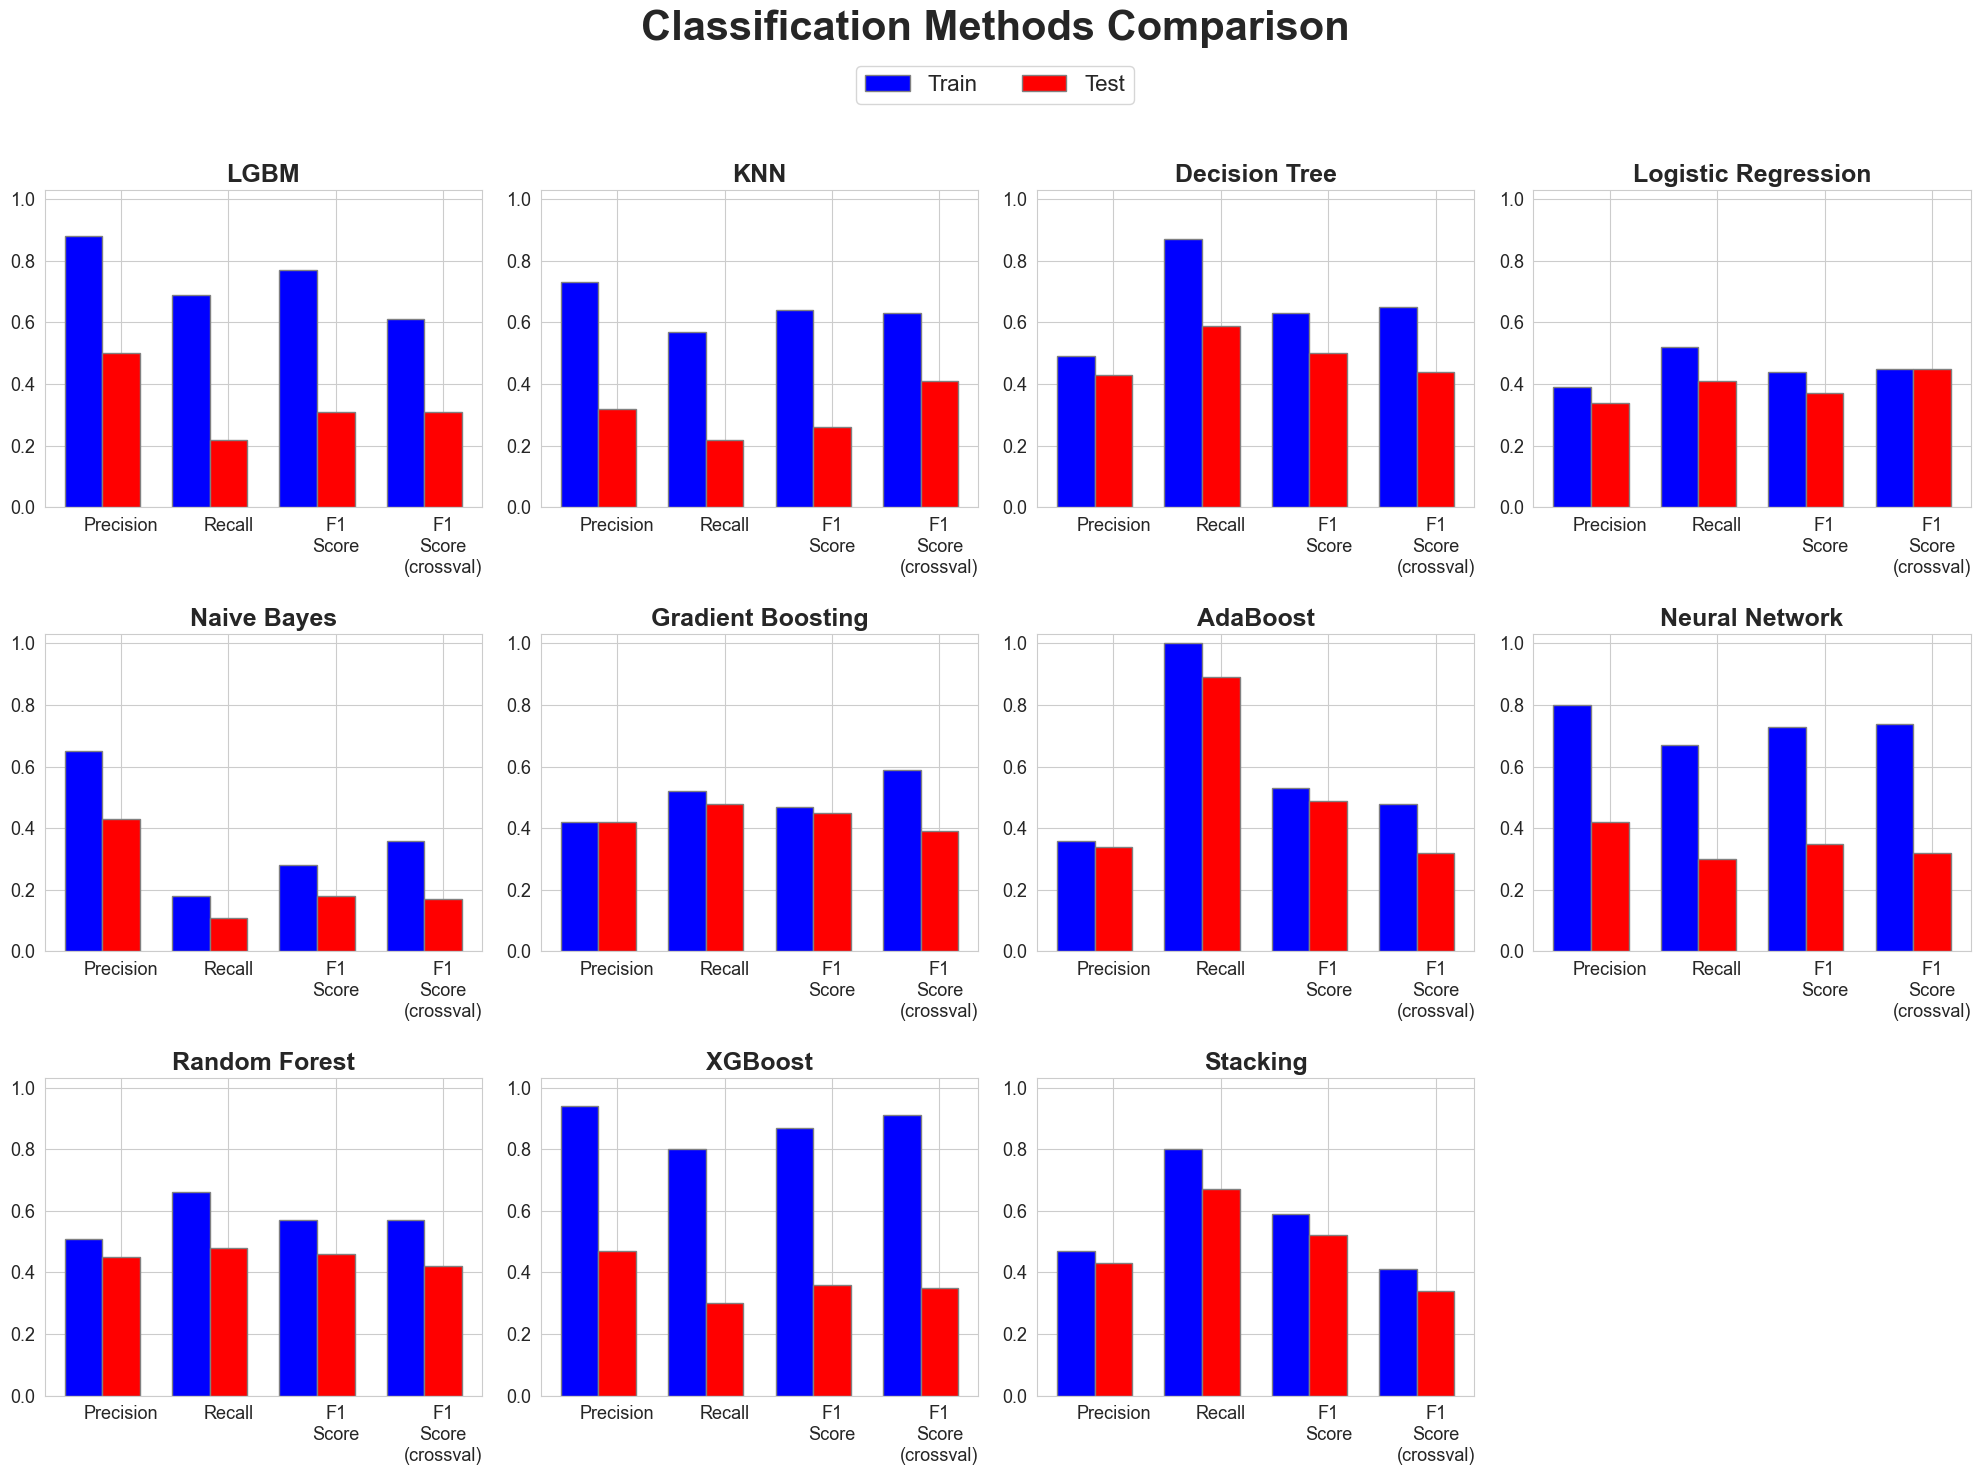

In [185]:
def plot_barchart(ax, df, method):
    method_df = df[df['method'] == method]
    
    train_scores = method_df[method_df['set'] == 'Train'].drop(columns=['method', 'set', 'Accuracy','ROC AUC',"ROC AUC (crossval)"]).iloc[0].values
    test_scores = method_df[method_df['set'] == 'Test'].drop(columns=['method', 'set', 'Accuracy','ROC AUC',"ROC AUC (crossval)"]).iloc[0].values

    metrics = method_df.drop(columns=['method', 'set', 'Accuracy','ROC AUC',"ROC AUC (crossval)"]).columns.tolist()

    bar_width = 0.35

    r1 = np.arange(len(train_scores))
    r2 = [x + bar_width for x in r1]

    ax.bar(r1, train_scores, color='blue', width=bar_width, edgecolor='grey', label='Train')
    ax.bar(r2, test_scores, color='red', width=bar_width, edgecolor='grey', label='Test')

    ax.set_title(method, fontsize=18, fontweight='bold')

    ax.set_xticks([r + bar_width for r in range(len(train_scores))])
    ax.set_xticklabels([label.replace(" ", "\n") for label in metrics], ha='center', fontsize=13)

    ax.set_ylim(0, 1.03) 
    ax.tick_params(axis='y', labelsize=13)

num_methods = len(result_df['method'].unique())
num_rows = (num_methods - 1) // 4 + 1  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))  # Adjusted the layout dynamically

methods = result_df['method'].unique()

for idx, method in enumerate(methods):
    row = idx // 4
    col = idx % 4
    plot_barchart(axes[row, col], result_df, method)

if num_methods % 4 != 0:
    for col in range(num_methods % 4, 4):
        axes[num_rows - 1, col].axis('off')

fig.suptitle('Classification Methods Comparison', fontsize=30, fontweight='bold')

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=16, bbox_to_anchor=(0.5, 0.95))

plt.tight_layout()
plt.subplots_adjust(top=0.86, hspace=0.4)  # Adjusted hspace parameter to add more space between rows
plt.show()

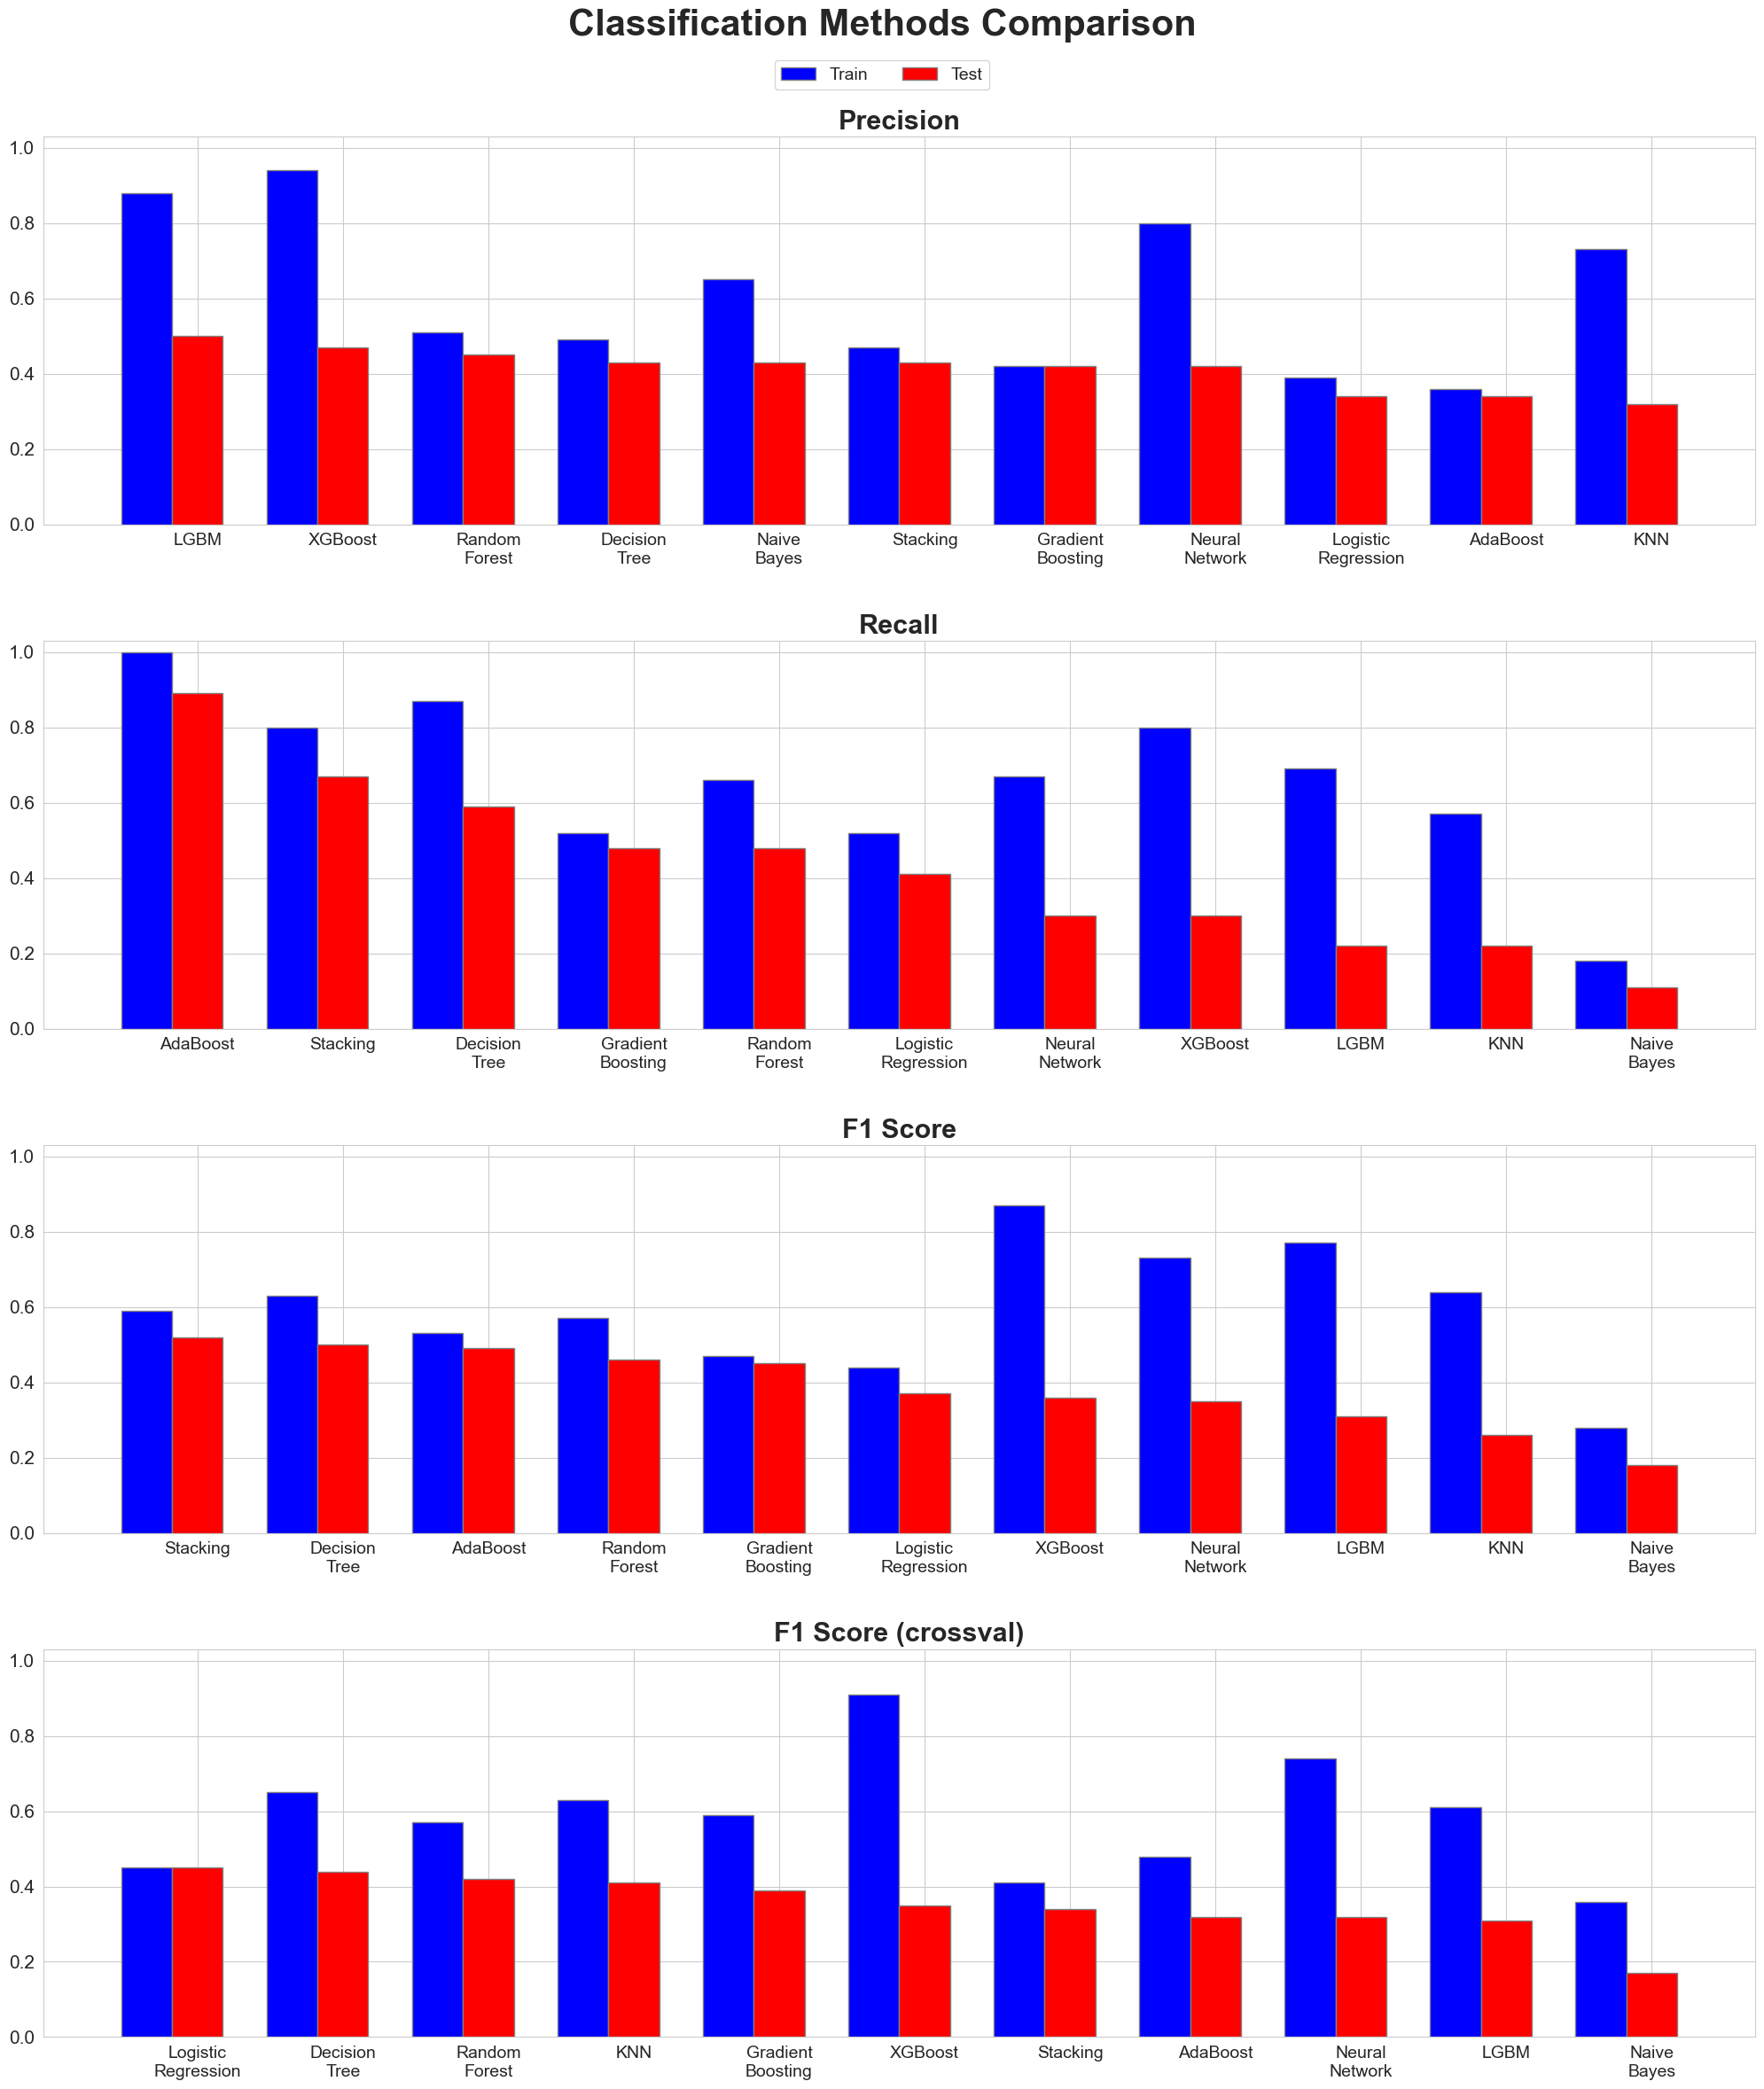

In [178]:
import numpy as np
import matplotlib.pyplot as plt

def plot_barchart(ax, df, metric):
    methods = df['method'].unique()
    train_scores = df[df['set'] == 'Train'][metric].values
    test_scores = df[df['set'] == 'Test'][metric].values

    sorted_df = pd.DataFrame({
        'method': methods,
        'train_scores': train_scores,
        'test_scores': test_scores
    })

    sorted_df = sorted_df.sort_values(by='test_scores', ascending=False)

    bar_width = 0.35

    r1 = np.arange(len(methods))
    r2 = [x + bar_width for x in r1]

    ax.bar(r1, sorted_df['train_scores'], color='blue', width=bar_width, edgecolor='grey', label='Train')
    ax.bar(r2, sorted_df['test_scores'], color='red', width=bar_width, edgecolor='grey', label='Test')

    ax.set_title(metric, fontsize=22, fontweight='bold')

    ax.set_xticks([r + bar_width for r in range(len(methods))])
    ax.set_xticklabels([label.replace(" ", "\n") for label in sorted_df['method']], rotation=0, ha='center', fontsize=14)

    ax.set_ylim(0, 1.03)
    ax.tick_params(axis='y', labelsize=15)

# Metrics without 'Accuracy', 'ROC AUC', and 'ROC AUC (crossval)'
metrics = ['Precision', 'Recall', 'F1 Score', 'F1 Score (crossval)']

fig, axes = plt.subplots(len(metrics), 1, figsize=(20, 6 * len(metrics)))

for idx, metric in enumerate(metrics):
    plot_barchart(axes[idx], result_df, metric)

fig.suptitle('Classification Methods Comparison', fontsize=30, fontweight='bold')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=14, bbox_to_anchor=(0.5, 0.96))

plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.3)  # Adjust top space to accommodate the suptitle and legend
plt.show()

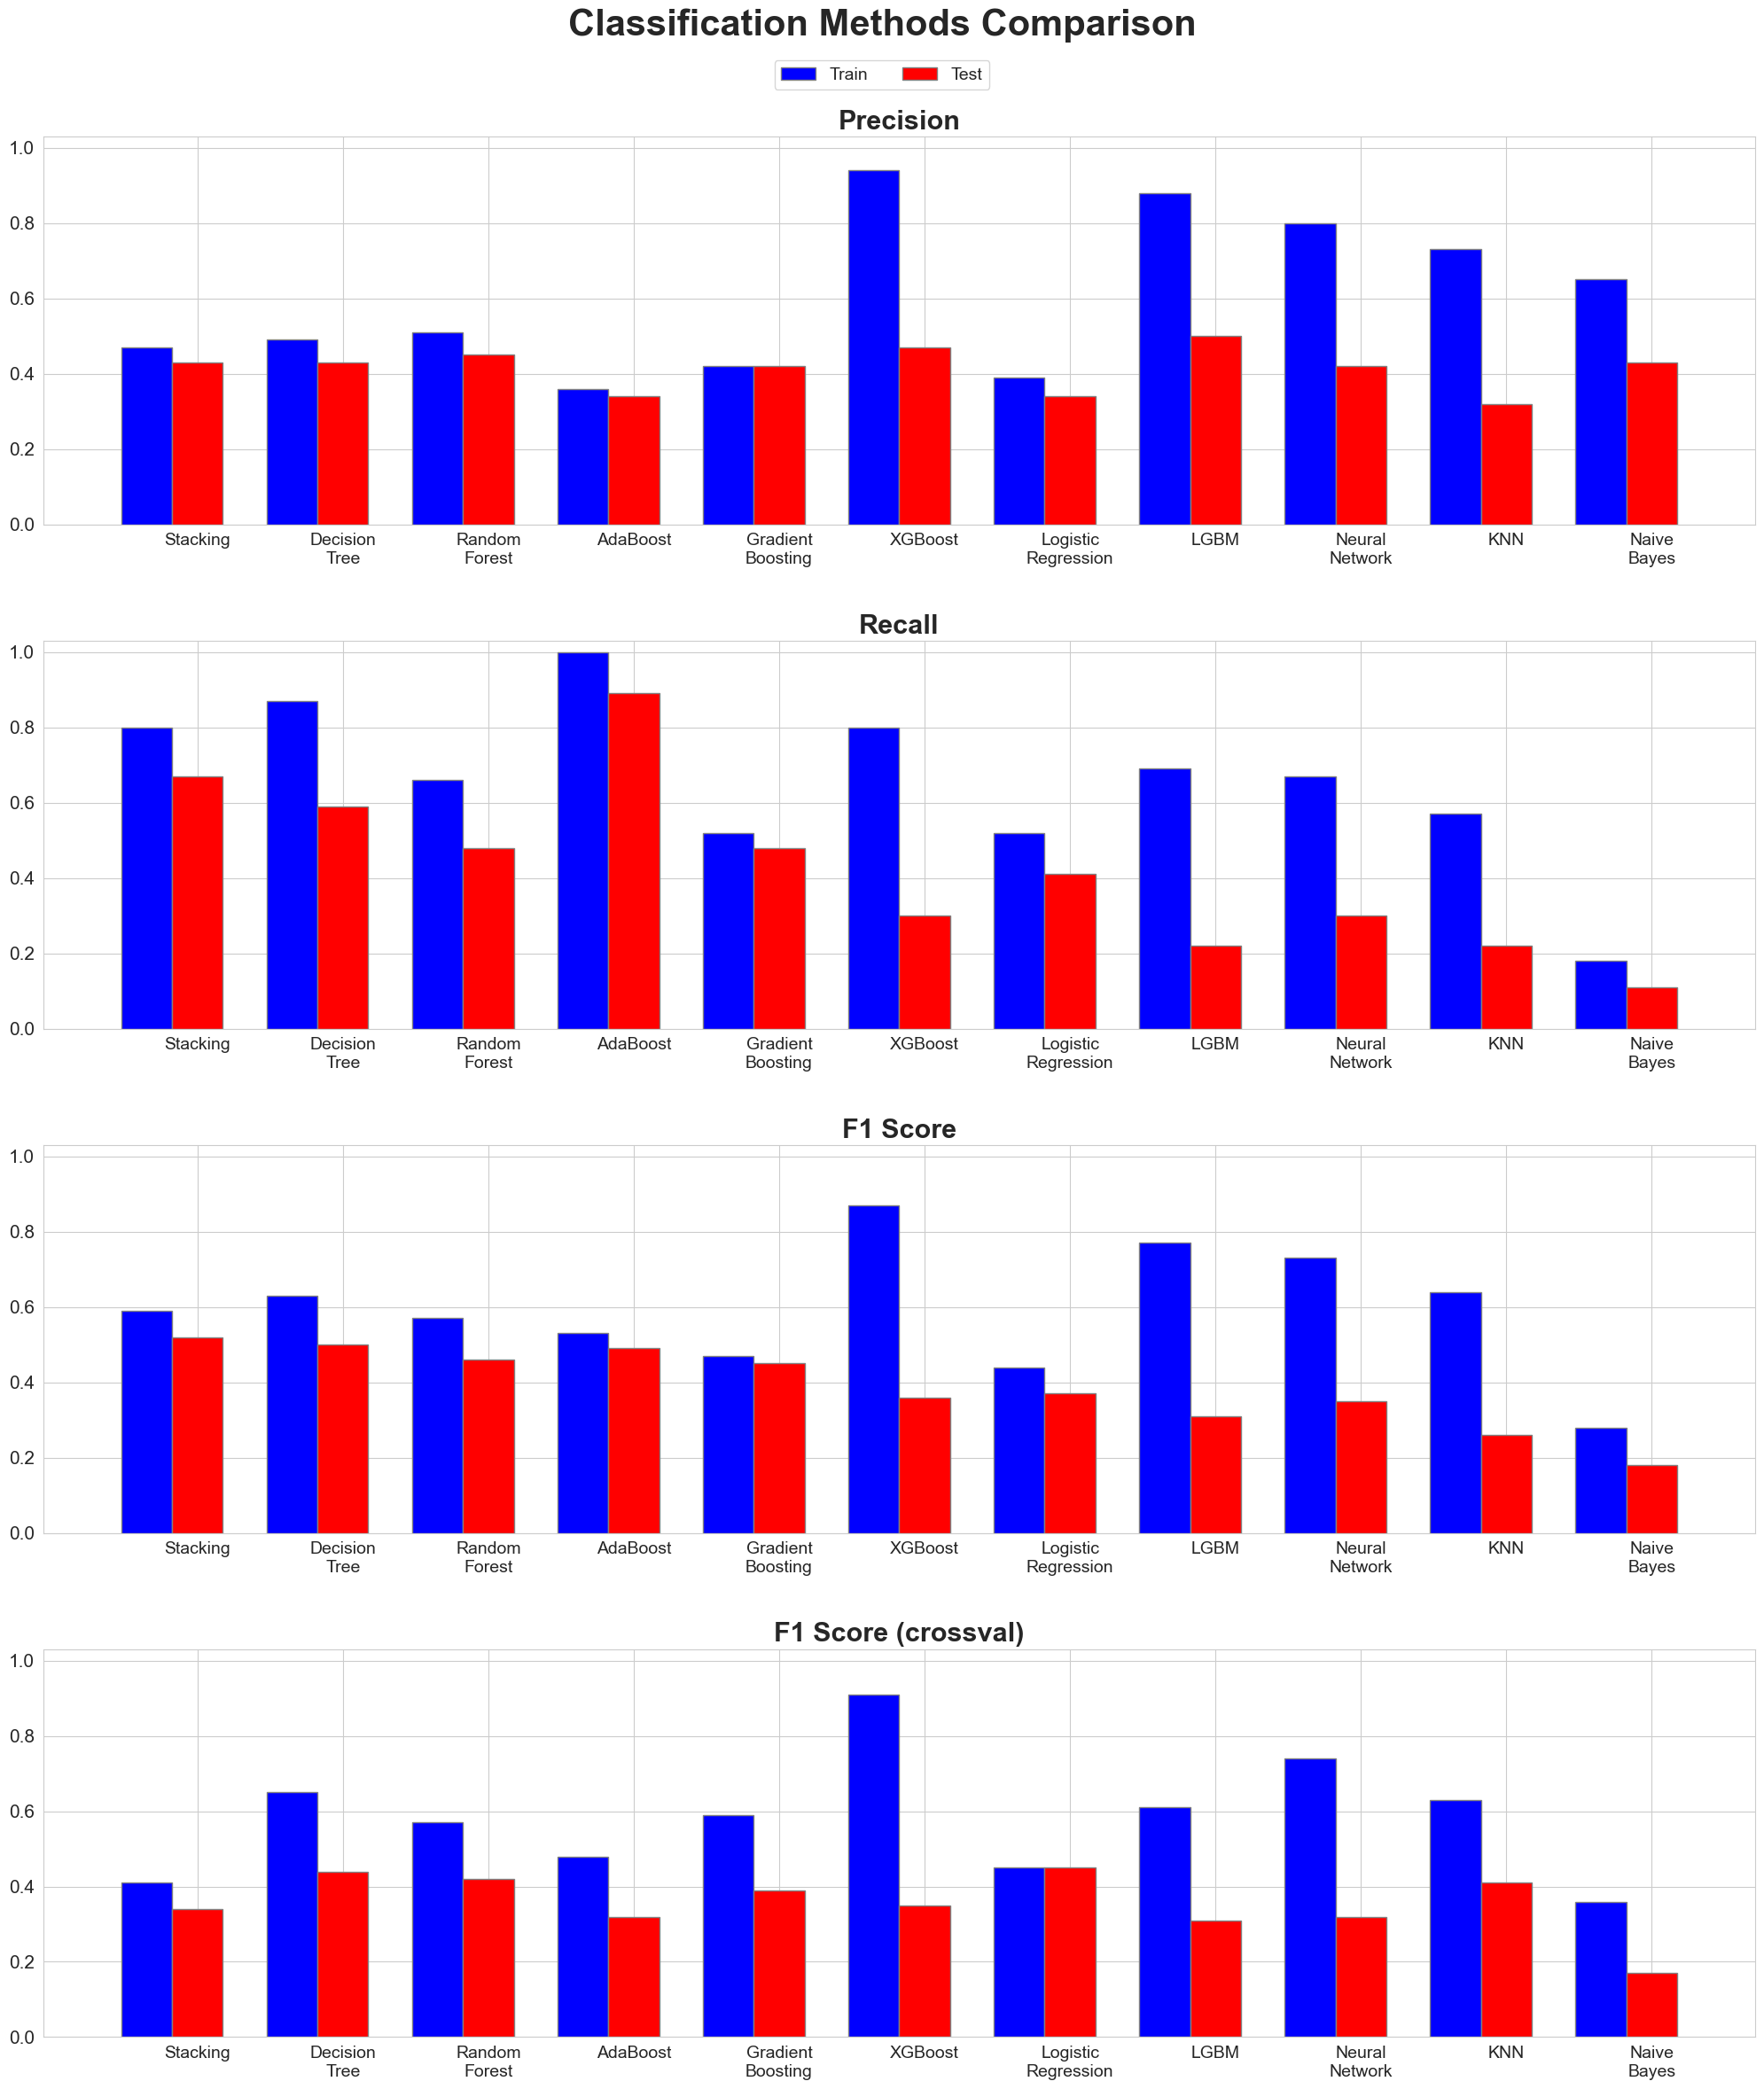

In [182]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_barchart(ax, df, metric, sorted_methods):
    train_scores = [df[(df['set'] == 'Train') & (df['method'] == method)][metric].values[0] for method in sorted_methods]
    test_scores = [df[(df['set'] == 'Test') & (df['method'] == method)][metric].values[0] for method in sorted_methods]
    
    bar_width = 0.35

    r1 = np.arange(len(sorted_methods))
    r2 = [x + bar_width for x in r1]

    ax.bar(r1, train_scores, color='blue', width=bar_width, edgecolor='grey', label='Train')
    ax.bar(r2, test_scores, color='red', width=bar_width, edgecolor='grey', label='Test')

    ax.set_title(metric, fontsize=22, fontweight='bold')

    ax.set_xticks([r + bar_width for r in range(len(sorted_methods))])
    ax.set_xticklabels([label.replace(" ", "\n") for label in sorted_methods], rotation=0, ha='center', fontsize=14)

    ax.set_ylim(0, 1.03)
    ax.tick_params(axis='y', labelsize=15)


# Compute average test score across all metrics for each method
test_data = result_df[result_df['set'] == 'Test']
avg_test_scores = test_data.groupby('method').mean().mean(axis=1)
sorted_methods = avg_test_scores.sort_values(ascending=False).index.tolist()

# Metrics without 'Accuracy', 'ROC AUC', and 'ROC AUC (crossval)'
metrics = ['Precision', 'Recall', 'F1 Score', 'F1 Score (crossval)']

fig, axes = plt.subplots(len(metrics), 1, figsize=(20, 6 * len(metrics)))

for idx, metric in enumerate(metrics):
    plot_barchart(axes[idx], result_df, metric, sorted_methods)

fig.suptitle('Classification Methods Comparison', fontsize=30, fontweight='bold')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=14, bbox_to_anchor=(0.5, 0.96))

plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.3)  # Adjust top space to accommodate the suptitle and legend
plt.show()

## Confusion Matrix

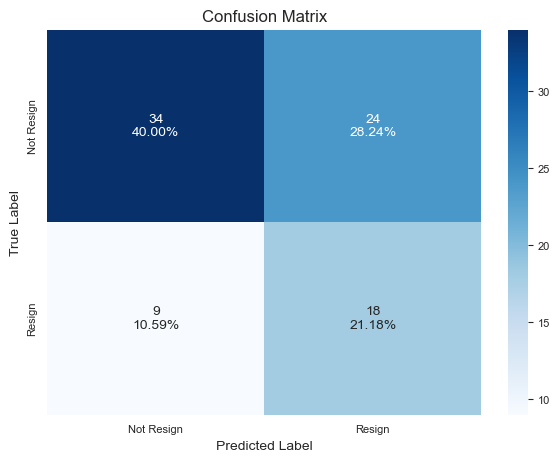

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = random_search_refined_3.predict(X_test)  # assuming stack is your trained model

matrix = confusion_matrix(y_test, y_pred)

total = matrix.sum()
percentage_matrix = (matrix / total) * 100

labels = (np.asarray(["{0}\n{1:.2f}%".format(value, percentage)
                     for value, percentage in zip(matrix.flatten(), percentage_matrix.flatten())])).reshape(2,2)

plt.figure(figsize=(7,5))
sns.heatmap(matrix, annot=labels, fmt='', cmap="Blues",
            xticklabels=['Not Resign', 'Resign'],
            yticklabels=['Not Resign', 'Resign'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

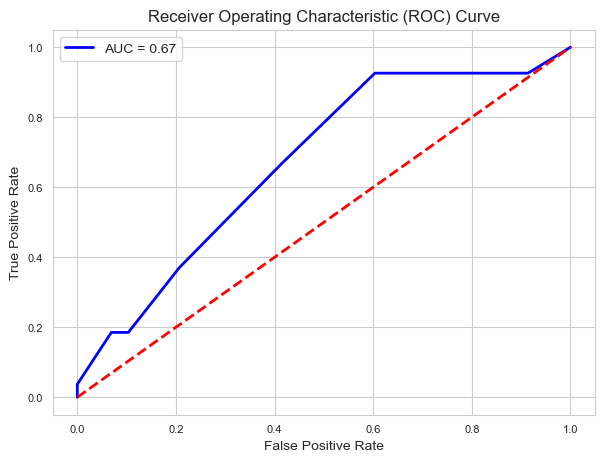

In [255]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Calculate the roc curve
y_probs = random_search_refined_3.predict_proba(X_test)[:,1] # probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc_score(y_test, y_probs):.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
y_pred = best_stack_refined_3.predict(X_test)

In [187]:
X = df_new.drop(columns=['IsResign',], axis=1)
y = df_new[['IsResign']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [188]:
X_test.head()

StatusKepegawaian PerformancePegawai          Pekerjaan  \
23          Outsource              Bagus  Software Engineer   
1            FullTime      Sangat_kurang         Data Roles   
270          FullTime              Biasa  Software Engineer   
53           FullTime              Biasa      Product Roles   
34          Outsource              Biasa  Software Engineer   

     SkorKepuasanPegawai  Umur  
23                   3.0    29  
1                    4.0    36  
270                  3.0    66  
53                   4.0    33  
34                   3.0    32

In [189]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 23 to 101
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   StatusKepegawaian    85 non-null     object 
 1   PerformancePegawai   85 non-null     object 
 2   Pekerjaan            85 non-null     object 
 3   SkorKepuasanPegawai  85 non-null     float64
 4   Umur                 85 non-null     int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 4.0+ KB


In [193]:
y_pred.shape

(85,)

In [191]:
categorical_columns = X_test.select_dtypes(['object', 'category']).columns

# Display unique values for each categorical column
for column in categorical_columns:
    print(f"Column '{column}' has unique values: {X_test[column].unique()}")

Column 'StatusKepegawaian' has unique values: ['Outsource' 'FullTime' 'Internship']
Column 'PerformancePegawai' has unique values: ['Bagus' 'Sangat_kurang' 'Biasa' 'Sangat_bagus' 'Kurang']
Column 'Pekerjaan' has unique values: ['Software Engineer' 'Data Roles' 'Product Roles' 'Other']


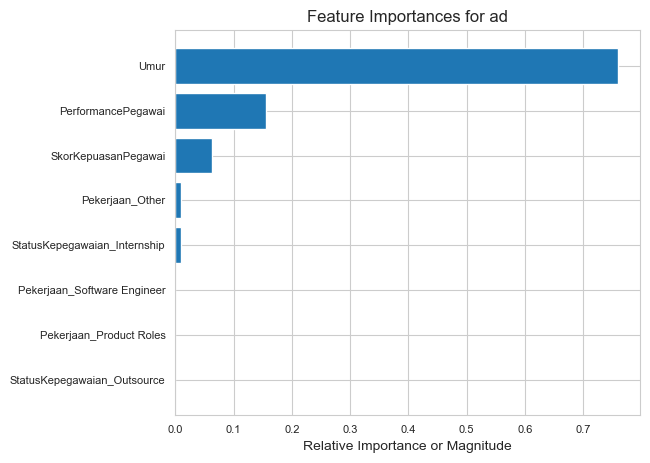

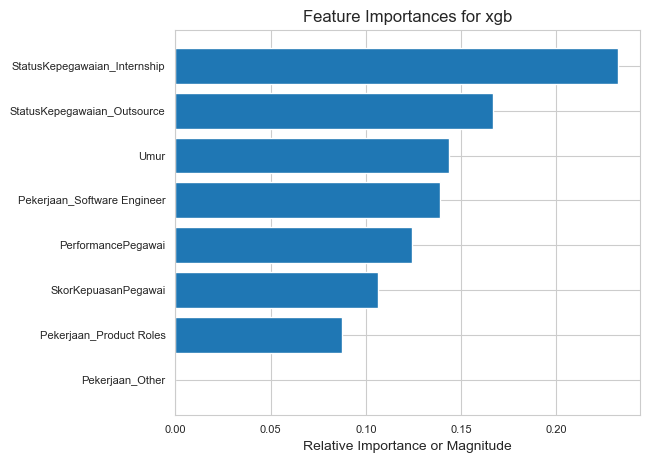

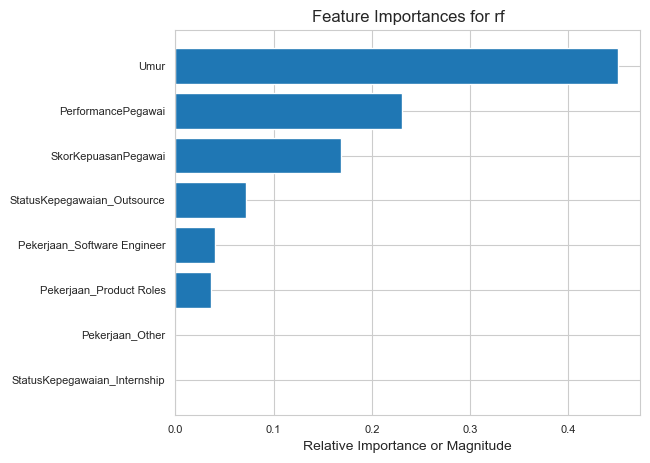

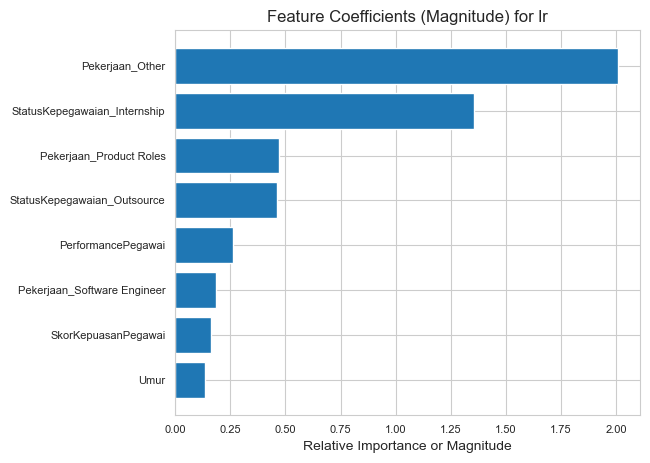

In [260]:
def plot_feature_importance(model, model_name, feature_names):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        title = 'Feature Importances'
    elif hasattr(model, 'coef_'):
        # use coefficients as importances for models like LogisticRegression
        importances = np.abs(model.coef_[0])
        title = 'Feature Coefficients (Magnitude)'
    else:
        print(f"{model_name} does not support 'feature_importances_' or 'coef_' attribute.")
        return

    # sort them out in ascending order
    indices = np.argsort(importances)
    
    # limit to top 20 features
    indices = indices[-20:]

    plt.figure(figsize=(6, 5))
    plt.title(f'{title} for {model_name}')
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance or Magnitude')
    plt.show()

for name, model in best_stack_refined_3.named_estimators_.items():
    plot_feature_importance(model, name, X_train.columns)

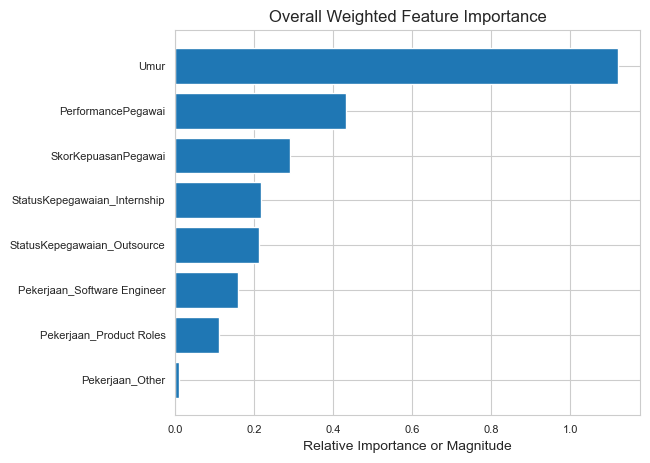

In [276]:
def compute_weighted_feature_importance(models, scores, feature_names):
    total_importance = np.zeros_like(models[0].feature_importances_)

    for model, score in zip(models, scores):
        if hasattr(model, 'feature_importances_'):
            total_importance += score * model.feature_importances_
        elif hasattr(model, 'coef_'):
            total_importance += score * np.abs(model.coef_[0])
        else:
            print("Model does not support feature importance or coef_")
            return

    indices = np.argsort(total_importance)
    
    # limit to top 20 features
    indices = indices[-20:]

    plt.figure(figsize=(6, 5))
    plt.title('Overall Weighted Feature Importance')
    plt.barh(range(len(indices)), total_importance[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance or Magnitude')
    plt.show()

model_scores = [0.8, 0.9, 0.85]  # for example
models = [model for _, model in best_stack_refined_3.named_estimators_.items()]

compute_weighted_feature_importance(models, model_scores, X_train.columns)

In [277]:
def display_feature_importance(model, model_name, feature_names):
    if hasattr(model, 'feature_importances_'):
        # get feature importances
        importances = model.feature_importances_
        title = 'Feature Importances'
    elif hasattr(model, 'coef_'):
        # use coefficients as importances for models like LogisticRegression
        importances = np.abs(model.coef_[0])
        title = 'Feature Coefficients (Magnitude)'
    else:
        print(f"{model_name} does not support 'feature_importances_' or 'coef_' attribute.")
        return
 
    sorted_indices = np.argsort(importances)[::-1]
    
    print(f"{title} for {model_name}:")
    for i in sorted_indices:
        print(f"{feature_names[i]}: {importances[i]}")
    print("\n")

for name, model in best_stack_refined_3.named_estimators_.items():
    display_feature_importance(model, name, X_train.columns)

Feature Importances for ad:
Umur: 0.7604166666666666
PerformancePegawai: 0.15625
SkorKepuasanPegawai: 0.0625
Pekerjaan_Other: 0.010416666666666666
StatusKepegawaian_Internship: 0.010416666666666666
Pekerjaan_Software Engineer: 0.0
Pekerjaan_Product Roles: 0.0
StatusKepegawaian_Outsource: 0.0


Feature Importances for xgb:
StatusKepegawaian_Internship: 0.2324974685907364
StatusKepegawaian_Outsource: 0.1666674166917801
Umur: 0.14385376870632172
Pekerjaan_Software Engineer: 0.13896389305591583
PerformancePegawai: 0.12446501851081848
SkorKepuasanPegawai: 0.10629405826330185
Pekerjaan_Product Roles: 0.08725835382938385
Pekerjaan_Other: 0.0


Feature Importances for rf:
Umur: 0.4510848277596319
PerformancePegawai: 0.23093822527176638
SkorKepuasanPegawai: 0.16917868518814513
StatusKepegawaian_Outsource: 0.07246405869569343
Pekerjaan_Software Engineer: 0.03988959490777182
Pekerjaan_Product Roles: 0.03644460817699119
Pekerjaan_Other: 0.0
StatusKepegawaian_Internship: 0.0


Feature Coefficients 

In [262]:
import shap

# Menggunakan KernelExplainer
explainer = shap.KernelExplainer(best_stack_refined_3.predict_proba, X_train.iloc[:100], link="logit")

# Hitung SHAP values untuk beberapa sampel dari X_train (misal 10 sampel untuk kecepatan)
shap_values = explainer.shap_values(X_train.iloc[:10])

# Visualisasi SHAP values untuk instance pertama dari data train
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_train.iloc[0])

  0%|          | 0/10 [00:00<?, ?it/s]